# 🎓 Complete Semi-Supervised Learning Course

## From Foundations to State-of-the-Art Techniques

---

**Author**: Advanced Machine Learning Course Series  
**Level**: Beginner to Advanced  
**Prerequisites**: Basic Machine Learning, Python, NumPy, Scikit-learn fundamentals  
**Estimated Duration**: 20-25 hours of focused study

---

### 📚 Course Overview

Semi-supervised learning represents one of the most **practically important** paradigms in machine learning. In real-world applications, obtaining labeled data is often expensive, time-consuming, or requires domain expertise, while unlabeled data is abundant and cheap. Semi-supervised learning bridges this gap by leveraging both labeled and unlabeled data to build more accurate models.

This comprehensive course will take you from foundational concepts to state-of-the-art techniques, with a heavy emphasis on:

- **Deep conceptual understanding** through detailed explanations
- **Practical mastery** through extensive coding examples
- **Visual intuition** through mathematical animations
- **Problem-solving skills** through carefully designed exercises

---

### 📋 Table of Contents

1. **Chapter 1**: Introduction to Semi-Supervised Learning
2. **Chapter 2**: The Fundamental Assumptions of SSL
3. **Chapter 3**: Self-Training and Pseudo-Labeling
4. **Chapter 4**: Co-Training and Multi-View Learning
5. **Chapter 5**: Graph-Based Semi-Supervised Methods
6. **Chapter 6**: Consistency Regularization Techniques
7. **Chapter 7**: Modern Deep Semi-Supervised Learning
8. **Chapter 8**: Practical Guide and Best Practices
9. **Chapter 9**: Capstone Projects and Advanced Exercises

---

### 🎯 Learning Objectives

By the end of this course, you will be able to:

1. **Understand** the theoretical foundations and assumptions underlying semi-supervised learning
2. **Implement** classical SSL algorithms from scratch
3. **Apply** modern deep learning SSL techniques to real datasets
4. **Evaluate** when SSL is appropriate and how to measure its effectiveness
5. **Design** SSL pipelines for production systems
6. **Debug** common issues and failure modes in SSL systems

---

### 💡 How to Use This Notebook

1. **Read actively**: Don't just skim—engage with the explanations
2. **Run every cell**: Execute all code cells, even if you think you understand
3. **Modify and experiment**: Change parameters, break things, learn from errors
4. **Complete all exercises**: These reinforce understanding and build skills
5. **Review summaries**: Each chapter ends with a comprehensive summary
6. **Build projects**: Apply knowledge to the capstone projects


---

# 🔧 Environment Setup and Imports

Before we begin, let's set up our computational environment. We'll use a variety of libraries throughout this course.


In [1]:
# ============================================================================
# COMPLETE SEMI-SUPERVISED LEARNING COURSE - ENVIRONMENT SETUP
# ============================================================================

# Core scientific computing
import numpy as np
import pandas as pd
from scipy import stats
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.datasets import load_digits, load_iris, fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            confusion_matrix, classification_report, roc_auc_score,
                            silhouette_score)
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Semi-supervised specific
from sklearn.semi_supervised import LabelPropagation, LabelSpreading, SelfTrainingClassifier

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 200)

# Random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Color schemes for visualizations
COLORS = {
    'labeled_0': '#e74c3c',      # Red
    'labeled_1': '#3498db',      # Blue
    'labeled_2': '#2ecc71',      # Green
    'unlabeled': '#95a5a6',      # Gray
    'pseudo_labeled': '#9b59b6', # Purple
    'highlight': '#f39c12',      # Orange
}

print("=" * 70)
print("🎓 SEMI-SUPERVISED LEARNING COURSE - ENVIRONMENT READY")
print("=" * 70)
print(f"\nNumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn: Available")
print(f"\nRandom seed set to: {RANDOM_STATE}")
print("\n✅ All imports successful! Ready to begin.")

🎓 SEMI-SUPERVISED LEARNING COURSE - ENVIRONMENT READY

NumPy version: 2.3.5
Pandas version: 2.3.3
Scikit-learn: Available

Random seed set to: 42

✅ All imports successful! Ready to begin.


In [2]:
# ============================================================================
# UTILITY FUNCTIONS FOR THE COURSE
# ============================================================================

def create_ssl_dataset(n_samples=1000, n_labeled=50, n_classes=2, noise=0.1, 
                       dataset_type='moons', random_state=42):
    """
    Create a semi-supervised learning dataset with labeled and unlabeled samples.
    
    Parameters:
    -----------
    n_samples : int, total number of samples
    n_labeled : int, number of labeled samples
    n_classes : int, number of classes (for classification datasets)
    noise : float, noise level in the data
    dataset_type : str, type of dataset ('moons', 'circles', 'blobs', 'classification')
    random_state : int, random seed
    
    Returns:
    --------
    X : features array
    y_true : true labels (for evaluation)
    y_partial : labels with -1 for unlabeled samples (for training)
    labeled_mask : boolean mask for labeled samples
    """
    np.random.seed(random_state)
    
    if dataset_type == 'moons':
        X, y_true = make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
    elif dataset_type == 'circles':
        X, y_true = make_circles(n_samples=n_samples, noise=noise, factor=0.5, random_state=random_state)
    elif dataset_type == 'blobs':
        X, y_true = make_blobs(n_samples=n_samples, centers=n_classes, cluster_std=noise*5,
                               random_state=random_state)
    elif dataset_type == 'classification':
        X, y_true = make_classification(n_samples=n_samples, n_features=2, n_redundant=0,
                                        n_informative=2, n_clusters_per_class=1,
                                        n_classes=n_classes, random_state=random_state)
    else:
        raise ValueError(f"Unknown dataset type: {dataset_type}")
    
    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # Create partial labels (labeled and unlabeled)
    n_per_class = n_labeled // n_classes
    labeled_indices = []
    
    for c in range(n_classes):
        class_indices = np.where(y_true == c)[0]
        selected = np.random.choice(class_indices, size=min(n_per_class, len(class_indices)), replace=False)
        labeled_indices.extend(selected)
    
    labeled_mask = np.zeros(n_samples, dtype=bool)
    labeled_mask[labeled_indices] = True
    
    # Create partial label array (-1 for unlabeled)
    y_partial = np.full(n_samples, -1)
    y_partial[labeled_mask] = y_true[labeled_mask]
    
    return X, y_true, y_partial, labeled_mask


def plot_ssl_dataset(X, y_true, y_partial, labeled_mask, title="Semi-Supervised Dataset",
                     figsize=(12, 5)):
    """
    Visualize a semi-supervised dataset showing labeled vs unlabeled points.
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    # Left: Show true labels
    ax1 = axes[0]
    scatter = ax1.scatter(X[:, 0], X[:, 1], c=y_true, cmap='RdYlBu', 
                          alpha=0.7, s=50, edgecolors='white', linewidth=0.5)
    ax1.set_title("Ground Truth Labels", fontsize=12, fontweight='bold')
    ax1.set_xlabel("Feature 1")
    ax1.set_ylabel("Feature 2")
    plt.colorbar(scatter, ax=ax1, label="Class")
    
    # Right: Show labeled vs unlabeled
    ax2 = axes[1]
    
    # Plot unlabeled points
    unlabeled_mask = ~labeled_mask
    ax2.scatter(X[unlabeled_mask, 0], X[unlabeled_mask, 1], 
                c=COLORS['unlabeled'], alpha=0.4, s=30, label='Unlabeled', marker='o')
    
    # Plot labeled points with their class colors
    colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#f39c12']
    for c in np.unique(y_true):
        mask = labeled_mask & (y_true == c)
        ax2.scatter(X[mask, 0], X[mask, 1], c=colors[c % len(colors)], 
                    s=100, label=f'Labeled Class {c}', edgecolors='black', linewidth=1.5, marker='s')
    
    ax2.set_title("Semi-Supervised View", fontsize=12, fontweight='bold')
    ax2.set_xlabel("Feature 1")
    ax2.set_ylabel("Feature 2")
    ax2.legend(loc='best')
    
    plt.suptitle(title, fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Statistics
    n_labeled = labeled_mask.sum()
    n_unlabeled = (~labeled_mask).sum()
    print(f"\n📊 Dataset Statistics:")
    print(f"   Total samples: {len(X)}")
    print(f"   Labeled samples: {n_labeled} ({100*n_labeled/len(X):.1f}%)")
    print(f"   Unlabeled samples: {n_unlabeled} ({100*n_unlabeled/len(X):.1f}%)")
    print(f"   Number of classes: {len(np.unique(y_true))}")


def plot_decision_boundary(clf, X, y, title="Decision Boundary", ax=None, 
                           labeled_mask=None, resolution=100):
    """
    Plot the decision boundary of a classifier.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))
    
    # Predict on mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    ax.contour(xx, yy, Z, colors='black', linewidths=0.5, alpha=0.5)
    
    # Plot points
    if labeled_mask is not None:
        # Unlabeled points
        ax.scatter(X[~labeled_mask, 0], X[~labeled_mask, 1], 
                   c=y[~labeled_mask], cmap='RdYlBu', alpha=0.4, s=30, marker='o')
        # Labeled points
        ax.scatter(X[labeled_mask, 0], X[labeled_mask, 1], 
                   c=y[labeled_mask], cmap='RdYlBu', s=100, edgecolors='black', 
                   linewidth=2, marker='s')
    else:
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', s=50, edgecolors='white', linewidth=0.5)
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    
    return ax


def evaluate_ssl_model(y_true, y_pred, model_name="Model"):
    """
    Comprehensive evaluation of a semi-supervised learning model.
    """
    print(f"\n{'='*60}")
    print(f"📈 Evaluation Results: {model_name}")
    print(f"{'='*60}")
    
    accuracy = accuracy_score(y_true, y_pred)
    
    # Handle binary vs multiclass
    if len(np.unique(y_true)) == 2:
        precision = precision_score(y_true, y_pred, average='binary')
        recall = recall_score(y_true, y_pred, average='binary')
        f1 = f1_score(y_true, y_pred, average='binary')
    else:
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"\n  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    
    print(f"\n{'-'*60}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}


print("✅ Utility functions loaded successfully!")

✅ Utility functions loaded successfully!


---
---

# 📖 CHAPTER 1: Introduction to Semi-Supervised Learning

---

## 1.1 What is Semi-Supervised Learning?

### The Core Concept

**Semi-supervised learning (SSL)** is a machine learning paradigm that combines a small amount of **labeled data** with a large amount of **unlabeled data** during training. It sits between:

- **Supervised learning**: Uses only labeled data
- **Unsupervised learning**: Uses only unlabeled data

### Why Does This Matter?

Consider these real-world scenarios:

| Scenario                | Labeled Data                 | Unlabeled Data                 | Cost to Label               |
| ----------------------- | ---------------------------- | ------------------------------ | --------------------------- |
| Medical Imaging         | Requires expert radiologist  | Easy to collect scans          | Very High ($100+ per image) |
| Sentiment Analysis      | Manual reading & annotation  | Billions of tweets/reviews     | Moderate ($0.10 per text)   |
| Speech Recognition      | Professional transcription   | Hours of audio easily recorded | High ($1+ per minute)       |
| Web Page Classification | Domain expert categorization | Entire internet available      | Moderate to High            |

The **fundamental insight** of SSL is: _unlabeled data, while not telling us the answer directly, contains valuable information about the structure of the problem_.

---

### The Mathematical Setup

In semi-supervised learning, we have:

- **Labeled dataset**: $\mathcal{D}_L = \{(x_1, y_1), (x_2, y_2), ..., (x_l, y_l)\}$
- **Unlabeled dataset**: $\mathcal{D}_U = \{x_{l+1}, x_{l+2}, ..., x_{l+u}\}$
- Typically: $u \gg l$ (many more unlabeled than labeled samples)

Our goal is to learn a function $f: \mathcal{X} \rightarrow \mathcal{Y}$ that maps inputs to outputs, leveraging **both** $\mathcal{D}_L$ and $\mathcal{D}_U$.

---

### The Learning Paradigm Spectrum

```
┌─────────────────────────────────────────────────────────────────────────┐
│                      MACHINE LEARNING PARADIGMS                         │
├─────────────────────────────────────────────────────────────────────────┤
│                                                                         │
│  SUPERVISED          SEMI-SUPERVISED           UNSUPERVISED             │
│  ──────────          ────────────────           ────────────             │
│  100% Labeled   →    Few Labeled + Many     →   0% Labeled              │
│                      Unlabeled                                          │
│                                                                         │
│  Examples:           Examples:                  Examples:               │
│  • Classification    • Self-training            • Clustering            │
│  • Regression        • Label propagation        • Dimensionality        │
│                      • Co-training                reduction             │
│                      • Consistency              • Density estimation    │
│                        regularization                                   │
│                                                                         │
└─────────────────────────────────────────────────────────────────────────┘
```

---

### Key Intuition: Why Unlabeled Data Helps

Consider a simple 2D classification problem. With only a few labeled points, the decision boundary is ambiguous:

**With labeled data only:**

- Many possible decision boundaries are consistent with the labeled data
- High uncertainty in regions far from labeled points

**Adding unlabeled data reveals:**

- The underlying distribution and structure of the data
- Cluster patterns that suggest natural groupings
- Regions of high vs. low density
- Manifold structure the data lies on

This additional information **constrains** the space of plausible decision boundaries, leading to better generalization.


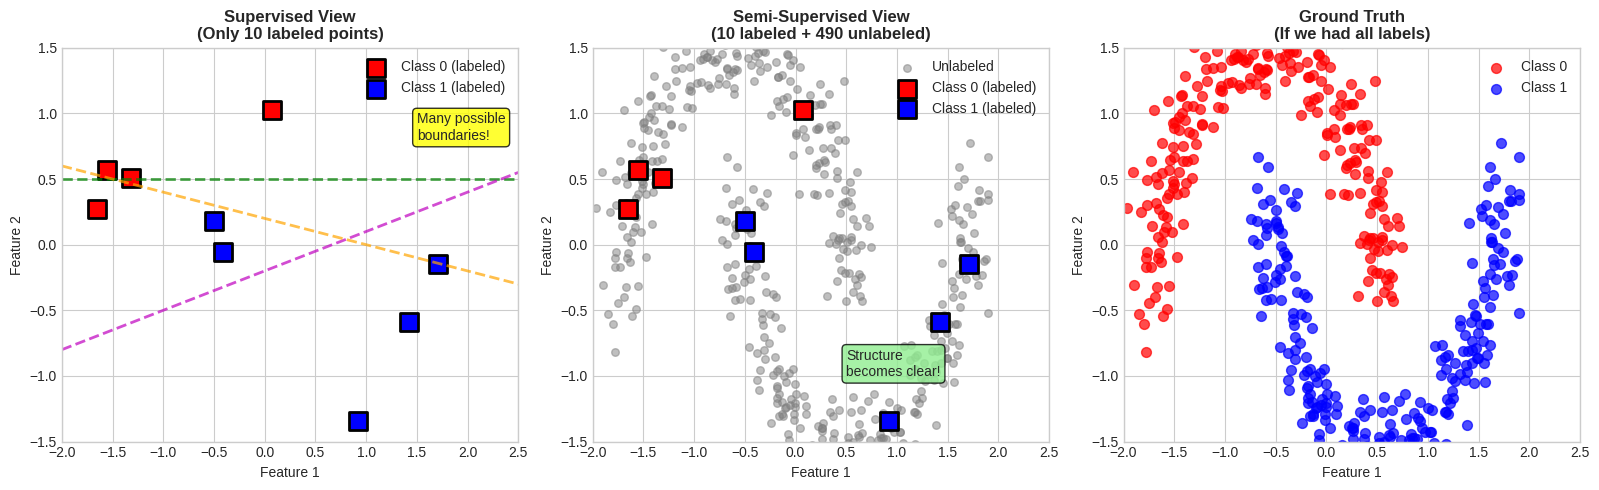


🎯 KEY INSIGHT:

• Left panel:  With only 10 labeled points, MANY decision boundaries are valid
• Middle panel: Adding unlabeled data reveals the TWO MOON structure
• Right panel: This structure matches the ground truth classes!

The unlabeled data doesn't tell us the labels directly, but it reveals
the DATA STRUCTURE that constrains where the decision boundary should be.



In [3]:
# ============================================================================
# EXAMPLE 1.1: Visualizing the SSL Problem
# ============================================================================
# Let's create a visual example showing why unlabeled data helps

np.random.seed(42)

# Create a two-moons dataset
X_full, y_full = make_moons(n_samples=500, noise=0.1, random_state=42)
X_full = StandardScaler().fit_transform(X_full)

# Scenario 1: Very few labeled samples (5 per class)
n_labeled = 10
labeled_indices = []
for c in [0, 1]:
    class_idx = np.where(y_full == c)[0]
    labeled_indices.extend(np.random.choice(class_idx, 5, replace=False))
labeled_mask = np.zeros(len(X_full), dtype=bool)
labeled_mask[labeled_indices] = True

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Panel 1: What the supervised learner sees (only labeled data)
ax1 = axes[0]
ax1.scatter(X_full[labeled_mask & (y_full == 0), 0], X_full[labeled_mask & (y_full == 0), 1],
            c='red', s=150, marker='s', edgecolors='black', linewidth=2, label='Class 0 (labeled)')
ax1.scatter(X_full[labeled_mask & (y_full == 1), 0], X_full[labeled_mask & (y_full == 1), 1],
            c='blue', s=150, marker='s', edgecolors='black', linewidth=2, label='Class 1 (labeled)')
ax1.set_title('Supervised View\n(Only 10 labeled points)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()
ax1.set_xlim(-2, 2.5)
ax1.set_ylim(-1.5, 1.5)

# Draw multiple possible decision boundaries
x_line = np.linspace(-2, 2.5, 100)
ax1.plot(x_line, 0.5 * np.ones_like(x_line), 'g--', alpha=0.7, linewidth=2, label='Possible boundary 1')
ax1.plot(x_line, -0.2 + 0.3 * x_line, 'm--', alpha=0.7, linewidth=2, label='Possible boundary 2')
ax1.plot(x_line, 0.2 - 0.2 * x_line, 'orange', linestyle='--', alpha=0.7, linewidth=2, label='Possible boundary 3')
ax1.annotate('Many possible\nboundaries!', xy=(1.5, 0.8), fontsize=10, 
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

# Panel 2: What the semi-supervised learner sees (labeled + unlabeled)
ax2 = axes[1]
ax2.scatter(X_full[~labeled_mask, 0], X_full[~labeled_mask, 1],
            c='gray', s=30, alpha=0.5, label='Unlabeled')
ax2.scatter(X_full[labeled_mask & (y_full == 0), 0], X_full[labeled_mask & (y_full == 0), 1],
            c='red', s=150, marker='s', edgecolors='black', linewidth=2, label='Class 0 (labeled)')
ax2.scatter(X_full[labeled_mask & (y_full == 1), 0], X_full[labeled_mask & (y_full == 1), 1],
            c='blue', s=150, marker='s', edgecolors='black', linewidth=2, label='Class 1 (labeled)')
ax2.set_title('Semi-Supervised View\n(10 labeled + 490 unlabeled)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()
ax2.set_xlim(-2, 2.5)
ax2.set_ylim(-1.5, 1.5)
ax2.annotate('Structure\nbecomes clear!', xy=(0.5, -1.0), fontsize=10,
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Panel 3: Ground truth
ax3 = axes[2]
ax3.scatter(X_full[y_full == 0, 0], X_full[y_full == 0, 1],
            c='red', s=50, alpha=0.7, label='Class 0')
ax3.scatter(X_full[y_full == 1, 0], X_full[y_full == 1, 1],
            c='blue', s=50, alpha=0.7, label='Class 1')
ax3.set_title('Ground Truth\n(If we had all labels)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.legend()
ax3.set_xlim(-2, 2.5)
ax3.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.savefig('ssl_intuition.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("🎯 KEY INSIGHT:")
print("="*70)
print("""
• Left panel:  With only 10 labeled points, MANY decision boundaries are valid
• Middle panel: Adding unlabeled data reveals the TWO MOON structure
• Right panel: This structure matches the ground truth classes!

The unlabeled data doesn't tell us the labels directly, but it reveals
the DATA STRUCTURE that constrains where the decision boundary should be.
""")

---

## 1.2 When Should You Use Semi-Supervised Learning?

### ✅ SSL is Appropriate When:

1. **Labeled data is scarce or expensive to obtain**
   - Medical diagnosis requiring expert annotation
   - Legal document classification requiring lawyer review
   - Scientific data requiring specialized equipment

2. **Unlabeled data is abundant and cheap**
   - Web scraping text, images
   - Sensor data from IoT devices
   - User-generated content

3. **The unlabeled data comes from the same distribution**
   - Critical assumption: labeled and unlabeled data should be drawn from similar distributions

4. **The task benefits from understanding data structure**
   - Classification tasks with clear cluster structure
   - Problems where similar inputs should have similar outputs

### ❌ SSL May Not Help When:

1. **Labeled data is already abundant** - supervised learning is simpler and often sufficient

2. **Unlabeled data doesn't share structure with labeled data** - can actually hurt performance!

3. **The problem has no inherent structure** - pure noise doesn't help

4. **Classes heavily overlap** - structure doesn't reveal class boundaries

5. **Distribution shift exists** - unlabeled data from different distribution

---

## 1.3 The SSL Performance Hypothesis

### When Does SSL Actually Improve Performance?

This is a **critical question** that every practitioner must understand. SSL doesn't always help!

The key insight comes from **semi-supervised learning assumptions** (covered in detail in Chapter 2):

$$\text{SSL Improvement} \propto \text{How well assumptions match reality}$$

If the unlabeled data structure aligns with class structure → **SSL helps**
If the structure is misleading or random → **SSL can hurt**

Let's demonstrate this empirically:


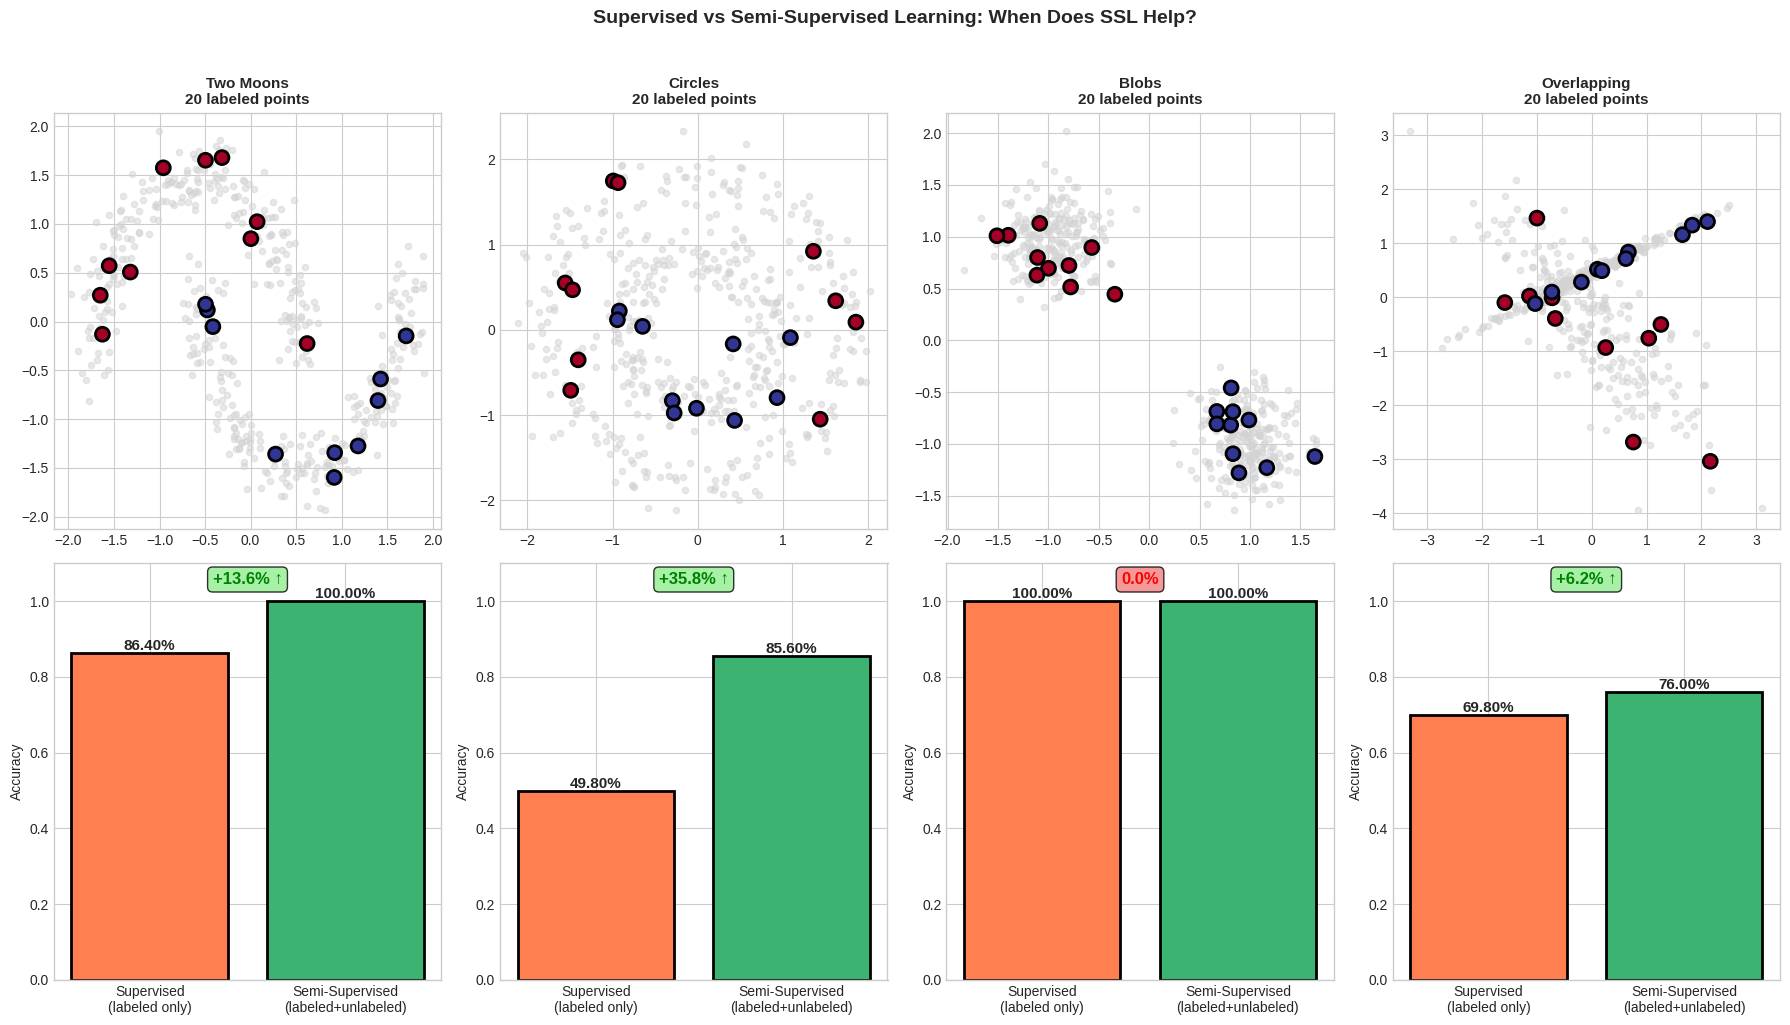


📊 SUMMARY: Supervised vs Semi-Supervised Performance
Dataset                   Supervised    Semi-Supervised     Improvement
---------------------------------------------------------------------------
Two Moons                     86.40%            100.00%         +13.60%
Circles                       49.80%             85.60%         +35.80%
Blobs                        100.00%            100.00%           0.00%
Overlapping                   69.80%             76.00%          +6.20%


In [4]:
# ============================================================================
# EXAMPLE 1.2: When SSL Helps vs When It Doesn't
# ============================================================================

def compare_supervised_vs_ssl(X, y_true, n_labeled, dataset_name):
    """
    Compare supervised learning (using only labeled data) vs 
    semi-supervised learning (using labeled + unlabeled data).
    """
    # Create labeled/unlabeled split
    labeled_indices = []
    for c in np.unique(y_true):
        class_idx = np.where(y_true == c)[0]
        n_per_class = n_labeled // len(np.unique(y_true))
        labeled_indices.extend(np.random.choice(class_idx, min(n_per_class, len(class_idx)), replace=False))
    
    labeled_mask = np.zeros(len(X), dtype=bool)
    labeled_mask[labeled_indices] = True
    
    # Prepare data
    X_labeled = X[labeled_mask]
    y_labeled = y_true[labeled_mask]
    
    y_partial = np.full(len(y_true), -1)
    y_partial[labeled_mask] = y_true[labeled_mask]
    
    # Train supervised model (only on labeled data)
    sup_model = LogisticRegression(random_state=42, max_iter=1000)
    sup_model.fit(X_labeled, y_labeled)
    sup_pred = sup_model.predict(X)
    sup_acc = accuracy_score(y_true, sup_pred)
    
    # Train semi-supervised model (Label Propagation)
    ssl_model = LabelPropagation(kernel='rbf', gamma=20, max_iter=1000)
    ssl_model.fit(X, y_partial)
    ssl_pred = ssl_model.predict(X)
    ssl_acc = accuracy_score(y_true, ssl_pred)
    
    return {
        'dataset': dataset_name,
        'n_labeled': n_labeled,
        'supervised_acc': sup_acc,
        'ssl_acc': ssl_acc,
        'improvement': ssl_acc - sup_acc,
        'X': X, 'y_true': y_true, 'labeled_mask': labeled_mask,
        'sup_model': sup_model, 'ssl_model': ssl_model
    }


# Test on different datasets
np.random.seed(42)
n_samples = 500
n_labeled = 20

# Dataset 1: Two Moons (SSL should help - clear cluster structure)
X1, y1 = make_moons(n_samples=n_samples, noise=0.1, random_state=42)
X1 = StandardScaler().fit_transform(X1)
result1 = compare_supervised_vs_ssl(X1, y1, n_labeled, "Two Moons")

# Dataset 2: Concentric Circles (SSL should help - clear cluster structure)
X2, y2 = make_circles(n_samples=n_samples, noise=0.1, factor=0.5, random_state=42)
X2 = StandardScaler().fit_transform(X2)
result2 = compare_supervised_vs_ssl(X2, y2, n_labeled, "Circles")

# Dataset 3: Well-separated blobs (SSL may help moderately)
X3, y3 = make_blobs(n_samples=n_samples, centers=2, cluster_std=1.0, random_state=42)
X3 = StandardScaler().fit_transform(X3)
result3 = compare_supervised_vs_ssl(X3, y3, n_labeled, "Blobs")

# Dataset 4: Overlapping classes (SSL may not help much)
X4, y4 = make_classification(n_samples=n_samples, n_features=2, n_redundant=0,
                              n_informative=2, n_clusters_per_class=1, 
                              class_sep=0.5, random_state=42)
X4 = StandardScaler().fit_transform(X4)
result4 = compare_supervised_vs_ssl(X4, y4, n_labeled, "Overlapping")

results = [result1, result2, result3, result4]

# Create comparison visualization
fig, axes = plt.subplots(2, 4, figsize=(18, 10))

for idx, result in enumerate(results):
    # Top row: Dataset with labels
    ax_top = axes[0, idx]
    ax_top.scatter(result['X'][~result['labeled_mask'], 0], 
                   result['X'][~result['labeled_mask'], 1],
                   c='lightgray', s=20, alpha=0.5, label='Unlabeled')
    ax_top.scatter(result['X'][result['labeled_mask'], 0],
                   result['X'][result['labeled_mask'], 1],
                   c=result['y_true'][result['labeled_mask']], 
                   cmap='RdYlBu', s=100, edgecolors='black', linewidth=2)
    ax_top.set_title(f"{result['dataset']}\n{result['n_labeled']} labeled points", 
                     fontsize=11, fontweight='bold')
    
    # Bottom row: Results comparison
    ax_bot = axes[1, idx]
    bars = ax_bot.bar(['Supervised\n(labeled only)', 'Semi-Supervised\n(labeled+unlabeled)'],
                      [result['supervised_acc'], result['ssl_acc']],
                      color=['coral', 'mediumseagreen'], edgecolor='black', linewidth=2)
    ax_bot.set_ylim(0, 1.1)
    ax_bot.set_ylabel('Accuracy')
    
    # Add value labels
    for bar, val in zip(bars, [result['supervised_acc'], result['ssl_acc']]):
        ax_bot.annotate(f'{val:.2%}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                       ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Improvement indicator
    if result['improvement'] > 0:
        ax_bot.annotate(f"+{result['improvement']:.1%} ↑", 
                       xy=(0.5, 0.95), xycoords='axes fraction',
                       ha='center', fontsize=12, fontweight='bold', color='green',
                       bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    else:
        ax_bot.annotate(f"{result['improvement']:.1%}", 
                       xy=(0.5, 0.95), xycoords='axes fraction',
                       ha='center', fontsize=12, fontweight='bold', color='red',
                       bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

plt.suptitle('Supervised vs Semi-Supervised Learning: When Does SSL Help?', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Summary table
print("\n" + "="*75)
print("📊 SUMMARY: Supervised vs Semi-Supervised Performance")
print("="*75)
print(f"{'Dataset':<20} {'Supervised':>15} {'Semi-Supervised':>18} {'Improvement':>15}")
print("-"*75)
for r in results:
    imp_str = f"+{r['improvement']:.2%}" if r['improvement'] > 0 else f"{r['improvement']:.2%}"
    print(f"{r['dataset']:<20} {r['supervised_acc']:>15.2%} {r['ssl_acc']:>18.2%} {imp_str:>15}")
print("="*75)

---

## 1.4 A Taxonomy of Semi-Supervised Learning Methods

SSL algorithms can be organized into several major families:

### 🔷 1. Self-Training Methods (Chapter 3)
**Core Idea**: Train a model, use it to label unlabeled data, retrain on expanded dataset.
- Pseudo-labeling
- Self-training with confidence thresholds
- Co-training (multi-view)

### 🔷 2. Graph-Based Methods (Chapter 5)
**Core Idea**: Construct a graph where nodes are data points; propagate labels through edges.
- Label Propagation
- Label Spreading
- Graph Neural Networks for SSL

### 🔷 3. Generative Methods (Chapter 6)
**Core Idea**: Model the joint distribution $P(X, Y)$ using both labeled and unlabeled data.
- Gaussian Mixture Models with EM
- Variational Autoencoders (VAE)
- Generative Adversarial Networks (GAN)

### 🔷 4. Consistency Regularization (Chapter 6)
**Core Idea**: Model predictions should be consistent under perturbations.
- Π-Model
- Temporal Ensembling
- Mean Teacher
- Virtual Adversarial Training (VAT)

### 🔷 5. Holistic/Hybrid Methods (Chapter 7)
**Core Idea**: Combine multiple techniques for state-of-the-art performance.
- MixMatch
- FixMatch
- ReMixMatch
- UDA (Unsupervised Data Augmentation)

---

## 1.5 Historical Context and Development

| Year  | Milestone                      | Key Contribution                       |
| ----- | ------------------------------ | -------------------------------------- |
| 1970s | EM Algorithm                   | Foundation for generative SSL          |
| 1998  | Co-Training (Blum & Mitchell)  | Multi-view learning paradigm           |
| 2002  | Label Propagation (Zhu et al.) | Graph-based transductive learning      |
| 2004  | Transductive SVM               | Margin-based SSL                       |
| 2013  | Pseudo-Label (Lee)             | Simple but effective deep learning SSL |
| 2016  | Temporal Ensembling            | Consistency regularization             |
| 2017  | Mean Teacher                   | Exponential moving average teacher     |
| 2018  | Virtual Adversarial Training   | Adversarial consistency                |
| 2019  | MixMatch                       | Combined multiple techniques           |
| 2020  | FixMatch                       | Simplified state-of-the-art            |
| 2020+ | Foundation Models              | Pre-training as implicit SSL           |

---

## 1.6 Worked Example: Your First SSL Pipeline


In [5]:
# ============================================================================
# WORKED EXAMPLE 1.1: Complete SSL Pipeline from Scratch
# ============================================================================
"""
Let's build a complete semi-supervised learning pipeline step by step.
We'll use the digits dataset and compare supervised vs SSL approaches.
"""

print("="*70)
print("🎯 WORKED EXAMPLE: Complete Semi-Supervised Learning Pipeline")
print("="*70)

# Step 1: Load and prepare the dataset
print("\n📌 STEP 1: Load and Prepare Data")
print("-"*50)

# Load digits dataset (8x8 images of handwritten digits)
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print(f"Dataset: Handwritten Digits (sklearn)")
print(f"Number of samples: {len(X_digits)}")
print(f"Number of features: {X_digits.shape[1]} (8x8 pixel images flattened)")
print(f"Number of classes: {len(np.unique(y_digits))} (digits 0-9)")

# Normalize features
X_digits = StandardScaler().fit_transform(X_digits)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_digits, y_digits, test_size=0.3, random_state=42, stratify=y_digits
)

print(f"\nTraining set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

🎯 WORKED EXAMPLE: Complete Semi-Supervised Learning Pipeline

📌 STEP 1: Load and Prepare Data
--------------------------------------------------
Dataset: Handwritten Digits (sklearn)
Number of samples: 1797
Number of features: 64 (8x8 pixel images flattened)
Number of classes: 10 (digits 0-9)

Training set: 1257 samples
Test set: 540 samples


In [6]:
# Step 2: Create a semi-supervised scenario
print("\n📌 STEP 2: Create Semi-Supervised Scenario")
print("-"*50)

# Simulate scarce labels: only 50 labeled samples (about 4% of training data)
n_labeled = 50

# Ensure we have some labeled samples from each class
np.random.seed(42)
labeled_indices = []
for digit in range(10):
    digit_indices = np.where(y_train == digit)[0]
    # Select 5 samples per digit
    selected = np.random.choice(digit_indices, size=min(5, len(digit_indices)), replace=False)
    labeled_indices.extend(selected)

labeled_mask = np.zeros(len(y_train), dtype=bool)
labeled_mask[labeled_indices] = True

# Create partial labels (-1 for unlabeled in sklearn convention)
y_train_partial = np.full(len(y_train), -1)
y_train_partial[labeled_mask] = y_train[labeled_mask]

print(f"Labeled samples: {labeled_mask.sum()} ({100*labeled_mask.sum()/len(y_train):.1f}%)")
print(f"Unlabeled samples: {(~labeled_mask).sum()} ({100*(~labeled_mask).sum()/len(y_train):.1f}%)")
print(f"\nLabel distribution in labeled set:")
for digit in range(10):
    count = (y_train[labeled_mask] == digit).sum()
    print(f"  Digit {digit}: {count} samples")


📌 STEP 2: Create Semi-Supervised Scenario
--------------------------------------------------
Labeled samples: 50 (4.0%)
Unlabeled samples: 1207 (96.0%)

Label distribution in labeled set:
  Digit 0: 5 samples
  Digit 1: 5 samples
  Digit 2: 5 samples
  Digit 3: 5 samples
  Digit 4: 5 samples
  Digit 5: 5 samples
  Digit 6: 5 samples
  Digit 7: 5 samples
  Digit 8: 5 samples
  Digit 9: 5 samples


In [7]:
# Step 3: Train a baseline supervised model (using only labeled data)
print("\n📌 STEP 3: Train Baseline Supervised Model")
print("-"*50)

# Use only the labeled data
X_labeled = X_train[labeled_mask]
y_labeled = y_train[labeled_mask]

# Train logistic regression on labeled data only
supervised_model = LogisticRegression(random_state=42, max_iter=1000)
supervised_model.fit(X_labeled, y_labeled)

# Evaluate on test set
y_pred_supervised = supervised_model.predict(X_test)
acc_supervised = accuracy_score(y_test, y_pred_supervised)

print(f"Supervised Model (trained on {n_labeled} labeled samples only)")
print(f"Test Accuracy: {acc_supervised:.4f} ({acc_supervised*100:.2f}%)")


📌 STEP 3: Train Baseline Supervised Model
--------------------------------------------------
Supervised Model (trained on 50 labeled samples only)
Test Accuracy: 0.8444 (84.44%)


In [8]:
# Step 4: Train semi-supervised models
print("\n📌 STEP 4: Train Semi-Supervised Models")
print("-"*50)

# Method 1: Label Propagation
print("\n🔹 Method 1: Label Propagation")
lp_model = LabelPropagation(kernel='rbf', gamma=0.05, max_iter=1000)
lp_model.fit(X_train, y_train_partial)
y_pred_lp = lp_model.predict(X_test)
acc_lp = accuracy_score(y_test, y_pred_lp)
print(f"   Test Accuracy: {acc_lp:.4f} ({acc_lp*100:.2f}%)")

# Method 2: Label Spreading (more robust to noise)
print("\n🔹 Method 2: Label Spreading")
ls_model = LabelSpreading(kernel='rbf', gamma=0.05, max_iter=1000, alpha=0.2)
ls_model.fit(X_train, y_train_partial)
y_pred_ls = ls_model.predict(X_test)
acc_ls = accuracy_score(y_test, y_pred_ls)
print(f"   Test Accuracy: {acc_ls:.4f} ({acc_ls*100:.2f}%)")

# Method 3: Self-Training (using scikit-learn's SelfTrainingClassifier)
print("\n🔹 Method 3: Self-Training")
base_clf = LogisticRegression(random_state=42, max_iter=1000)
st_model = SelfTrainingClassifier(base_clf, criterion='threshold', threshold=0.7)
st_model.fit(X_train, y_train_partial)
y_pred_st = st_model.predict(X_test)
acc_st = accuracy_score(y_test, y_pred_st)
print(f"   Test Accuracy: {acc_st:.4f} ({acc_st*100:.2f}%)")
print(f"   Iterations until convergence: {st_model.n_iter_}")


📌 STEP 4: Train Semi-Supervised Models
--------------------------------------------------

🔹 Method 1: Label Propagation


   Test Accuracy: 0.2815 (28.15%)

🔹 Method 2: Label Spreading
   Test Accuracy: 0.8130 (81.30%)

🔹 Method 3: Self-Training
   Test Accuracy: 0.8944 (89.44%)
   Iterations until convergence: 6



📌 STEP 5: Results Comparison
--------------------------------------------------

📊 Results Summary:
                 Method  Test Accuracy        Type  Improvement over Baseline
 Supervised (50 labels)       0.844444    Baseline                   0.000000
      Label Propagation       0.281481         SSL                  -0.562963
        Label Spreading       0.812963         SSL                  -0.031481
          Self-Training       0.894444         SSL                   0.050000
Supervised (ALL labels)       0.979630 Upper Bound                   0.135185


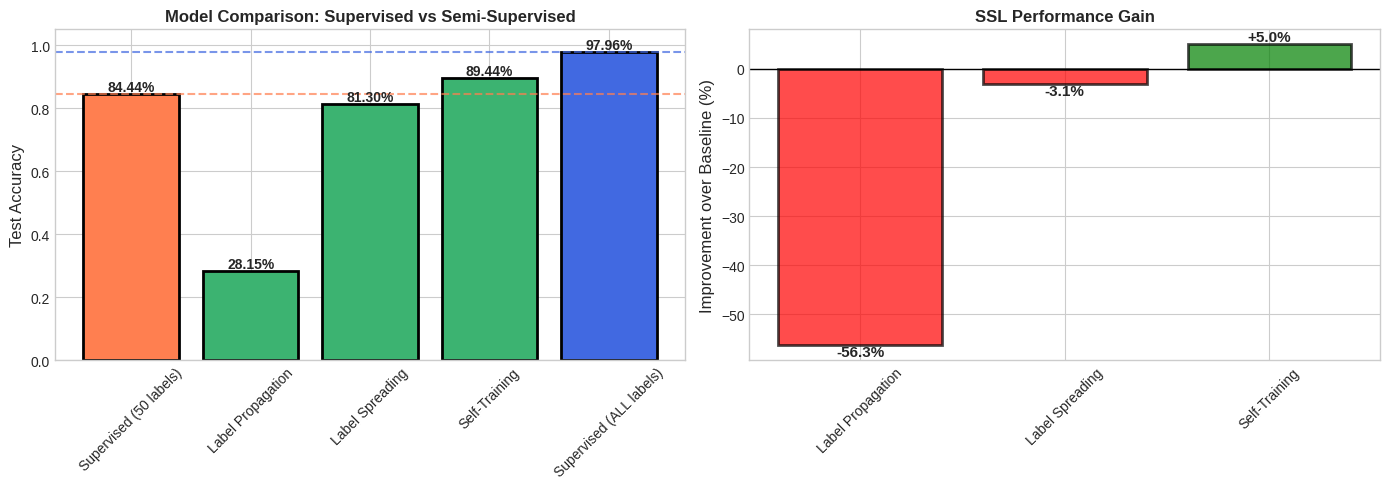


🎯 KEY OBSERVATIONS:

1. With only 50 labeled samples (4.0% of training data):
   - Supervised learning achieves 84.44% accuracy

2. By leveraging unlabeled data, SSL methods achieve:
   - Label Propagation: 28.15% (+-56.3%)
   - Label Spreading:   81.30% (+-3.1%)
   - Self-Training:     89.44% (+5.0%)

3. Upper bound (if all labels were available): 97.96%

4. SSL recovers significant performance using the SAME labeled data + unlabeled samples!



In [9]:
# Step 5: Compare results and visualize
print("\n📌 STEP 5: Results Comparison")
print("-"*50)

# For comparison: supervised model with ALL labels (upper bound)
full_supervised = LogisticRegression(random_state=42, max_iter=1000)
full_supervised.fit(X_train, y_train)
y_pred_full = full_supervised.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

# Create results summary
results_df = pd.DataFrame({
    'Method': ['Supervised (50 labels)', 'Label Propagation', 'Label Spreading', 
               'Self-Training', 'Supervised (ALL labels)'],
    'Test Accuracy': [acc_supervised, acc_lp, acc_ls, acc_st, acc_full],
    'Type': ['Baseline', 'SSL', 'SSL', 'SSL', 'Upper Bound']
})
results_df['Improvement over Baseline'] = results_df['Test Accuracy'] - acc_supervised

print("\n📊 Results Summary:")
print(results_df.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
ax1 = axes[0]
colors = ['coral', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'royalblue']
bars = ax1.bar(results_df['Method'], results_df['Test Accuracy'], color=colors, 
               edgecolor='black', linewidth=2)
ax1.set_ylabel('Test Accuracy', fontsize=12)
ax1.set_title('Model Comparison: Supervised vs Semi-Supervised', fontsize=12, fontweight='bold')
ax1.set_ylim(0, 1.05)
ax1.tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.2%}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add reference lines
ax1.axhline(y=acc_supervised, color='coral', linestyle='--', alpha=0.7, label='Supervised baseline')
ax1.axhline(y=acc_full, color='royalblue', linestyle='--', alpha=0.7, label='Supervised upper bound')

# Improvement visualization
ax2 = axes[1]
ssl_methods = results_df[results_df['Type'] == 'SSL']
colors_imp = ['green' if x > 0 else 'red' for x in ssl_methods['Improvement over Baseline']]
bars2 = ax2.bar(ssl_methods['Method'], ssl_methods['Improvement over Baseline'] * 100, 
                color=colors_imp, edgecolor='black', linewidth=2, alpha=0.7)
ax2.set_ylabel('Improvement over Baseline (%)', fontsize=12)
ax2.set_title('SSL Performance Gain', fontsize=12, fontweight='bold')
ax2.axhline(y=0, color='black', linewidth=1)
ax2.tick_params(axis='x', rotation=45)

for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:+.1f}%',
                xy=(bar.get_x() + bar.get_width()/2, height),
                ha='center', va='bottom' if height > 0 else 'top', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("🎯 KEY OBSERVATIONS:")
print("="*70)
print(f"""
1. With only {n_labeled} labeled samples ({100*n_labeled/len(y_train):.1f}% of training data):
   - Supervised learning achieves {acc_supervised:.2%} accuracy
   
2. By leveraging unlabeled data, SSL methods achieve:
   - Label Propagation: {acc_lp:.2%} (+{(acc_lp-acc_supervised)*100:.1f}%)
   - Label Spreading:   {acc_ls:.2%} (+{(acc_ls-acc_supervised)*100:.1f}%)
   - Self-Training:     {acc_st:.2%} (+{(acc_st-acc_supervised)*100:.1f}%)
   
3. Upper bound (if all labels were available): {acc_full:.2%}

4. SSL recovers significant performance using the SAME labeled data + unlabeled samples!
""")

---

## 1.7 Chapter 1 Exercises

### 📝 Conceptual Questions

**Exercise 1.1** (Easy): Explain in your own words why unlabeled data can help improve classification accuracy. What information does unlabeled data provide that labeled data alone cannot?

**Exercise 1.2** (Medium): Consider a dataset where Class A points form a tight cluster and Class B points are scattered uniformly around Class A. Would semi-supervised learning likely help or hurt in this case? Explain your reasoning.

**Exercise 1.3** (Challenging): You have access to 100 labeled medical images and 10,000 unlabeled images. However, the unlabeled images come from a different hospital with slightly different imaging equipment. What concerns should you have about using SSL? What steps might you take to mitigate potential issues?

### 💻 Coding Exercises


In [ ]:
# ============================================================================
# EXERCISE 1.4: Effect of Label Percentage on SSL Performance
# ============================================================================
"""
YOUR TASK:
Create an experiment that varies the percentage of labeled data from 1% to 50%
and compares the performance of:
1. Supervised learning (using only labeled data)
2. Label Spreading (using labeled + unlabeled data)

Plot the results showing how the gap between supervised and SSL changes
as the amount of labeled data increases.

HINT: The improvement from SSL should be largest when labels are very scarce.
"""

# Starter code - fill in the blanks
def ssl_label_percentage_experiment(X, y, label_percentages):
    """
    Run experiment varying label percentage.
    
    Parameters:
    -----------
    X : feature array
    y : label array
    label_percentages : list of floats (e.g., [0.01, 0.05, 0.1, 0.2, 0.5])
    
    Returns:
    --------
    results : DataFrame with columns ['percentage', 'supervised_acc', 'ssl_acc']
    """
    results = []
    
    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    for pct in label_percentages:
        n_labeled = max(int(len(y_train) * pct), len(np.unique(y)))  # At least one per class
        
        # TODO: Create labeled/unlabeled split
        # HINT: Use stratified sampling to ensure all classes are represented
        # YOUR CODE HERE:
        labeled_indices = []
        for l in len(y_train):
            class_l = np.all(y_train == l)[0]
            
        # labeled_mask = ...
        # y_train_partial = ...
        
        # TODO: Train supervised model (only on labeled data)
        # YOUR CODE HERE:
        # supervised_acc = ...
        
        # TODO: Train Label Spreading model (on all training data with partial labels)
        # YOUR CODE HERE:
        # ssl_acc = ...
        
        # results.append({'percentage': pct, 'supervised_acc': supervised_acc, 'ssl_acc': ssl_acc})
        pass
    
    return pd.DataFrame(results)

# Test your implementation:
X_test_data, y_test_data = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_test_data = StandardScaler().fit_transform(X_test_data)
percentages = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5]
results = ssl_label_percentage_experiment(X_test_data, y_test_data, percentages)
print(results)

print("💡 Complete the exercise above by filling in the TODO sections.")

💡 Complete the exercise above by filling in the TODO sections.


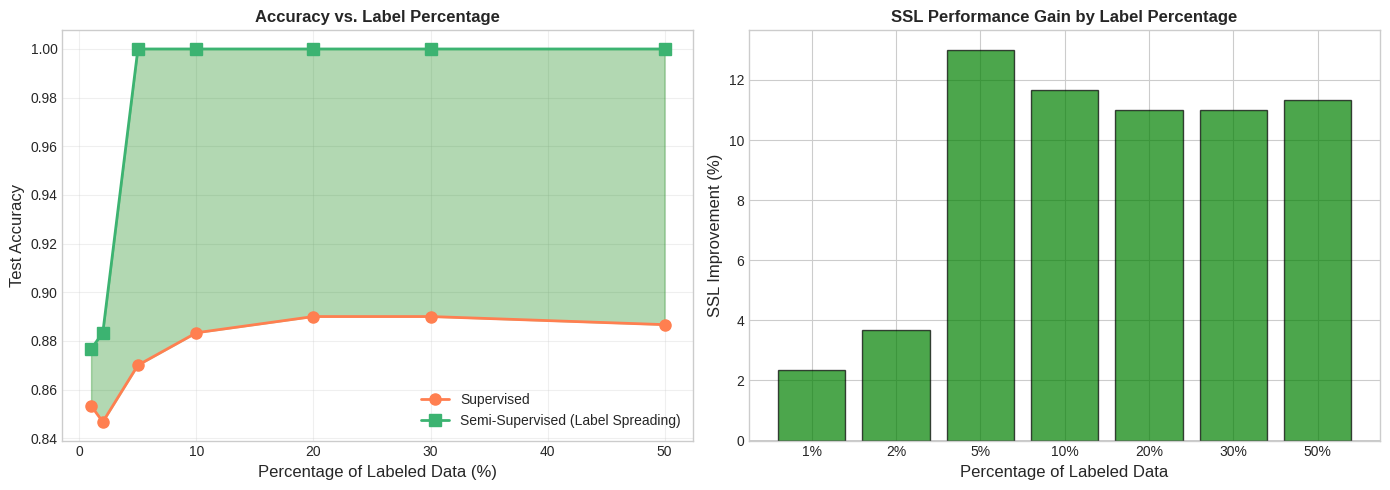


📊 Detailed Results:
 percentage  n_labeled  supervised_acc  ssl_acc  improvement
       0.01          6        0.853333 0.876667     0.023333
       0.02         14        0.846667 0.883333     0.036667
       0.05         34        0.870000 1.000000     0.130000
       0.10         70        0.883333 1.000000     0.116667
       0.20        140        0.890000 1.000000     0.110000
       0.30        210        0.890000 1.000000     0.110000
       0.50        350        0.886667 1.000000     0.113333

💡 KEY INSIGHT: SSL benefit is LARGEST when labeled data is SCARCEST!


In [11]:
# ============================================================================
# EXERCISE 1.4: SOLUTION
# ============================================================================

def ssl_label_percentage_experiment_solution(X, y, label_percentages):
    """Complete solution for the label percentage experiment."""
    results = []
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    for pct in label_percentages:
        n_labeled = max(int(len(y_train) * pct), len(np.unique(y)))
        
        # Create stratified labeled/unlabeled split
        np.random.seed(42)
        labeled_indices = []
        n_per_class = n_labeled // len(np.unique(y))
        
        for c in np.unique(y_train):
            class_idx = np.where(y_train == c)[0]
            selected = np.random.choice(class_idx, min(n_per_class, len(class_idx)), replace=False)
            labeled_indices.extend(selected)
        
        labeled_mask = np.zeros(len(y_train), dtype=bool)
        labeled_mask[labeled_indices] = True
        
        y_train_partial = np.full(len(y_train), -1)
        y_train_partial[labeled_mask] = y_train[labeled_mask]
        
        # Supervised model
        sup_model = LogisticRegression(random_state=42, max_iter=1000)
        sup_model.fit(X_train[labeled_mask], y_train[labeled_mask])
        supervised_acc = accuracy_score(y_test, sup_model.predict(X_test))
        
        # SSL model
        ssl_model = LabelSpreading(kernel='rbf', gamma=20, max_iter=1000)
        ssl_model.fit(X_train, y_train_partial)
        ssl_acc = accuracy_score(y_test, ssl_model.predict(X_test))
        
        results.append({
            'percentage': pct, 
            'n_labeled': labeled_mask.sum(),
            'supervised_acc': supervised_acc, 
            'ssl_acc': ssl_acc,
            'improvement': ssl_acc - supervised_acc
        })
    
    return pd.DataFrame(results)

# Run the experiment
X_exp, y_exp = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_exp = StandardScaler().fit_transform(X_exp)
percentages = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5]

results_exp = ssl_label_percentage_experiment_solution(X_exp, y_exp, percentages)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
ax1.plot(results_exp['percentage']*100, results_exp['supervised_acc'], 'o-', 
         label='Supervised', color='coral', linewidth=2, markersize=8)
ax1.plot(results_exp['percentage']*100, results_exp['ssl_acc'], 's-', 
         label='Semi-Supervised (Label Spreading)', color='mediumseagreen', linewidth=2, markersize=8)
ax1.fill_between(results_exp['percentage']*100, results_exp['supervised_acc'], 
                 results_exp['ssl_acc'], alpha=0.3, color='green')
ax1.set_xlabel('Percentage of Labeled Data (%)', fontsize=12)
ax1.set_ylabel('Test Accuracy', fontsize=12)
ax1.set_title('Accuracy vs. Label Percentage', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2 = axes[1]
colors = ['green' if x > 0 else 'red' for x in results_exp['improvement']]
ax2.bar([f"{p*100:.0f}%" for p in results_exp['percentage']], 
        results_exp['improvement']*100, color=colors, edgecolor='black', alpha=0.7)
ax2.set_xlabel('Percentage of Labeled Data', fontsize=12)
ax2.set_ylabel('SSL Improvement (%)', fontsize=12)
ax2.set_title('SSL Performance Gain by Label Percentage', fontsize=12, fontweight='bold')
ax2.axhline(y=0, color='black', linewidth=1)

plt.tight_layout()
plt.show()

print("\n📊 Detailed Results:")
print(results_exp.to_string(index=False))
print("\n💡 KEY INSIGHT: SSL benefit is LARGEST when labeled data is SCARCEST!")

---

## 📚 Chapter 1 Summary

### Key Concepts Learned:

1. **Semi-supervised learning** combines labeled and unlabeled data to train better models than supervised learning alone when labels are scarce.

2. **The fundamental insight**: Unlabeled data reveals the *structure* of the input space, which constrains where decision boundaries should be placed.

3. **SSL is most beneficial when**:
   - Labeled data is scarce and expensive
   - Unlabeled data is abundant
   - Data has clear structure (clusters, manifolds)
   - The unlabeled data comes from the same distribution

4. **SSL can hurt when**:
   - Assumptions don't hold
   - Classes heavily overlap
   - Distribution shift exists between labeled and unlabeled data

5. **Main SSL families**: Self-training, Graph-based, Generative, Consistency regularization, Hybrid methods

### What's Next:
In Chapter 2, we'll dive deep into the **theoretical assumptions** that make SSL work. Understanding these assumptions is crucial for knowing when SSL will help and when it might fail.

---

---


# 📖 CHAPTER 2: The Fundamental Assumptions of Semi-Supervised Learning

---

## 2.1 Why Assumptions Matter

### The Critical Question

Semi-supervised learning seems almost magical: by adding _unlabeled_ data (data without answers), we can improve our model. But this raises a fundamental question:

> **How can data without labels possibly help us learn labels?**

The answer lies in **assumptions**. SSL methods work by making assumptions about the relationship between the input distribution $P(X)$ and the labels $P(Y|X)$. When these assumptions hold, unlabeled data provides valuable information. When they don't, SSL can actually **hurt** performance.

### The Three Pillars of SSL Assumptions

Most SSL methods rely on one or more of these core assumptions:

1. **Smoothness Assumption**: Points close to each other are likely to have the same label
2. **Cluster Assumption**: Data forms discrete clusters, and points in the same cluster tend to have the same label
3. **Manifold Assumption**: High-dimensional data lies on a low-dimensional manifold

These assumptions are **not mutually exclusive**—they're different perspectives on the same underlying principle:

$$\boxed{\text{The structure of } P(X) \text{ contains information about } P(Y|X)}$$

---

## 2.2 The Smoothness Assumption

### Definition

> **Smoothness Assumption**: If two points $x_1$ and $x_2$ are close in the input space, then their labels $y_1$ and $y_2$ should also be similar.

Mathematically, if $\|x_1 - x_2\|$ is small, then $P(Y|x_1) \approx P(Y|x_2)$.

### Intuition

Think of a topographic map:

- Nearby points on the map have similar elevations
- You can predict the elevation of an unmeasured point by looking at measured points nearby
- The terrain is "smooth" — no sudden cliffs in most places

In ML terms:

- The label function varies **smoothly** over the input space
- This allows us to "interpolate" labels between known points
- Unlabeled points help us understand where smooth vs. rapid changes occur

### When It Holds vs. Fails

✅ **Holds**: Image classification (nearby pixels usually belong to same object), temperature prediction (nearby locations have similar temperatures)

❌ **Fails**: Highly irregular boundaries, adversarial examples, data with sharp discontinuities


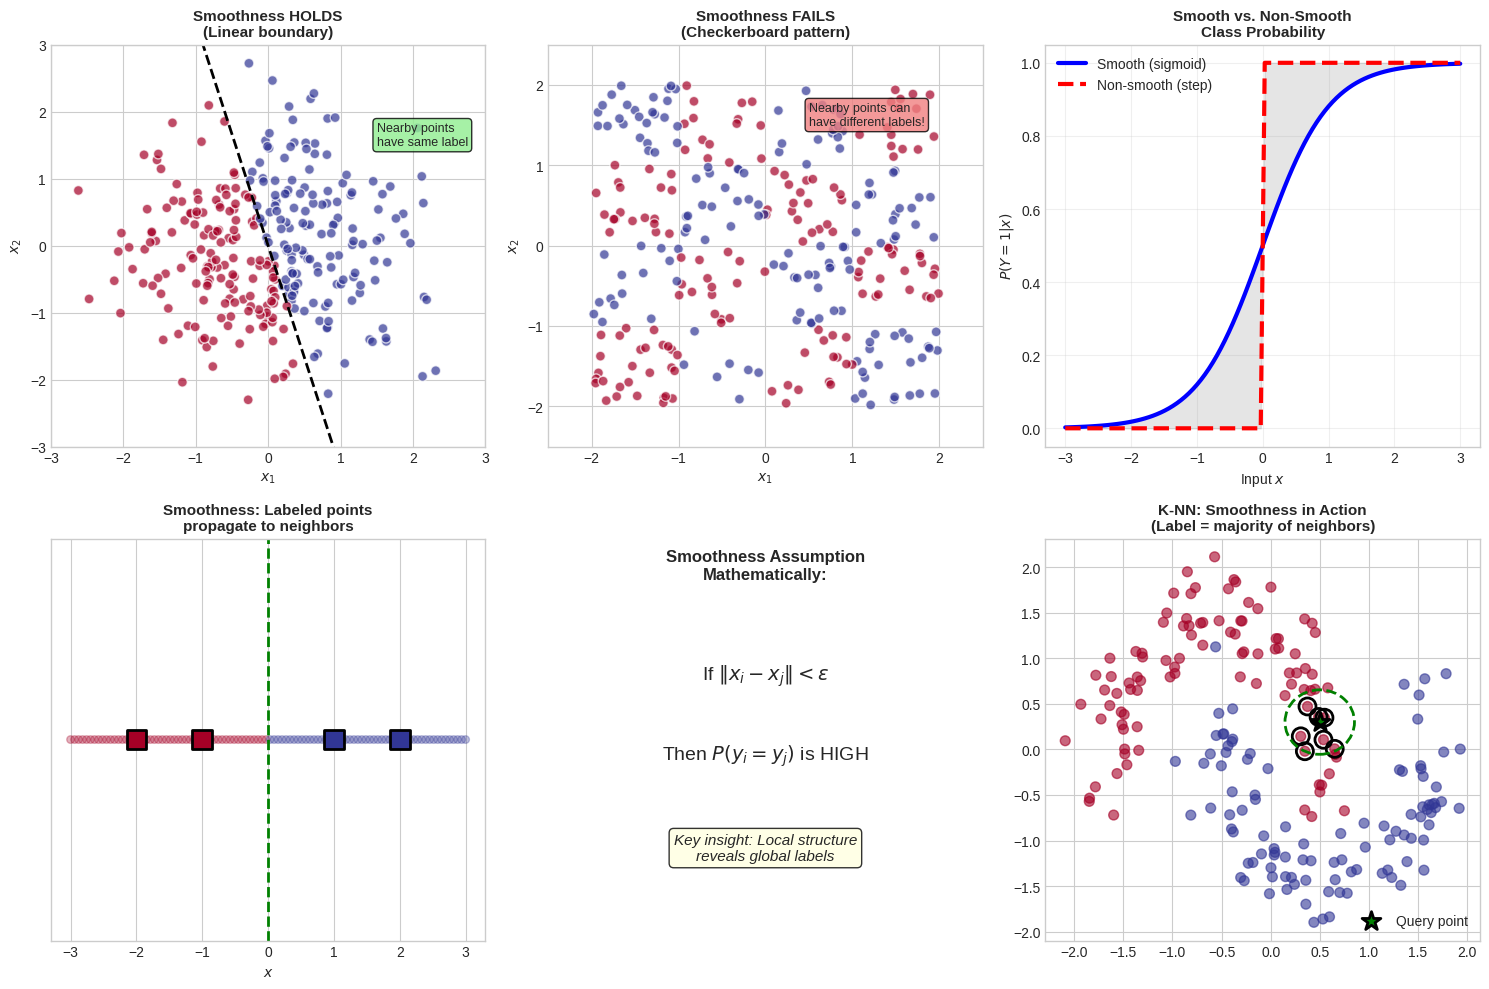


📝 KEY TAKEAWAYS - Smoothness Assumption:

1. The smoothness assumption says: nearby points should have similar labels
2. This is WHY local methods like K-NN and kernel methods work
3. Unlabeled points help by revealing where the input space is "dense"
4. SSL exploits this: propagate labels from labeled to nearby unlabeled points
5. FAILS when: checkerboard patterns, adversarial examples, sharp boundaries



In [12]:
# ============================================================================
# VISUALIZATION 2.1: The Smoothness Assumption
# ============================================================================
"""
This visualization demonstrates when the smoothness assumption holds and fails.
"""

np.random.seed(42)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Example 1: Smoothness HOLDS - gradual boundary
ax1 = axes[0, 0]
n = 300
X_smooth = np.random.randn(n, 2)
# Class determined by smooth boundary
y_smooth = (X_smooth[:, 0] + 0.3 * X_smooth[:, 1] > 0).astype(int)

scatter1 = ax1.scatter(X_smooth[:, 0], X_smooth[:, 1], c=y_smooth, cmap='RdYlBu', 
                       s=50, alpha=0.7, edgecolors='white')
ax1.set_title('Smoothness HOLDS\n(Linear boundary)', fontsize=11, fontweight='bold')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')

# Draw the smooth boundary
x_line = np.linspace(-3, 3, 100)
ax1.plot(x_line, -x_line/0.3, 'k--', linewidth=2, label='Decision boundary')
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.annotate('Nearby points\nhave same label', xy=(1.5, 1.5), fontsize=9,
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Example 2: Smoothness FAILS - checkerboard pattern  
ax2 = axes[0, 1]
X_checker = np.random.uniform(-2, 2, (n, 2))
y_checker = ((np.floor(X_checker[:, 0]) + np.floor(X_checker[:, 1])) % 2).astype(int)

ax2.scatter(X_checker[:, 0], X_checker[:, 1], c=y_checker, cmap='RdYlBu', 
            s=50, alpha=0.7, edgecolors='white')
ax2.set_title('Smoothness FAILS\n(Checkerboard pattern)', fontsize=11, fontweight='bold')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_xlim(-2.5, 2.5)
ax2.set_ylim(-2.5, 2.5)
ax2.annotate('Nearby points can\nhave different labels!', xy=(0.5, 1.5), fontsize=9,
            bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

# Example 3: Smooth function visualization
ax3 = axes[0, 2]
x_func = np.linspace(-3, 3, 100)
y_func_smooth = 1 / (1 + np.exp(-2*x_func))  # Smooth sigmoid
y_func_step = (x_func > 0).astype(float)  # Step function

ax3.plot(x_func, y_func_smooth, 'b-', linewidth=3, label='Smooth (sigmoid)')
ax3.plot(x_func, y_func_step, 'r--', linewidth=3, label='Non-smooth (step)')
ax3.fill_between(x_func, y_func_smooth, y_func_step, alpha=0.2, color='gray')
ax3.set_xlabel('Input $x$')
ax3.set_ylabel('$P(Y=1|x)$')
ax3.set_title('Smooth vs. Non-Smooth\nClass Probability', fontsize=11, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Example 4: How smoothness helps SSL - 1D visualization
ax4 = axes[1, 0]
# Create 1D data
x_1d = np.linspace(-3, 3, 100).reshape(-1, 1)
y_1d_true = (x_1d.ravel() > 0).astype(int)

# Few labeled points
labeled_x = np.array([-2, -1, 1, 2]).reshape(-1, 1)
labeled_y = np.array([0, 0, 1, 1])

ax4.scatter(x_1d, np.zeros_like(x_1d), c=y_1d_true, cmap='RdYlBu', s=30, alpha=0.3)
ax4.scatter(labeled_x, np.zeros_like(labeled_x), c=labeled_y, cmap='RdYlBu', 
            s=200, edgecolors='black', linewidth=2, marker='s')
ax4.axvline(x=0, color='green', linestyle='--', linewidth=2, label='True boundary')
ax4.set_xlabel('$x$')
ax4.set_title('Smoothness: Labeled points\npropagate to neighbors', fontsize=11, fontweight='bold')
ax4.set_yticks([])

# Add arrows showing label propagation
for x_lab in labeled_x.ravel():
    if x_lab < 0:
        ax4.annotate('', xy=(x_lab+0.5, 0.1), xytext=(x_lab, 0.1),
                    arrowprops=dict(arrowstyle='->', color='blue', lw=2))
    else:
        ax4.annotate('', xy=(x_lab-0.5, 0.1), xytext=(x_lab, 0.1),
                    arrowprops=dict(arrowstyle='->', color='red', lw=2))

# Example 5: Mathematical intuition
ax5 = axes[1, 1]
ax5.text(0.5, 0.9, "Smoothness Assumption\nMathematically:", fontsize=12, fontweight='bold',
        ha='center', transform=ax5.transAxes)
ax5.text(0.5, 0.65, r"If $\|x_i - x_j\| < \epsilon$", fontsize=14,
        ha='center', transform=ax5.transAxes)
ax5.text(0.5, 0.45, r"Then $P(y_i = y_j)$ is HIGH", fontsize=14,
        ha='center', transform=ax5.transAxes)
ax5.text(0.5, 0.2, "Key insight: Local structure\nreveals global labels", fontsize=11,
        ha='center', transform=ax5.transAxes, style='italic',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
ax5.axis('off')

# Example 6: K-NN as smoothness embodiment
ax6 = axes[1, 2]
# Show how KNN embodies smoothness
X_knn, y_knn = make_moons(n_samples=200, noise=0.15, random_state=42)
X_knn = StandardScaler().fit_transform(X_knn)

# Select a query point
query = np.array([[0.5, 0.3]])

# Find k nearest neighbors
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=7)
nn.fit(X_knn)
distances, indices = nn.kneighbors(query)

ax6.scatter(X_knn[:, 0], X_knn[:, 1], c=y_knn, cmap='RdYlBu', s=50, alpha=0.6)
ax6.scatter(query[0, 0], query[0, 1], c='green', s=200, marker='*', 
            edgecolors='black', linewidth=2, label='Query point')

# Highlight neighbors
ax6.scatter(X_knn[indices[0], 0], X_knn[indices[0], 1], 
            facecolors='none', edgecolors='black', s=150, linewidth=2)

# Draw circle
circle = plt.Circle((query[0, 0], query[0, 1]), distances[0, -1], 
                     fill=False, color='green', linestyle='--', linewidth=2)
ax6.add_patch(circle)

ax6.set_title('K-NN: Smoothness in Action\n(Label = majority of neighbors)', 
             fontsize=11, fontweight='bold')
ax6.legend(loc='lower right')

plt.tight_layout()
plt.savefig('smoothness_assumption.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("📝 KEY TAKEAWAYS - Smoothness Assumption:")
print("="*70)
print("""
1. The smoothness assumption says: nearby points should have similar labels
2. This is WHY local methods like K-NN and kernel methods work
3. Unlabeled points help by revealing where the input space is "dense"
4. SSL exploits this: propagate labels from labeled to nearby unlabeled points
5. FAILS when: checkerboard patterns, adversarial examples, sharp boundaries
""")

---

## 2.3 The Cluster Assumption (Low-Density Separation)

### Definition

> **Cluster Assumption**: The data forms discrete clusters, and data points in the same cluster are likely to belong to the same class. Equivalently, the **decision boundary should pass through low-density regions** of the input space.

This is sometimes called the **Low-Density Separation** assumption because it implies:

$$\text{Decision boundary} \rightarrow \text{Low-density regions of } P(X)$$

### Intuition

Imagine looking at a satellite image of a city at night:

- Bright clusters represent populated areas (high density)
- Dark regions represent uninhabited areas (low density)
- Natural boundaries (rivers, highways) run through dark areas

Similarly in data:

- Data clusters represent natural groupings
- Decision boundaries should run through "gaps" between clusters
- Unlabeled data reveals where these gaps are!

### Mathematical Formulation

If $f(x)$ is our classifier, the cluster assumption suggests:

$$P(x) \cdot \|\nabla f(x)\| \text{ should be small}$$

This means:

- Where density $P(x)$ is high → gradients should be small (stable predictions)
- Large gradients (decision boundaries) → should occur where $P(x)$ is low

### Why This Helps SSL

Unlabeled data tells us where $P(X)$ is high vs. low:

- High-density regions → labels should be consistent
- Low-density regions → decision boundaries can safely pass here

### Practical Implication

**Transductive SVMs** and **Entropy Minimization** methods directly exploit this assumption by pushing decision boundaries into low-density regions.


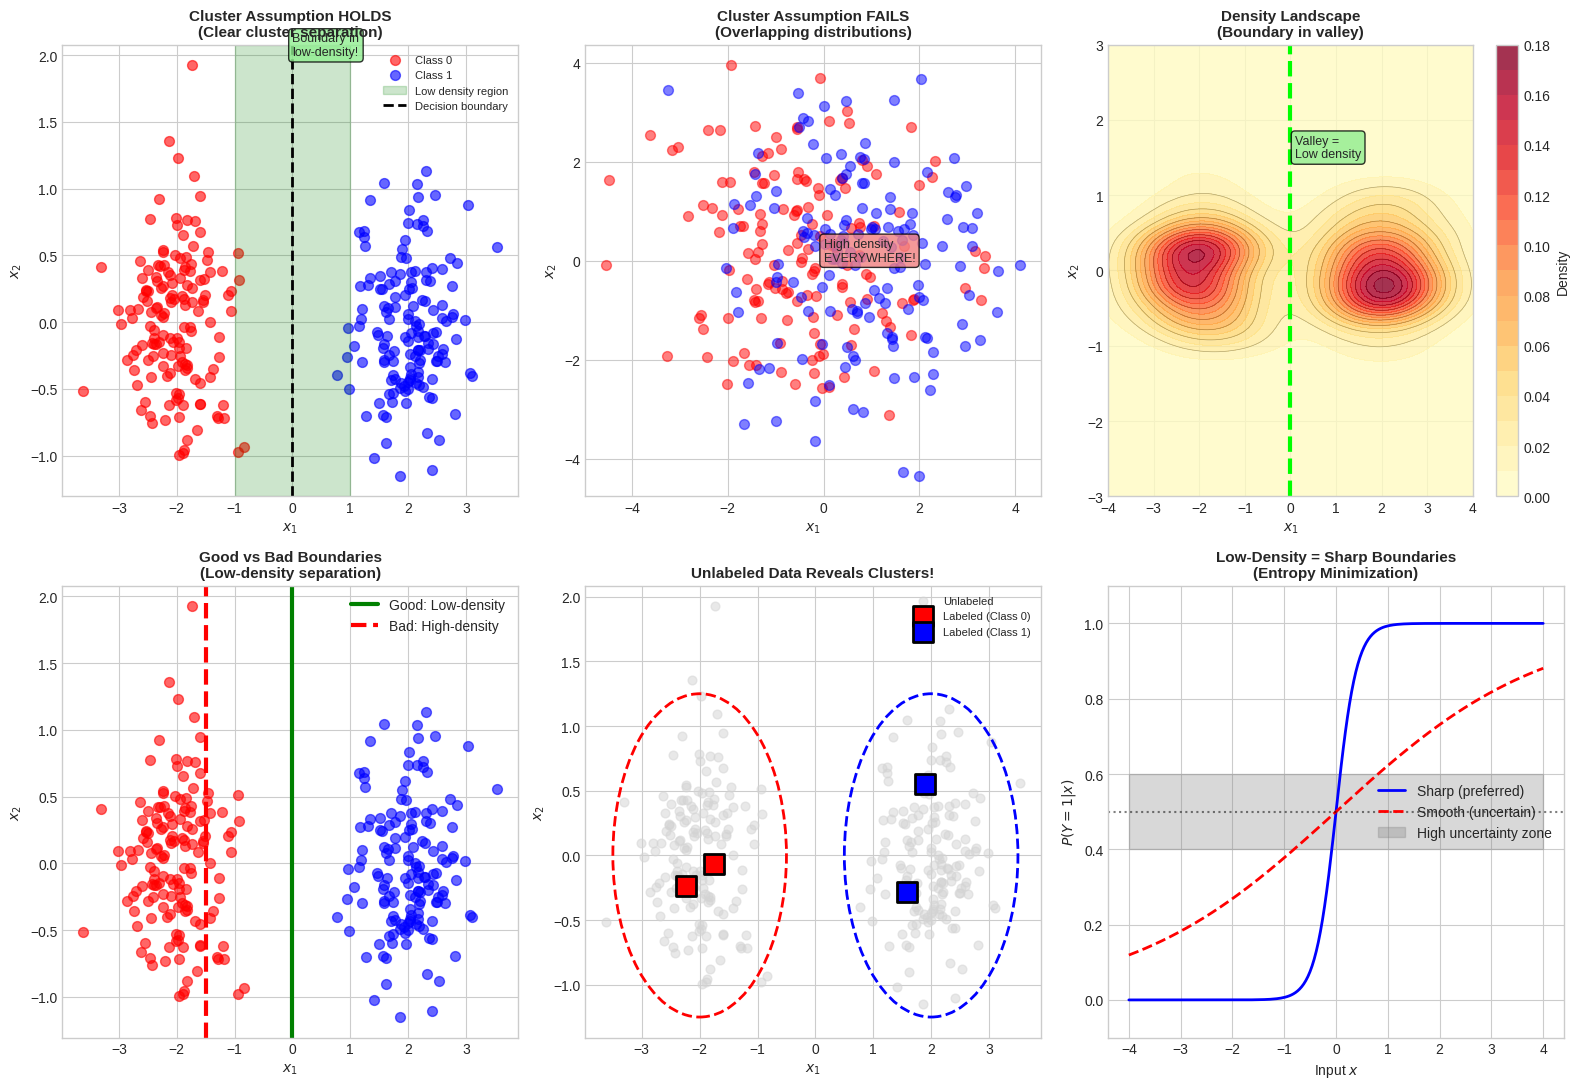


📝 KEY TAKEAWAYS - Cluster (Low-Density Separation) Assumption:

1. Decision boundaries should pass through LOW-DENSITY regions
2. Clusters of data should have consistent labels within each cluster
3. Unlabeled data reveals cluster structure → shows where boundaries should go
4. This is why clustering + labeling can work for SSL
5. Entropy minimization pushes predictions to be confident (0 or 1, not 0.5)
6. FAILS when: clusters don't correspond to classes, overlapping distributions



In [13]:
# ============================================================================
# VISUALIZATION 2.2: The Cluster (Low-Density Separation) Assumption
# ============================================================================

np.random.seed(42)
fig, axes = plt.subplots(2, 3, figsize=(16, 11))

# Example 1: Cluster assumption HOLDS - clear clusters
ax1 = axes[0, 0]
n_per_cluster = 150
# Create well-separated clusters
cluster1 = np.random.randn(n_per_cluster, 2) * 0.5 + [-2, 0]
cluster2 = np.random.randn(n_per_cluster, 2) * 0.5 + [2, 0]
X_cluster = np.vstack([cluster1, cluster2])
y_cluster = np.array([0]*n_per_cluster + [1]*n_per_cluster)

ax1.scatter(X_cluster[y_cluster==0, 0], X_cluster[y_cluster==0, 1], 
            c='red', s=50, alpha=0.6, label='Class 0')
ax1.scatter(X_cluster[y_cluster==1, 0], X_cluster[y_cluster==1, 1], 
            c='blue', s=50, alpha=0.6, label='Class 1')

# Show low density region
ax1.axvspan(-1, 1, alpha=0.2, color='green', label='Low density region')
ax1.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Decision boundary')

ax1.set_title('Cluster Assumption HOLDS\n(Clear cluster separation)', fontsize=11, fontweight='bold')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.legend(loc='upper right', fontsize=8)
ax1.annotate('Boundary in\nlow-density!', xy=(0, 2), fontsize=9,
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Example 2: Cluster assumption FAILS - overlapping clusters
ax2 = axes[0, 1]
cluster1_overlap = np.random.randn(n_per_cluster, 2) * 1.5 + [-0.5, 0]
cluster2_overlap = np.random.randn(n_per_cluster, 2) * 1.5 + [0.5, 0]
X_overlap = np.vstack([cluster1_overlap, cluster2_overlap])
y_overlap = np.array([0]*n_per_cluster + [1]*n_per_cluster)

ax2.scatter(X_overlap[y_overlap==0, 0], X_overlap[y_overlap==0, 1], 
            c='red', s=50, alpha=0.5, label='Class 0')
ax2.scatter(X_overlap[y_overlap==1, 0], X_overlap[y_overlap==1, 1], 
            c='blue', s=50, alpha=0.5, label='Class 1')

ax2.set_title('Cluster Assumption FAILS\n(Overlapping distributions)', fontsize=11, fontweight='bold')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.annotate('High density\nEVERYWHERE!', xy=(0, 0), fontsize=9,
            bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

# Example 3: Density visualization
ax3 = axes[0, 2]

# Create density plot for well-separated data
from scipy.stats import gaussian_kde
# Combined data density
X_combined = np.vstack([cluster1, cluster2])
density = gaussian_kde(X_combined.T)
x_grid = np.linspace(-4, 4, 100)
y_grid = np.linspace(-3, 3, 100)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X_grid.ravel(), Y_grid.ravel()])
Z = density(positions).reshape(X_grid.shape)

contour = ax3.contourf(X_grid, Y_grid, Z, levels=20, cmap='YlOrRd', alpha=0.8)
ax3.contour(X_grid, Y_grid, Z, levels=10, colors='black', alpha=0.3, linewidths=0.5)
ax3.axvline(x=0, color='lime', linestyle='--', linewidth=3, label='Optimal boundary')

ax3.set_title('Density Landscape\n(Boundary in valley)', fontsize=11, fontweight='bold')
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
plt.colorbar(contour, ax=ax3, label='Density')
ax3.annotate('Valley =\nLow density', xy=(0.1, 1.5), fontsize=9,
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Example 4: Wrong boundary vs Right boundary
ax4 = axes[1, 0]
ax4.scatter(X_cluster[y_cluster==0, 0], X_cluster[y_cluster==0, 1], 
            c='red', s=50, alpha=0.6)
ax4.scatter(X_cluster[y_cluster==1, 0], X_cluster[y_cluster==1, 1], 
            c='blue', s=50, alpha=0.6)

# Good boundary (through low density)
ax4.axvline(x=0, color='green', linestyle='-', linewidth=3, label='Good: Low-density')
# Bad boundary (through high density)
ax4.axvline(x=-1.5, color='red', linestyle='--', linewidth=3, label='Bad: High-density')

ax4.set_title('Good vs Bad Boundaries\n(Low-density separation)', fontsize=11, fontweight='bold')
ax4.legend()
ax4.set_xlabel('$x_1$')
ax4.set_ylabel('$x_2$')

# Example 5: How unlabeled data reveals clusters
ax5 = axes[1, 1]

# Only show a few labeled points
np.random.seed(42)
labeled_idx = [0, 5, 150, 155]  # 2 from each cluster

ax5.scatter(X_cluster[:, 0], X_cluster[:, 1], c='lightgray', s=40, alpha=0.5, label='Unlabeled')
ax5.scatter(X_cluster[labeled_idx[:2], 0], X_cluster[labeled_idx[:2], 1], 
            c='red', s=200, marker='s', edgecolors='black', linewidth=2, label='Labeled (Class 0)')
ax5.scatter(X_cluster[labeled_idx[2:], 0], X_cluster[labeled_idx[2:], 1], 
            c='blue', s=200, marker='s', edgecolors='black', linewidth=2, label='Labeled (Class 1)')

# Show cluster structure emerges from unlabeled
from matplotlib.patches import Ellipse
ellipse1 = Ellipse((-2, 0), 3, 2.5, fill=False, color='red', linestyle='--', linewidth=2)
ellipse2 = Ellipse((2, 0), 3, 2.5, fill=False, color='blue', linestyle='--', linewidth=2)
ax5.add_patch(ellipse1)
ax5.add_patch(ellipse2)

ax5.set_title('Unlabeled Data Reveals Clusters!', fontsize=11, fontweight='bold')
ax5.legend(loc='upper right', fontsize=8)
ax5.set_xlabel('$x_1$')
ax5.set_ylabel('$x_2$')

# Example 6: Entropy minimization concept
ax6 = axes[1, 2]
x_range = np.linspace(-4, 4, 200)

# P(y=1|x) for different scenarios
prob_sharp = 1 / (1 + np.exp(-5 * x_range))  # Sharp transition (low entropy)
prob_smooth = 1 / (1 + np.exp(-0.5 * x_range))  # Smooth transition (high entropy)

# Entropy = -p*log(p) - (1-p)*log(1-p)
def entropy(p):
    p = np.clip(p, 1e-10, 1-1e-10)
    return -p * np.log2(p) - (1-p) * np.log2(1-p)

ax6.plot(x_range, prob_sharp, 'b-', linewidth=2, label='Sharp (preferred)')
ax6.plot(x_range, prob_smooth, 'r--', linewidth=2, label='Smooth (uncertain)')
ax6.fill_between(x_range, 0.4, 0.6, alpha=0.3, color='gray', label='High uncertainty zone')

ax6.axhline(y=0.5, color='black', linestyle=':', alpha=0.5)
ax6.set_xlabel('Input $x$')
ax6.set_ylabel('$P(Y=1|x)$')
ax6.set_title('Low-Density = Sharp Boundaries\n(Entropy Minimization)', fontsize=11, fontweight='bold')
ax6.legend(loc='right')
ax6.set_ylim(-0.1, 1.1)

plt.tight_layout()
plt.savefig('cluster_assumption.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("📝 KEY TAKEAWAYS - Cluster (Low-Density Separation) Assumption:")
print("="*70)
print("""
1. Decision boundaries should pass through LOW-DENSITY regions
2. Clusters of data should have consistent labels within each cluster
3. Unlabeled data reveals cluster structure → shows where boundaries should go
4. This is why clustering + labeling can work for SSL
5. Entropy minimization pushes predictions to be confident (0 or 1, not 0.5)
6. FAILS when: clusters don't correspond to classes, overlapping distributions
""")

---

## 2.4 The Manifold Assumption

### Definition

> **Manifold Assumption**: High-dimensional data lies on or near a low-dimensional manifold (a smooth surface) embedded in the high-dimensional space. Points on the same local region of the manifold should have the same label.

### Intuition: The Swiss Roll Example

Imagine a piece of paper (2D manifold) that has been rolled up in 3D space:

- In 3D Euclidean space, two points might be far apart
- But on the **manifold** (unrolled paper), they might be close
- Labels should be consistent along the manifold, not in raw Euclidean space

### Why This Matters for High-Dimensional Data

Consider a 28×28 grayscale image (784 dimensions):

- Not all 784-dimensional vectors are valid images
- Valid images form a tiny "surface" in this huge space
- The "surface" is the **image manifold**

Similarly:

- Natural language sentences form a manifold in word embedding space
- Human poses form a manifold in pixel space
- Audio signals form a manifold in spectrogram space

### Mathematical Perspective

If data lies on a $d$-dimensional manifold $\mathcal{M}$ in $\mathbb{R}^D$ where $d \ll D$:

1. **Geodesic distance** (distance along the manifold) is more meaningful than Euclidean distance
2. Labels vary smoothly along the manifold directions
3. SSL should respect manifold structure, not just Euclidean proximity

### SSL Methods Exploiting Manifold Assumption

- **Graph-based methods**: Build graphs that approximate the manifold
- **Deep learning**: Neural networks can learn manifold representations
- **Manifold regularization**: Penalize non-smooth functions on the manifold


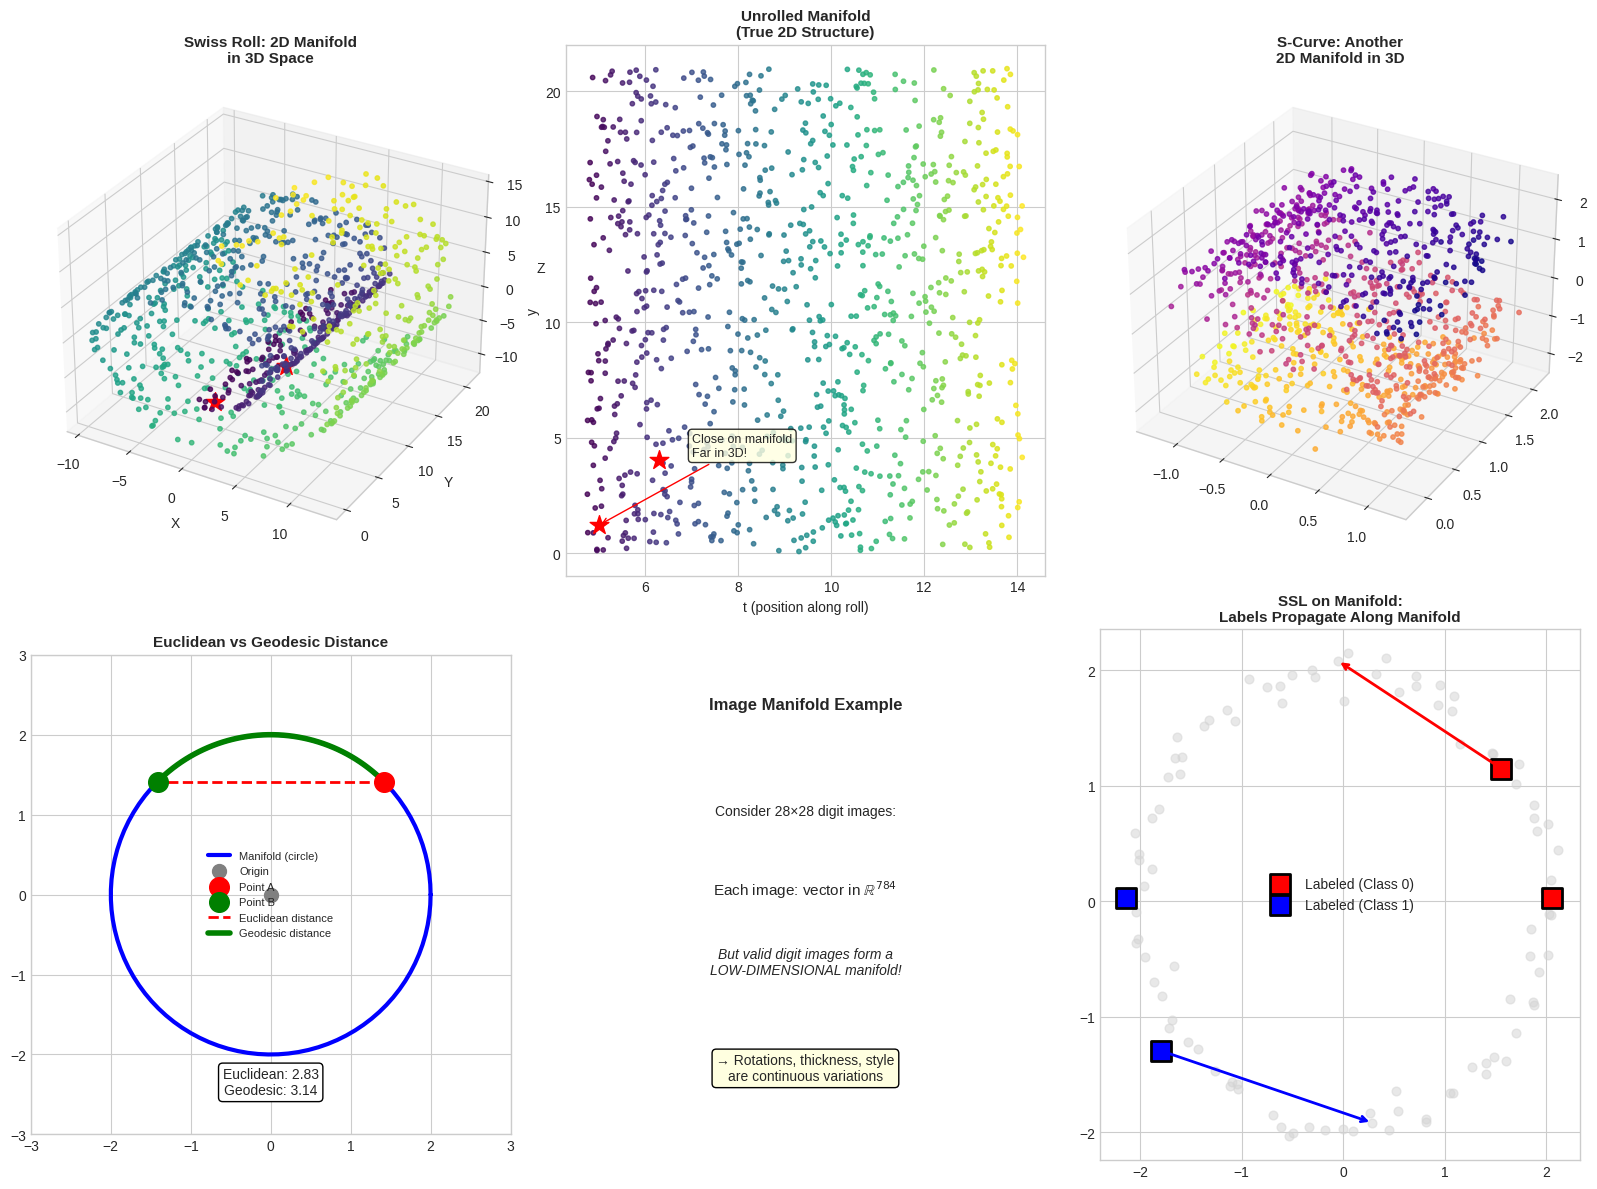


📝 KEY TAKEAWAYS - Manifold Assumption:

1. High-dimensional data often lies on a LOW-dimensional manifold
2. GEODESIC distance (along manifold) is more meaningful than Euclidean
3. Labels should be consistent along manifold, not just in Euclidean space
4. Graph-based SSL methods build graphs that approximate the manifold
5. Deep learning implicitly learns manifold representations
6. The manifold assumption explains why SSL works for images, text, audio



In [14]:
# ============================================================================
# VISUALIZATION 2.3: The Manifold Assumption
# ============================================================================

from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
fig = plt.figure(figsize=(16, 12))

# Example 1: Swiss Roll - Classic Manifold Example
ax1 = fig.add_subplot(2, 3, 1, projection='3d')

# Generate Swiss roll
n_points = 1000
t = 1.5 * np.pi * (1 + 2 * np.random.rand(n_points))
x = t * np.cos(t)
y = 21 * np.random.rand(n_points)
z = t * np.sin(t)
X_swiss = np.column_stack([x, y, z])

# Color by position on the manifold (t parameter)
colors = t

scatter = ax1.scatter(x, y, z, c=colors, cmap='viridis', s=10, alpha=0.8)
ax1.set_title('Swiss Roll: 2D Manifold\nin 3D Space', fontsize=11, fontweight='bold')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Highlight two points that are close in 3D but far on manifold
idx1, idx2 = 100, 600
ax1.scatter([x[idx1]], [y[idx1]], [z[idx1]], c='red', s=200, marker='*')
ax1.scatter([x[idx2]], [y[idx2]], [z[idx2]], c='red', s=200, marker='*')

# Example 2: 2D view (unrolled manifold)
ax2 = fig.add_subplot(2, 3, 2)
ax2.scatter(t, y, c=colors, cmap='viridis', s=10, alpha=0.8)
ax2.scatter([t[idx1]], [y[idx1]], c='red', s=200, marker='*')
ax2.scatter([t[idx2]], [y[idx2]], c='red', s=200, marker='*')
ax2.set_title('Unrolled Manifold\n(True 2D Structure)', fontsize=11, fontweight='bold')
ax2.set_xlabel('t (position along roll)')
ax2.set_ylabel('y')

# Add annotation showing the distance difference
ax2.annotate('Close on manifold\nFar in 3D!', xy=(t[idx1], y[idx1]), 
            xytext=(t[idx1]+2, y[idx1]+3), fontsize=9,
            arrowprops=dict(arrowstyle='->', color='red'),
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# Example 3: S-curve manifold
ax3 = fig.add_subplot(2, 3, 3, projection='3d')
from sklearn.datasets import make_s_curve
X_scurve, color_scurve = make_s_curve(n_samples=1000, noise=0.1, random_state=42)

scatter3 = ax3.scatter(X_scurve[:, 0], X_scurve[:, 1], X_scurve[:, 2], 
                       c=color_scurve, cmap='plasma', s=10, alpha=0.8)
ax3.set_title('S-Curve: Another\n2D Manifold in 3D', fontsize=11, fontweight='bold')

# Example 4: Why Euclidean distance fails
ax4 = fig.add_subplot(2, 3, 4)

# Create simple 2D manifold visualization
theta = np.linspace(0, 2*np.pi, 100)
r = 2
x_circle = r * np.cos(theta)
y_circle = r * np.sin(theta)

ax4.plot(x_circle, y_circle, 'b-', linewidth=3, label='Manifold (circle)')
ax4.scatter([0], [0], c='gray', s=100, label='Origin')

# Two points on circle
p1_angle, p2_angle = np.pi/4, 3*np.pi/4
p1 = np.array([r*np.cos(p1_angle), r*np.sin(p1_angle)])
p2 = np.array([r*np.cos(p2_angle), r*np.sin(p2_angle)])

ax4.scatter([p1[0]], [p1[1]], c='red', s=200, zorder=5, label='Point A')
ax4.scatter([p2[0]], [p2[1]], c='green', s=200, zorder=5, label='Point B')

# Euclidean distance (straight line)
ax4.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r--', linewidth=2, label='Euclidean distance')

# Geodesic distance (along circle)
arc_angles = np.linspace(p1_angle, p2_angle, 50)
ax4.plot(r*np.cos(arc_angles), r*np.sin(arc_angles), 'g-', linewidth=4, 
         label='Geodesic distance')

ax4.set_title('Euclidean vs Geodesic Distance', fontsize=11, fontweight='bold')
ax4.legend(loc='center', fontsize=8)
ax4.set_aspect('equal')
ax4.set_xlim(-3, 3)
ax4.set_ylim(-3, 3)

euclidean_dist = np.linalg.norm(p1 - p2)
geodesic_dist = r * (p2_angle - p1_angle)
ax4.text(0, -2.5, f'Euclidean: {euclidean_dist:.2f}\nGeodesic: {geodesic_dist:.2f}', 
         ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='white'))

# Example 5: Manifold in image space
ax5 = fig.add_subplot(2, 3, 5)
ax5.text(0.5, 0.85, "Image Manifold Example", fontsize=12, fontweight='bold',
        ha='center', transform=ax5.transAxes)
ax5.text(0.5, 0.65, "Consider 28×28 digit images:", fontsize=10,
        ha='center', transform=ax5.transAxes)
ax5.text(0.5, 0.5, r"Each image: vector in $\mathbb{R}^{784}$", fontsize=11,
        ha='center', transform=ax5.transAxes)
ax5.text(0.5, 0.35, "But valid digit images form a\nLOW-DIMENSIONAL manifold!", fontsize=10,
        ha='center', transform=ax5.transAxes, style='italic')
ax5.text(0.5, 0.15, "→ Rotations, thickness, style\nare continuous variations", fontsize=10,
        ha='center', transform=ax5.transAxes,
        bbox=dict(boxstyle='round', facecolor='lightyellow'))
ax5.axis('off')

# Example 6: SSL on manifold
ax6 = fig.add_subplot(2, 3, 6)

# Create a 2D representation
np.random.seed(42)
# Class 0: one arc
theta0 = np.linspace(0, np.pi, 50)
x0 = 2 * np.cos(theta0) + np.random.randn(50) * 0.1
y0 = 2 * np.sin(theta0) + np.random.randn(50) * 0.1

# Class 1: another arc
theta1 = np.linspace(np.pi, 2*np.pi, 50)
x1 = 2 * np.cos(theta1) + np.random.randn(50) * 0.1
y1 = 2 * np.sin(theta1) + np.random.randn(50) * 0.1

# Plot all as unlabeled first
ax6.scatter(x0, y0, c='lightgray', s=40, alpha=0.5)
ax6.scatter(x1, y1, c='lightgray', s=40, alpha=0.5)

# Few labeled samples
ax6.scatter([x0[0], x0[10]], [y0[0], y0[10]], c='red', s=200, marker='s', 
            edgecolors='black', linewidth=2, label='Labeled (Class 0)')
ax6.scatter([x1[0], x1[10]], [y1[0], y1[10]], c='blue', s=200, marker='s', 
            edgecolors='black', linewidth=2, label='Labeled (Class 1)')

ax6.set_title('SSL on Manifold:\nLabels Propagate Along Manifold', fontsize=11, fontweight='bold')
ax6.legend()

# Draw arrows showing propagation along manifold
ax6.annotate('', xy=(x0[25], y0[25]), xytext=(x0[10], y0[10]),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax6.annotate('', xy=(x1[25], y1[25]), xytext=(x1[10], y1[10]),
            arrowprops=dict(arrowstyle='->', color='blue', lw=2))

plt.tight_layout()
plt.savefig('manifold_assumption.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("📝 KEY TAKEAWAYS - Manifold Assumption:")
print("="*70)
print("""
1. High-dimensional data often lies on a LOW-dimensional manifold
2. GEODESIC distance (along manifold) is more meaningful than Euclidean
3. Labels should be consistent along manifold, not just in Euclidean space
4. Graph-based SSL methods build graphs that approximate the manifold
5. Deep learning implicitly learns manifold representations
6. The manifold assumption explains why SSL works for images, text, audio
""")

---

## 2.5 How Assumptions Connect to SSL Methods

Each SSL method makes implicit or explicit use of these assumptions:

| SSL Method | Primary Assumption | How It's Used |
|------------|-------------------|---------------|
| **K-NN based** | Smoothness | Label = majority of nearby labeled points |
| **Label Propagation** | Smoothness + Manifold | Labels flow along graph edges |
| **Self-Training** | Smoothness + Cluster | High-confidence predictions propagate |
| **Co-Training** | Smoothness | Consistent across views |
| **Transductive SVM** | Low-Density Separation | Push boundary to low-density regions |
| **Entropy Minimization** | Cluster | Force confident predictions |
| **Mean Teacher** | Smoothness | Consistent under perturbations |
| **Graph Neural Networks** | Manifold | Message passing on graph structure |

---

## 2.6 When Assumptions Fail: Negative Transfer

### The Danger of Wrong Assumptions

When SSL assumptions don't match reality, using unlabeled data can **hurt** performance—this is called **negative transfer**.

### Common Failure Modes:

1. **Class Overlap**: Clusters don't correspond to classes
2. **Distribution Shift**: Unlabeled data from different distribution
3. **Confirmation Bias**: Self-training amplifies initial errors
4. **Noisy Labels**: Few labeled examples are incorrectly labeled

Let's demonstrate this empirically:


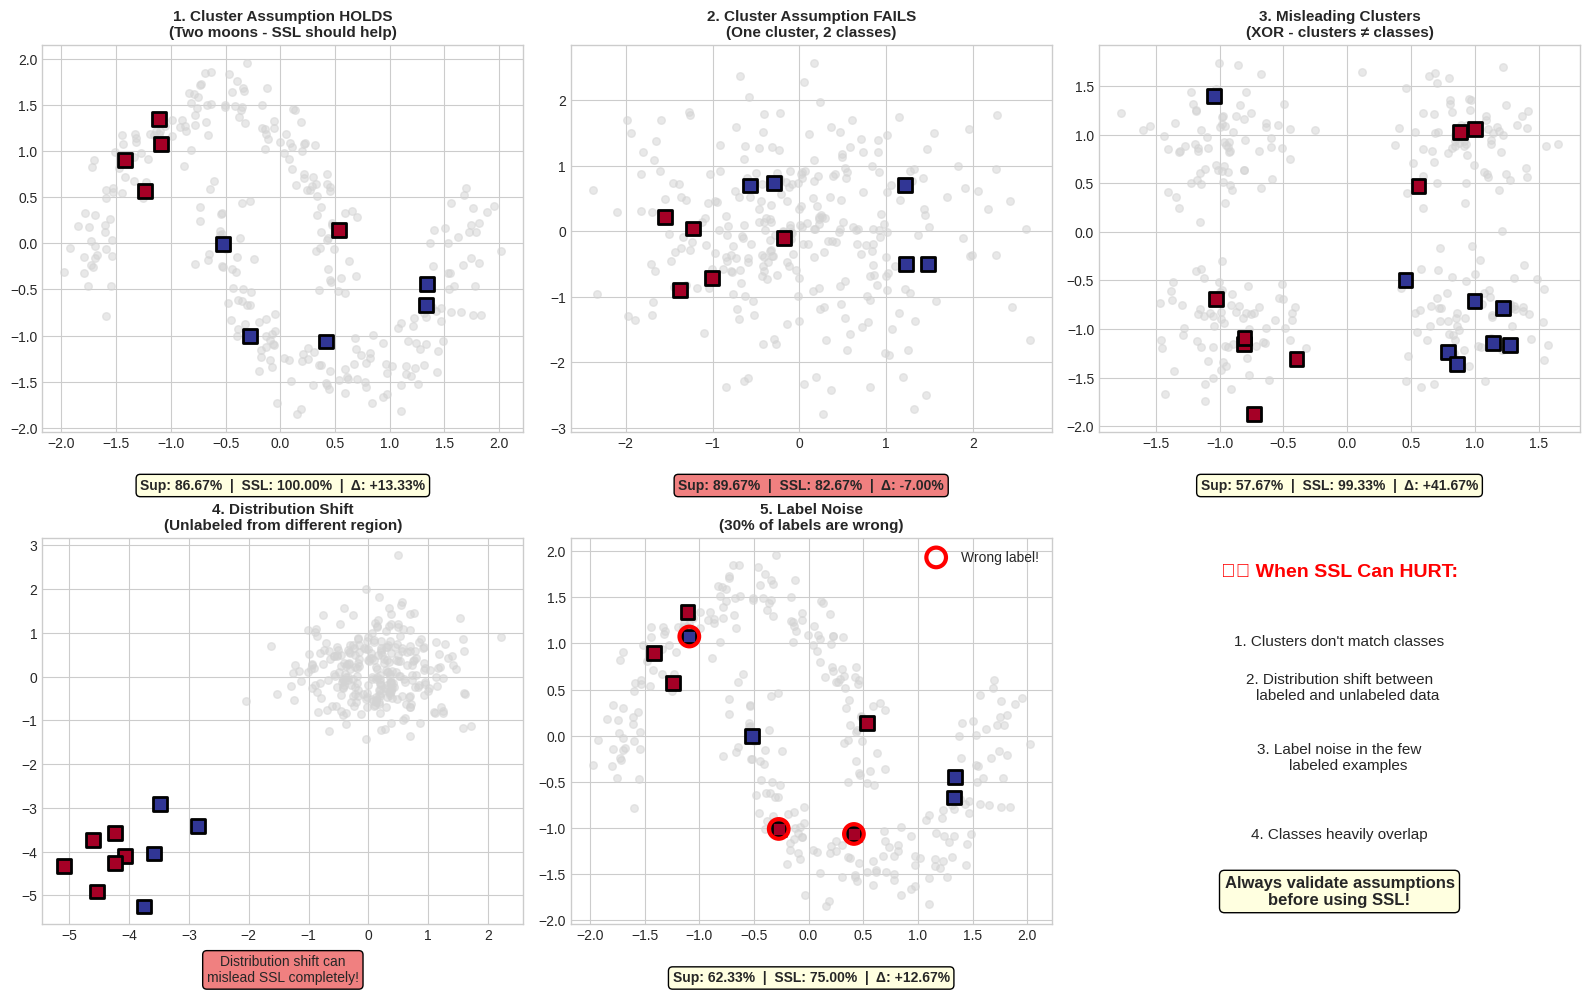


⚠️ KEY WARNING - Negative Transfer in SSL:

SSL can HURT performance when:
1. Cluster structure doesn't correspond to class structure
2. Unlabeled data comes from a different distribution
3. The few labeled examples contain errors
4. Classes overlap significantly

ALWAYS check if assumptions hold before blindly applying SSL!



In [15]:
# ============================================================================
# EXAMPLE 2.1: When SSL Assumptions FAIL - Negative Transfer
# ============================================================================
"""
This example demonstrates scenarios where SSL can actually HURT performance
because the underlying assumptions don't hold.
"""

np.random.seed(42)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

def test_ssl_scenario(X, y, n_labeled, scenario_name, ax):
    """Test supervised vs SSL on a given scenario."""
    # Create labeled/unlabeled split
    labeled_indices = []
    for c in np.unique(y):
        class_idx = np.where(y == c)[0]
        n_per_class = n_labeled // len(np.unique(y))
        selected = np.random.choice(class_idx, min(n_per_class, len(class_idx)), replace=False)
        labeled_indices.extend(selected)
    
    labeled_mask = np.zeros(len(y), dtype=bool)
    labeled_mask[labeled_indices] = True
    
    y_partial = np.full(len(y), -1)
    y_partial[labeled_mask] = y[labeled_mask]
    
    # Supervised
    sup_model = LogisticRegression(random_state=42, max_iter=1000)
    sup_model.fit(X[labeled_mask], y[labeled_mask])
    sup_acc = accuracy_score(y, sup_model.predict(X))
    
    # SSL
    ssl_model = LabelSpreading(kernel='rbf', gamma=20, max_iter=1000)
    ssl_model.fit(X, y_partial)
    ssl_acc = accuracy_score(y, ssl_model.predict(X))
    
    # Visualize
    ax.scatter(X[~labeled_mask, 0], X[~labeled_mask, 1], c='lightgray', s=30, alpha=0.5)
    scatter = ax.scatter(X[labeled_mask, 0], X[labeled_mask, 1], c=y[labeled_mask], 
                        cmap='RdYlBu', s=100, edgecolors='black', linewidth=2, marker='s')
    
    ax.set_title(f'{scenario_name}', fontsize=11, fontweight='bold')
    
    # Add accuracy text
    improvement = ssl_acc - sup_acc
    color = 'green' if improvement > 0.01 else ('red' if improvement < -0.01 else 'gray')
    ax.text(0.5, -0.15, f'Sup: {sup_acc:.2%}  |  SSL: {ssl_acc:.2%}  |  Δ: {improvement:+.2%}',
           transform=ax.transAxes, ha='center', fontsize=10, fontweight='bold',
           bbox=dict(boxstyle='round', facecolor='lightyellow' if improvement > 0 else 'lightcoral'))
    
    return sup_acc, ssl_acc

# Scenario 1: Cluster assumption HOLDS (baseline - should work)
X1, y1 = make_moons(n_samples=300, noise=0.1, random_state=42)
X1 = StandardScaler().fit_transform(X1)
test_ssl_scenario(X1, y1, 10, "1. Cluster Assumption HOLDS\n(Two moons - SSL should help)", axes[0, 0])

# Scenario 2: Cluster assumption FAILS - one cluster, two classes
n = 300
X2 = np.random.randn(n, 2)  # One cluster
y2 = (X2[:, 0] + X2[:, 1] > 0).astype(int)  # Linear boundary through cluster
X2 = StandardScaler().fit_transform(X2)
test_ssl_scenario(X2, y2, 10, "2. Cluster Assumption FAILS\n(One cluster, 2 classes)", axes[0, 1])

# Scenario 3: Wrong cluster structure - XOR problem
X3_1 = np.random.randn(75, 2) * 0.5 + [-1.5, -1.5]
X3_2 = np.random.randn(75, 2) * 0.5 + [1.5, 1.5]
X3_3 = np.random.randn(75, 2) * 0.5 + [-1.5, 1.5]
X3_4 = np.random.randn(75, 2) * 0.5 + [1.5, -1.5]
X3 = np.vstack([X3_1, X3_2, X3_3, X3_4])
y3 = np.array([0]*75 + [0]*75 + [1]*75 + [1]*75)  # XOR pattern
X3 = StandardScaler().fit_transform(X3)
test_ssl_scenario(X3, y3, 16, "3. Misleading Clusters\n(XOR - clusters ≠ classes)", axes[0, 2])

# Scenario 4: Distribution shift - unlabeled from different distribution
np.random.seed(42)
X4_labeled = np.random.randn(10, 2) * 0.5 + [0, 0]
y4_labeled = (X4_labeled[:, 0] > 0).astype(int)
X4_unlabeled = np.random.randn(290, 2) * 0.5 + [3, 3]  # Different location!
y4_unlabeled = (X4_unlabeled[:, 0] > 3).astype(int)  # Different threshold
X4 = np.vstack([X4_labeled, X4_unlabeled])
y4 = np.concatenate([y4_labeled, y4_unlabeled])
X4 = StandardScaler().fit_transform(X4)

labeled_mask_4 = np.zeros(len(y4), dtype=bool)
labeled_mask_4[:10] = True
y4_partial = np.full(len(y4), -1)
y4_partial[:10] = y4_labeled

axes[1, 0].scatter(X4[~labeled_mask_4, 0], X4[~labeled_mask_4, 1], c='lightgray', s=30, alpha=0.5)
axes[1, 0].scatter(X4[:10, 0], X4[:10, 1], c=y4_labeled, cmap='RdYlBu', 
                   s=100, edgecolors='black', linewidth=2, marker='s')
axes[1, 0].set_title("4. Distribution Shift\n(Unlabeled from different region)", fontsize=11, fontweight='bold')

# Test on original distribution only
X4_test = np.random.randn(100, 2) * 0.5 + [0, 0]
X4_test = StandardScaler().fit_transform(X4_test)
y4_test = (X4_test[:, 0] > 0).astype(int)

sup_4 = LogisticRegression(random_state=42, max_iter=1000)
sup_4.fit(X4[:10], y4[:10])
# sup_acc_4 = accuracy_score(y4_test, sup_4.predict(X4_test))

ssl_4 = LabelSpreading(kernel='rbf', gamma=5)
ssl_4.fit(X4, y4_partial)

axes[1, 0].text(0.5, -0.15, 'Distribution shift can\nmislead SSL completely!',
               transform=axes[1, 0].transAxes, ha='center', fontsize=10,
               bbox=dict(boxstyle='round', facecolor='lightcoral'))

# Scenario 5: Noisy labels
X5, y5 = make_moons(n_samples=300, noise=0.1, random_state=42)
X5 = StandardScaler().fit_transform(X5)

# Flip some labels in the labeled set
np.random.seed(42)
labeled_indices_5 = []
for c in [0, 1]:
    class_idx = np.where(y5 == c)[0]
    labeled_indices_5.extend(np.random.choice(class_idx, 5, replace=False))
labeled_mask_5 = np.zeros(len(y5), dtype=bool)
labeled_mask_5[labeled_indices_5] = True

y5_noisy = y5.copy()
# Flip 3 out of 10 labeled points
flip_indices = np.random.choice(labeled_indices_5, 3, replace=False)
y5_noisy[flip_indices] = 1 - y5_noisy[flip_indices]

y5_partial_noisy = np.full(len(y5), -1)
y5_partial_noisy[labeled_mask_5] = y5_noisy[labeled_mask_5]

# Supervised with noisy labels
sup_5 = LogisticRegression(random_state=42, max_iter=1000)
sup_5.fit(X5[labeled_mask_5], y5_noisy[labeled_mask_5])
sup_acc_5 = accuracy_score(y5, sup_5.predict(X5))

# SSL with noisy labels
ssl_5 = LabelSpreading(kernel='rbf', gamma=20)
ssl_5.fit(X5, y5_partial_noisy)
ssl_acc_5 = accuracy_score(y5, ssl_5.predict(X5))

axes[1, 1].scatter(X5[~labeled_mask_5, 0], X5[~labeled_mask_5, 1], c='lightgray', s=30, alpha=0.5)
axes[1, 1].scatter(X5[labeled_mask_5, 0], X5[labeled_mask_5, 1], c=y5_noisy[labeled_mask_5],
                   cmap='RdYlBu', s=100, edgecolors='black', linewidth=2, marker='s')
# Highlight noisy labels
axes[1, 1].scatter(X5[flip_indices, 0], X5[flip_indices, 1], facecolors='none',
                   edgecolors='red', s=200, linewidth=3, label='Wrong label!')
axes[1, 1].set_title("5. Label Noise\n(30% of labels are wrong)", fontsize=11, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].text(0.5, -0.15, f'Sup: {sup_acc_5:.2%}  |  SSL: {ssl_acc_5:.2%}  |  Δ: {ssl_acc_5-sup_acc_5:+.2%}',
               transform=axes[1, 1].transAxes, ha='center', fontsize=10, fontweight='bold',
               bbox=dict(boxstyle='round', facecolor='lightcoral' if ssl_acc_5 < sup_acc_5 else 'lightyellow'))

# Scenario 6: Summary visualization
ax6 = axes[1, 2]
ax6.text(0.5, 0.9, "⚠️ When SSL Can HURT:", fontsize=14, fontweight='bold',
        ha='center', transform=ax6.transAxes, color='red')
ax6.text(0.5, 0.72, "1. Clusters don't match classes", fontsize=11,
        ha='center', transform=ax6.transAxes)
ax6.text(0.5, 0.58, "2. Distribution shift between\n    labeled and unlabeled data", fontsize=11,
        ha='center', transform=ax6.transAxes)
ax6.text(0.5, 0.40, "3. Label noise in the few\n    labeled examples", fontsize=11,
        ha='center', transform=ax6.transAxes)
ax6.text(0.5, 0.22, "4. Classes heavily overlap", fontsize=11,
        ha='center', transform=ax6.transAxes)

ax6.text(0.5, 0.05, "Always validate assumptions\nbefore using SSL!", fontsize=12,
        ha='center', transform=ax6.transAxes, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightyellow'))
ax6.axis('off')

plt.tight_layout()
plt.savefig('ssl_failures.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("⚠️ KEY WARNING - Negative Transfer in SSL:")
print("="*70)
print("""
SSL can HURT performance when:
1. Cluster structure doesn't correspond to class structure
2. Unlabeled data comes from a different distribution
3. The few labeled examples contain errors
4. Classes overlap significantly

ALWAYS check if assumptions hold before blindly applying SSL!
""")

---

## 2.7 Chapter 2 Exercises

### 📝 Conceptual Questions

**Exercise 2.1** (Easy): Explain the difference between the smoothness assumption and the cluster assumption. Can a dataset satisfy one but not the other?

**Exercise 2.2** (Medium): A colleague suggests using SSL for a spam classification task where labeled emails come from 2023 but unlabeled emails come from 2020. What concerns should you raise?

**Exercise 2.3** (Challenging): Consider a face recognition system where the training data contains faces of students, but you want to extend it to faculty members. The unlabeled data contains both students and faculty.

- Which SSL assumptions might be violated?
- How could you modify your approach to handle this situation?

### 💻 Coding Exercises


In [16]:
# ============================================================================
# EXERCISE 2.4: Testing SSL Assumptions Empirically
# ============================================================================
"""
YOUR TASK:
Create a function that tests whether the cluster assumption holds for a dataset.

The function should:
1. Cluster the data using K-means (unsupervised)
2. Compare the clusters with the true labels
3. Return a score indicating how well clusters match classes

If clusters match classes well → cluster assumption likely holds → SSL should help
If clusters don't match classes → cluster assumption violated → SSL might hurt

Hint: Use metrics like Adjusted Rand Index (ARI) or Normalized Mutual Information (NMI)
"""

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

def test_cluster_assumption(X, y_true, n_clusters=None):
    """
    Test if the cluster assumption holds for a dataset.
    
    Parameters:
    -----------
    X : feature array
    y_true : true labels
    n_clusters : number of clusters (default: number of classes)
    
    Returns:
    --------
    score : dict with ARI and NMI scores
    interpretation : string explaining if SSL is likely to help
    """
    if n_clusters is None:
        n_clusters = len(np.unique(y_true))
    
    # TODO: Cluster the data using KMeans
    # YOUR CODE HERE:
    # cluster_labels = ...
    
    # TODO: Compute ARI and NMI
    # YOUR CODE HERE:
    # ari = ...
    # nmi = ...
    
    # TODO: Interpret the results
    # ARI > 0.5: Good cluster-class correspondence
    # ARI 0.2-0.5: Moderate correspondence
    # ARI < 0.2: Poor correspondence - SSL might not help
    
    pass

# Test on different datasets
# test_cluster_assumption(X1, y1)  # Two moons - should show good correspondence
# test_cluster_assumption(X2, y2)  # One cluster - should show poor correspondence

print("💡 Complete the exercise above by implementing test_cluster_assumption()")

💡 Complete the exercise above by implementing test_cluster_assumption()


Testing Cluster Assumption on Different Datasets

🌙 Dataset: Two Moons

📊 Cluster Assumption Test Results:
   Adjusted Rand Index (ARI): 0.479
   Normalized Mutual Info (NMI): 0.382

   ⚠️ MODERATE: Some cluster-class correspondence. SSL might help.

⭕ Dataset: One Cluster, Two Classes

📊 Cluster Assumption Test Results:
   Adjusted Rand Index (ARI): 0.234
   Normalized Mutual Info (NMI): 0.181

   ⚠️ MODERATE: Some cluster-class correspondence. SSL might help.

🔵 Dataset: Well-Separated Blobs

📊 Cluster Assumption Test Results:
   Adjusted Rand Index (ARI): 1.000
   Normalized Mutual Info (NMI): 1.000

   ✅ GOOD: Clusters match classes well. SSL is likely to help!


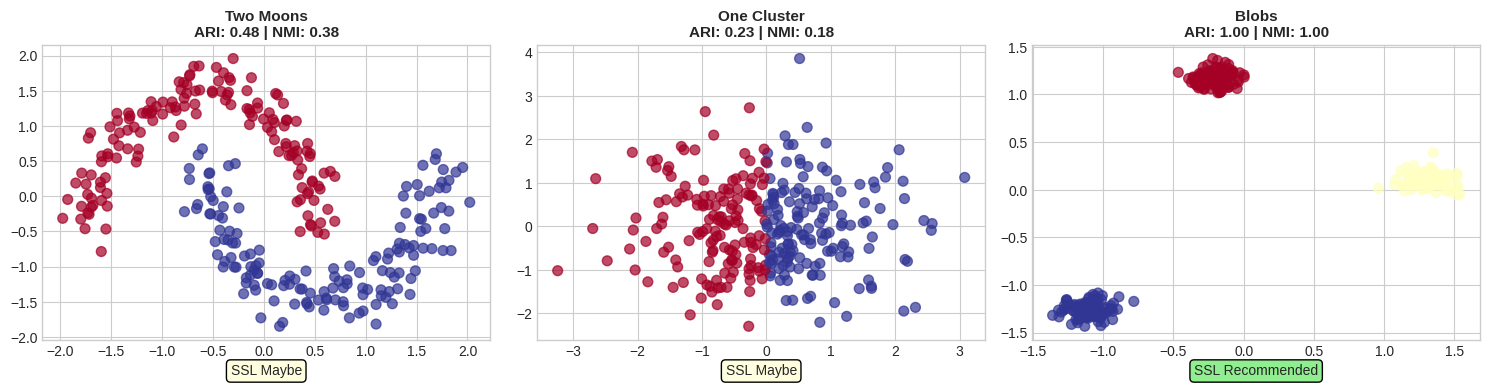

In [17]:
# ============================================================================
# EXERCISE 2.4: SOLUTION
# ============================================================================

def test_cluster_assumption_solution(X, y_true, n_clusters=None, verbose=True):
    """
    Test if the cluster assumption holds for a dataset.
    """
    if n_clusters is None:
        n_clusters = len(np.unique(y_true))
    
    # Cluster the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    # Compute metrics
    ari = adjusted_rand_score(y_true, cluster_labels)
    nmi = normalized_mutual_info_score(y_true, cluster_labels)
    
    # Interpretation
    if ari > 0.5:
        interpretation = "✅ GOOD: Clusters match classes well. SSL is likely to help!"
    elif ari > 0.2:
        interpretation = "⚠️ MODERATE: Some cluster-class correspondence. SSL might help."
    else:
        interpretation = "❌ POOR: Clusters don't match classes. SSL might NOT help or could hurt."
    
    if verbose:
        print(f"\n📊 Cluster Assumption Test Results:")
        print(f"   Adjusted Rand Index (ARI): {ari:.3f}")
        print(f"   Normalized Mutual Info (NMI): {nmi:.3f}")
        print(f"\n   {interpretation}")
    
    return {'ari': ari, 'nmi': nmi, 'interpretation': interpretation}

# Test on our scenarios
print("="*70)
print("Testing Cluster Assumption on Different Datasets")
print("="*70)

# Two moons (cluster assumption holds)
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)
X_moons = StandardScaler().fit_transform(X_moons)
print("\n🌙 Dataset: Two Moons")
result_moons = test_cluster_assumption_solution(X_moons, y_moons)

# One cluster, two classes (cluster assumption fails)
X_one_cluster = np.random.randn(300, 2)
y_one_cluster = (X_one_cluster[:, 0] > 0).astype(int)
print("\n⭕ Dataset: One Cluster, Two Classes")
result_one = test_cluster_assumption_solution(X_one_cluster, y_one_cluster)

# Well-separated blobs (cluster assumption holds strongly)
X_blobs, y_blobs = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=42)
X_blobs = StandardScaler().fit_transform(X_blobs)
print("\n🔵 Dataset: Well-Separated Blobs")
result_blobs = test_cluster_assumption_solution(X_blobs, y_blobs, n_clusters=3)

# Visualize the comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

datasets = [
    (X_moons, y_moons, "Two Moons", result_moons),
    (X_one_cluster, y_one_cluster, "One Cluster", result_one),
    (X_blobs, y_blobs, "Blobs", result_blobs)
]

for ax, (X, y, name, result) in zip(axes, datasets):
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', s=50, alpha=0.7)
    ax.set_title(f'{name}\nARI: {result["ari"]:.2f} | NMI: {result["nmi"]:.2f}', fontsize=11, fontweight='bold')
    
    # Color code the box based on ARI
    color = 'lightgreen' if result['ari'] > 0.5 else ('lightyellow' if result['ari'] > 0.2 else 'lightcoral')
    ssl_rec = 'SSL Recommended' if result['ari'] > 0.5 else ('SSL Maybe' if result['ari'] > 0.2 else 'SSL Risky')
    ax.text(0.5, -0.12, ssl_rec, transform=ax.transAxes, ha='center', fontsize=10,
           bbox=dict(boxstyle='round', facecolor=color))

plt.tight_layout()
plt.show()

---

## 📚 Chapter 2 Summary

### Key Concepts Learned:

1. **Three Core SSL Assumptions**:
   - **Smoothness**: Nearby points have similar labels
   - **Cluster**: Decision boundaries should be in low-density regions
   - **Manifold**: Data lies on a low-dimensional manifold

2. **When Assumptions Hold**: SSL can significantly improve performance over supervised learning

3. **When Assumptions Fail**: SSL can hurt performance (negative transfer)
   - Distribution shift
   - Clusters don't match classes
   - Label noise

4. **Practical Guideline**: Always test assumptions before applying SSL

### What's Next:
In Chapter 3, we'll learn **Self-Training** - the simplest and often surprisingly effective SSL technique that iteratively expands the training set using the model's own predictions.

---

---


# 📖 CHAPTER 3: Self-Training and Pseudo-Labeling

---

## 3.1 Introduction to Self-Training

### The Core Idea

**Self-training** is one of the oldest and simplest semi-supervised learning techniques. The idea is elegantly simple:

> Train a model on labeled data, use it to label some unlabeled data, then retrain on the expanded dataset.

This creates a **bootstrapping** process where the model teaches itself.

### The Algorithm

```
Algorithm: Self-Training
────────────────────────────────────────────────────────
Input: L (labeled data), U (unlabeled data), base classifier
Output: Final classifier

1. Train classifier on L
2. REPEAT until convergence:
   a. Use classifier to predict labels for U
   b. Select high-confidence predictions
   c. Add selected samples with pseudo-labels to L
   d. Remove selected samples from U
   e. Retrain classifier on expanded L
3. Return final classifier
────────────────────────────────────────────────────────
```

### Why It Works (Intuition)

Self-training exploits the **smoothness assumption**:

- High-confidence predictions are likely to be correct
- These are typically in regions where the model is certain
- Adding them reinforces the model's understanding of the data structure
- This gradually extends the decision boundary into unlabeled regions

### The Key Question: What is "High Confidence"?

This is the critical design choice in self-training:

- **Too strict**: Few samples added, slow learning
- **Too loose**: Errors propagate, model degrades

---

## 3.2 Pseudo-Labeling in Detail

### Definition

**Pseudo-labels** are the predicted labels assigned to unlabeled data by the model. The term was popularized in the deep learning context by Lee (2013).

### Mathematical Formulation

For a classifier $f_\theta$ with parameters $\theta$, and an unlabeled sample $x_u$:

$$\tilde{y}_u = \arg\max_c f_\theta(x_u)_c$$

The pseudo-label $\tilde{y}_u$ is simply the class with the highest predicted probability.

### The Loss Function

In pseudo-labeling, we train on both labeled and pseudo-labeled data:

$$\mathcal{L} = \mathcal{L}_{supervised} + \alpha(t) \cdot \mathcal{L}_{pseudo}$$

Where:

- $\mathcal{L}_{supervised}$ = Cross-entropy on labeled data
- $\mathcal{L}_{pseudo}$ = Cross-entropy on pseudo-labeled data
- $\alpha(t)$ = Time-varying weight (often starts small and increases)

### Confidence Thresholding

To filter unreliable pseudo-labels:

$$\text{Use pseudo-label if: } \max_c f_\theta(x_u)_c \geq \tau$$

Where $\tau$ is the confidence threshold (typically 0.7-0.95).


In [18]:
# ============================================================================
# IMPLEMENTATION 3.1: Self-Training from Scratch
# ============================================================================
"""
Let's implement self-training from scratch to deeply understand how it works.
"""

class SelfTrainingFromScratch:
    """
    A self-training classifier implemented from scratch.
    
    Parameters:
    -----------
    base_estimator : classifier
        The supervised classifier to use as base (must have predict_proba)
    threshold : float
        Confidence threshold for adding pseudo-labels
    max_iter : int
        Maximum number of self-training iterations
    verbose : bool
        Whether to print progress information
    """
    
    def __init__(self, base_estimator, threshold=0.75, max_iter=10, verbose=True):
        self.base_estimator = base_estimator
        self.threshold = threshold
        self.max_iter = max_iter
        self.verbose = verbose
        self.history = []
        
    def fit(self, X, y):
        """
        Fit the self-training classifier.
        
        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Training data
        y : array-like of shape (n_samples,)
            Target values (-1 for unlabeled)
        """
        # Separate labeled and unlabeled data
        labeled_mask = y != -1
        unlabeled_mask = ~labeled_mask
        
        X_labeled = X[labeled_mask].copy()
        y_labeled = y[labeled_mask].copy()
        X_unlabeled = X[unlabeled_mask].copy()
        
        if self.verbose:
            print(f"{'='*60}")
            print(f"Self-Training Started")
            print(f"{'='*60}")
            print(f"Initial labeled samples: {len(y_labeled)}")
            print(f"Unlabeled samples: {len(X_unlabeled)}")
            print(f"Confidence threshold: {self.threshold}")
            print(f"{'='*60}\n")
        
        iteration = 0
        
        while iteration < self.max_iter and len(X_unlabeled) > 0:
            # Step 1: Train on current labeled set
            from sklearn.base import clone
            self.estimator_ = clone(self.base_estimator)
            self.estimator_.fit(X_labeled, y_labeled)
            
            # Step 2: Predict on unlabeled data
            proba = self.estimator_.predict_proba(X_unlabeled)
            max_proba = np.max(proba, axis=1)
            predicted_labels = np.argmax(proba, axis=1)
            
            # Map to original classes
            predicted_labels = self.estimator_.classes_[predicted_labels]
            
            # Step 3: Select high-confidence predictions
            confident_mask = max_proba >= self.threshold
            n_confident = np.sum(confident_mask)
            
            if n_confident == 0:
                if self.verbose:
                    print(f"Iteration {iteration + 1}: No confident predictions. Stopping.")
                break
            
            # Step 4: Add confident samples to labeled set
            X_labeled = np.vstack([X_labeled, X_unlabeled[confident_mask]])
            y_labeled = np.concatenate([y_labeled, predicted_labels[confident_mask]])
            
            # Step 5: Remove from unlabeled set
            X_unlabeled = X_unlabeled[~confident_mask]
            
            # Record history
            self.history.append({
                'iteration': iteration + 1,
                'added': n_confident,
                'remaining_unlabeled': len(X_unlabeled),
                'total_labeled': len(y_labeled),
                'avg_confidence': np.mean(max_proba[confident_mask])
            })
            
            if self.verbose:
                print(f"Iteration {iteration + 1}:")
                print(f"  → Added {n_confident} pseudo-labeled samples")
                print(f"  → Avg confidence: {np.mean(max_proba[confident_mask]):.3f}")
                print(f"  → Total labeled now: {len(y_labeled)}")
                print(f"  → Remaining unlabeled: {len(X_unlabeled)}\n")
            
            iteration += 1
        
        # Final training on all labeled data (including pseudo-labels)
        from sklearn.base import clone
        self.estimator_ = clone(self.base_estimator)
        self.estimator_.fit(X_labeled, y_labeled)
        
        self.n_iter_ = iteration
        self.X_labeled_final_ = X_labeled
        self.y_labeled_final_ = y_labeled
        
        if self.verbose:
            print(f"\n{'='*60}")
            print(f"Self-Training Complete!")
            print(f"Total iterations: {iteration}")
            print(f"Final labeled set size: {len(y_labeled)}")
            print(f"{'='*60}")
        
        return self
    
    def predict(self, X):
        """Predict class labels for samples in X."""
        return self.estimator_.predict(X)
    
    def predict_proba(self, X):
        """Predict class probabilities for samples in X."""
        return self.estimator_.predict_proba(X)
    
    def score(self, X, y):
        """Return the accuracy on the given test data and labels."""
        return accuracy_score(y, self.predict(X))

print("✅ SelfTrainingFromScratch class defined!")

✅ SelfTrainingFromScratch class defined!


In [19]:
# ============================================================================
# EXAMPLE 3.1: Self-Training in Action
# ============================================================================
"""
Let's see self-training working on a real example with visualization.
"""

# Create dataset
np.random.seed(42)
X, y_true = make_moons(n_samples=500, noise=0.1, random_state=42)
X = StandardScaler().fit_transform(X)

# Create SSL scenario: only 20 labeled samples
n_labeled = 20
labeled_indices = []
for c in [0, 1]:
    class_idx = np.where(y_true == c)[0]
    labeled_indices.extend(np.random.choice(class_idx, 10, replace=False))
labeled_mask = np.zeros(len(y_true), dtype=bool)
labeled_mask[labeled_indices] = True

y_partial = np.full(len(y_true), -1)
y_partial[labeled_mask] = y_true[labeled_mask]

# Train self-training classifier
base_clf = LogisticRegression(random_state=42, max_iter=1000)
self_trainer = SelfTrainingFromScratch(
    base_estimator=base_clf,
    threshold=0.8,
    max_iter=10,
    verbose=True
)

self_trainer.fit(X, y_partial)

# Evaluate
y_pred = self_trainer.predict(X)
accuracy = accuracy_score(y_true, y_pred)
print(f"\n🎯 Final Accuracy: {accuracy:.2%}")

Self-Training Started
Initial labeled samples: 20
Unlabeled samples: 480
Confidence threshold: 0.8

Iteration 1:
  → Added 292 pseudo-labeled samples
  → Avg confidence: 0.893
  → Total labeled now: 312
  → Remaining unlabeled: 188

Iteration 2:
  → Added 106 pseudo-labeled samples
  → Avg confidence: 0.895
  → Total labeled now: 418
  → Remaining unlabeled: 82

Iteration 3:
  → Added 21 pseudo-labeled samples
  → Avg confidence: 0.839
  → Total labeled now: 439
  → Remaining unlabeled: 61

Iteration 4:
  → Added 1 pseudo-labeled samples
  → Avg confidence: 0.831
  → Total labeled now: 440
  → Remaining unlabeled: 60

Iteration 5:
  → Added 1 pseudo-labeled samples
  → Avg confidence: 0.811
  → Total labeled now: 441
  → Remaining unlabeled: 59

Iteration 6:
  → Added 2 pseudo-labeled samples
  → Avg confidence: 0.807
  → Total labeled now: 443
  → Remaining unlabeled: 57

Iteration 7: No confident predictions. Stopping.

Self-Training Complete!
Total iterations: 6
Final labeled set si

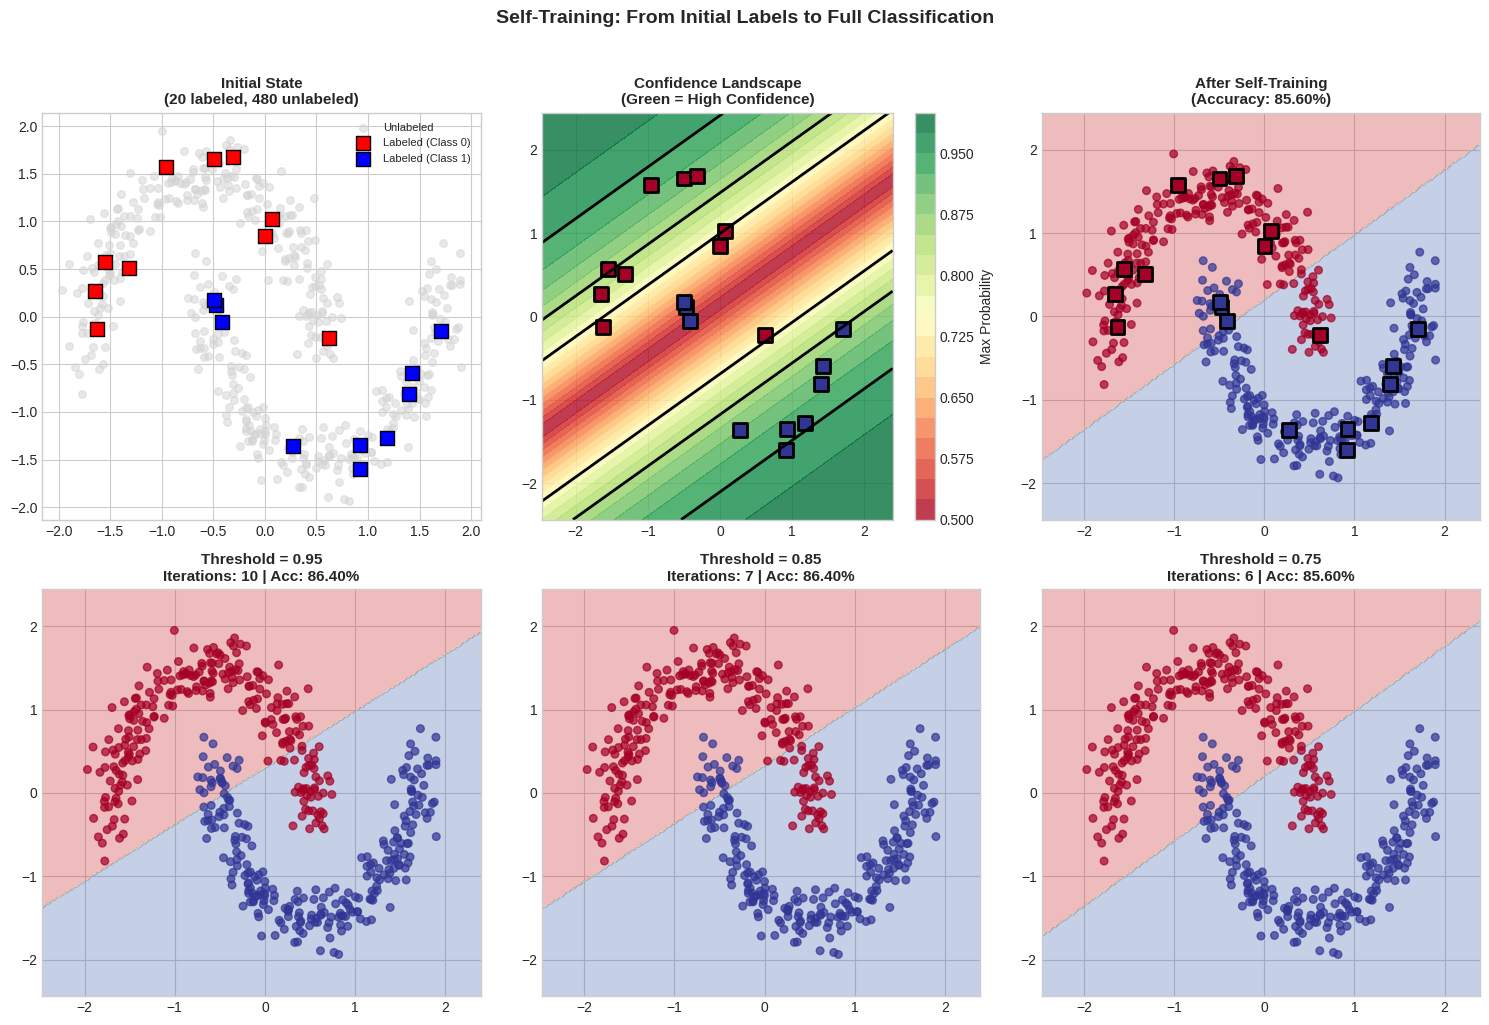


📝 Key Observations:
• Green areas in confidence map → model is confident → pseudo-labels added first
• Higher threshold → fewer samples added per iteration → more conservative
• Lower threshold → more samples added → faster but riskier


In [20]:
# ============================================================================
# VISUALIZATION 3.1: Self-Training Iteration Process
# ============================================================================
"""
Visualize how self-training progressively labels the data.
"""

def visualize_self_training_process(X, y_true, y_partial, thresholds=[0.95, 0.85, 0.75]):
    """
    Visualize the self-training process with different confidence thresholds.
    """
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # Row 1: Initial state and iterations
    # Panel 1: Initial labeled data
    ax1 = axes[0, 0]
    unlabeled_mask_init = y_partial == -1
    ax1.scatter(X[unlabeled_mask_init, 0], X[unlabeled_mask_init, 1], 
                c='lightgray', s=30, alpha=0.5, label='Unlabeled')
    ax1.scatter(X[~unlabeled_mask_init & (y_true == 0), 0], 
                X[~unlabeled_mask_init & (y_true == 0), 1],
                c='red', s=100, marker='s', edgecolors='black', label='Labeled (Class 0)')
    ax1.scatter(X[~unlabeled_mask_init & (y_true == 1), 0], 
                X[~unlabeled_mask_init & (y_true == 1), 1],
                c='blue', s=100, marker='s', edgecolors='black', label='Labeled (Class 1)')
    ax1.set_title('Initial State\n(20 labeled, 480 unlabeled)', fontsize=11, fontweight='bold')
    ax1.legend(loc='upper right', fontsize=8)
    
    # Train initial model
    base_clf = LogisticRegression(random_state=42, max_iter=1000)
    base_clf.fit(X[~unlabeled_mask_init], y_partial[~unlabeled_mask_init])
    
    # Panel 2: Confidence landscape
    ax2 = axes[0, 1]
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    proba = base_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    confidence = np.max(proba, axis=1).reshape(xx.shape)
    
    contour = ax2.contourf(xx, yy, confidence, levels=20, cmap='RdYlGn', alpha=0.8)
    ax2.contour(xx, yy, confidence, levels=[0.75, 0.85, 0.95], colors='black', linewidths=2)
    ax2.scatter(X[~unlabeled_mask_init, 0], X[~unlabeled_mask_init, 1],
                c=y_partial[~unlabeled_mask_init], cmap='RdYlBu', s=100, 
                edgecolors='black', linewidth=2, marker='s')
    ax2.set_title('Confidence Landscape\n(Green = High Confidence)', fontsize=11, fontweight='bold')
    plt.colorbar(contour, ax=ax2, label='Max Probability')
    
    # Panel 3: After self-training
    ax3 = axes[0, 2]
    st = SelfTrainingClassifier(
        LogisticRegression(random_state=42, max_iter=1000),
        criterion='threshold',
        threshold=0.75
    )
    st.fit(X, y_partial.copy())
    
    # Plot final decision boundary
    Z = st.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax3.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    ax3.scatter(X[:, 0], X[:, 1], c=y_true, cmap='RdYlBu', s=30, alpha=0.7)
    ax3.scatter(X[~unlabeled_mask_init, 0], X[~unlabeled_mask_init, 1],
                c=y_partial[~unlabeled_mask_init], cmap='RdYlBu', s=100, 
                edgecolors='black', linewidth=2, marker='s')
    ax3.set_title(f'After Self-Training\n(Accuracy: {accuracy_score(y_true, st.predict(X)):.2%})', 
                 fontsize=11, fontweight='bold')
    
    # Row 2: Compare different thresholds
    for idx, thresh in enumerate(thresholds):
        ax = axes[1, idx]
        
        st_thresh = SelfTrainingClassifier(
            LogisticRegression(random_state=42, max_iter=1000),
            criterion='threshold',
            threshold=thresh
        )
        st_thresh.fit(X, y_partial.copy())
        
        # Decision boundary
        Z = st_thresh.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
        ax.scatter(X[:, 0], X[:, 1], c=y_true, cmap='RdYlBu', s=30, alpha=0.7)
        
        acc = accuracy_score(y_true, st_thresh.predict(X))
        ax.set_title(f'Threshold = {thresh}\nIterations: {st_thresh.n_iter_} | Acc: {acc:.2%}', 
                    fontsize=11, fontweight='bold')
    
    plt.suptitle('Self-Training: From Initial Labels to Full Classification', 
                fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('self_training_process.png', dpi=150, bbox_inches='tight')
    plt.show()

# Run visualization
visualize_self_training_process(X, y_true, y_partial)

print("\n📝 Key Observations:")
print("• Green areas in confidence map → model is confident → pseudo-labels added first")
print("• Higher threshold → fewer samples added per iteration → more conservative")
print("• Lower threshold → more samples added → faster but riskier")

---

## 3.3 Confirmation Bias: The Dark Side of Self-Training

### The Problem

Self-training has a fundamental weakness: **confirmation bias**.

> If the initial model makes mistakes, these mistakes can be amplified through pseudo-labeling, leading to progressively worse performance.

### How Confirmation Bias Happens

```
1. Initial model makes errors in some region
   ↓
2. High-confidence (but wrong) predictions become pseudo-labels
   ↓
3. Model retrains on wrong labels, reinforcing errors
   ↓
4. More wrong predictions with even higher confidence
   ↓
5. Error propagates and amplifies!
```

### Visual Example of Confirmation Bias

Imagine a boundary region where the model is uncertain:

- True boundary: Class A on left, Class B on right
- Initial error: Model thinks boundary is shifted to the left
- Effect: Some Class A points get pseudo-labeled as B
- Next iteration: Model becomes MORE confident that boundary is wrong
- Result: Error grows instead of shrinking

### Mitigation Strategies

1. **High confidence thresholds**: Only add very confident predictions
2. **Curriculum learning**: Start with easy samples, gradually add harder ones
3. **Disagreement-based methods**: Use multiple models (Co-training)
4. **Uncertainty estimation**: Better confidence calibration
5. **Progressive thresholds**: Start strict, gradually relax


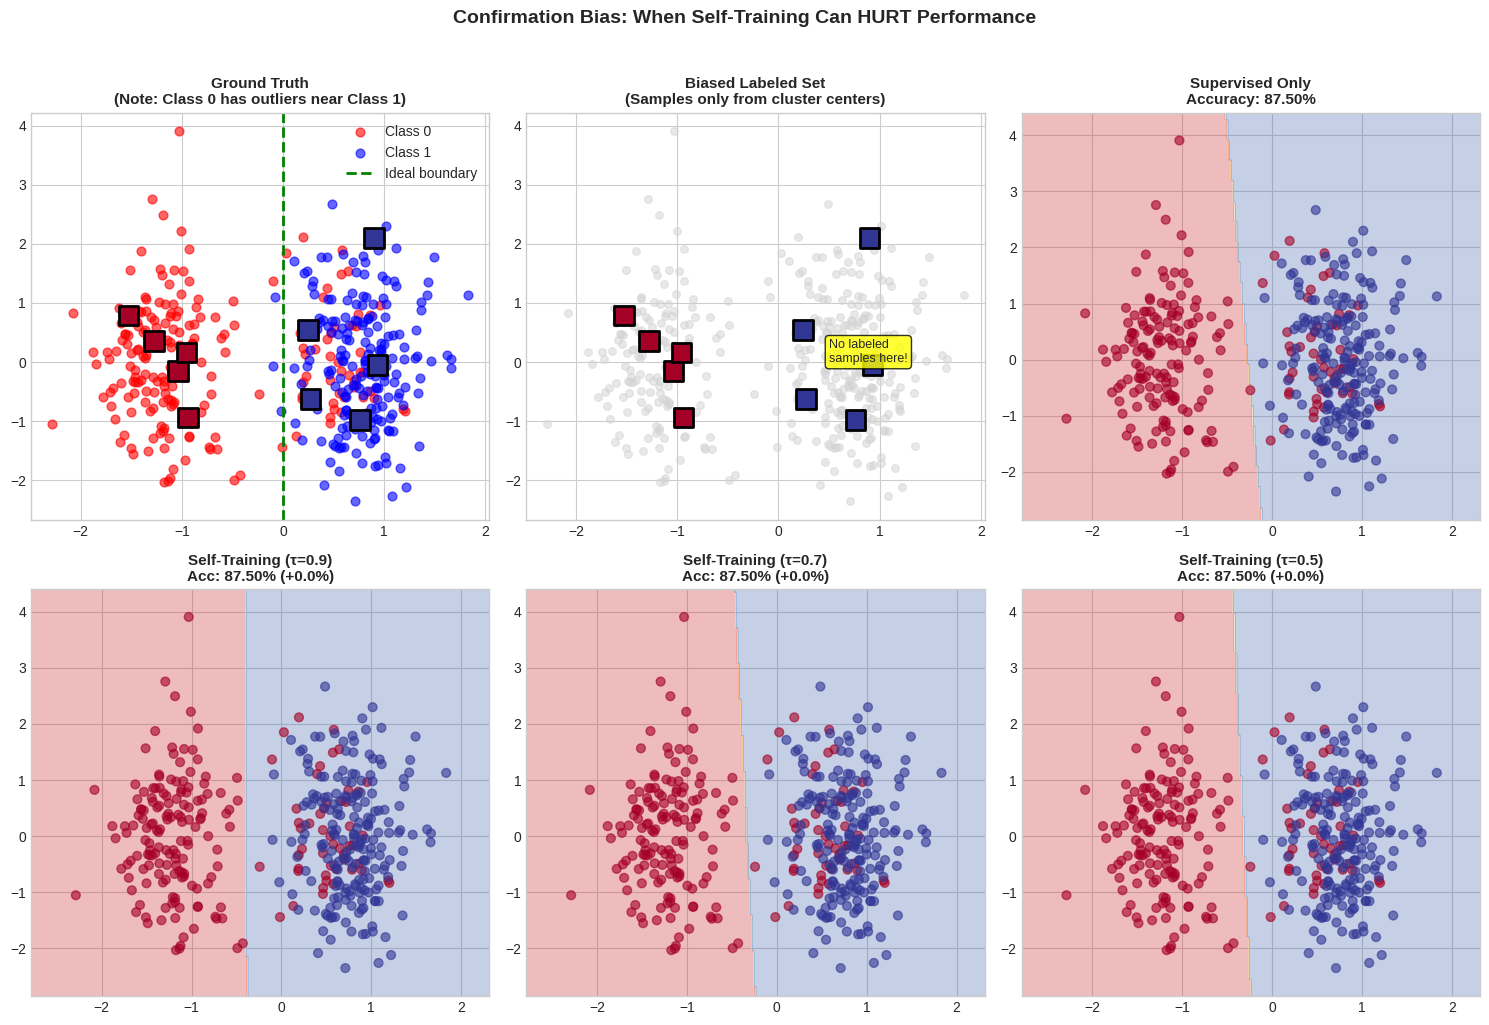


⚠️ CONFIRMATION BIAS WARNING:

In this example:
• The outliers from Class 0 are in the 'uncertainty zone'
• With low threshold, these get mislabeled as Class 1
• The error propagates, making the final model WORSE than supervised-only!
• Higher threshold (0.9) is more conservative and avoids this trap

Key lesson: Self-training is NOT always better! Check your assumptions.



In [21]:
# ============================================================================
# EXAMPLE 3.2: Demonstrating Confirmation Bias
# ============================================================================
"""
Let's create a scenario where confirmation bias causes self-training to fail.
"""

np.random.seed(42)

# Create a challenging dataset where initial boundary might be wrong
n = 400

# Class 0: left cluster + some outliers on right
X0_main = np.random.randn(150, 2) * 0.5 + [-1.5, 0]
X0_outlier = np.random.randn(50, 2) * 0.5 + [1.0, 0]  # Outliers near class 1
X0 = np.vstack([X0_main, X0_outlier])
y0 = np.zeros(200, dtype=int)

# Class 1: right cluster
X1 = np.random.randn(200, 2) * 0.5 + [1.5, 0]
y1 = np.ones(200, dtype=int)

X_bias = np.vstack([X0, X1])
y_bias = np.concatenate([y0, y1])

# Standardize
X_bias = StandardScaler().fit_transform(X_bias)

# Create biased labeled set: only samples from "main" clusters, none from overlap region
labeled_indices_biased = []
# Class 0: only from left main cluster (indices 0-149)
labeled_indices_biased.extend([0, 20, 40, 60, 80])  # 5 from left
# Class 1: only from right cluster (indices 200-399)
labeled_indices_biased.extend([200, 220, 240, 260, 280])  # 5 from right

labeled_mask_biased = np.zeros(len(y_bias), dtype=bool)
labeled_mask_biased[labeled_indices_biased] = True

y_partial_biased = np.full(len(y_bias), -1)
y_partial_biased[labeled_mask_biased] = y_bias[labeled_mask_biased]

# Compare supervised vs self-training
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Panel 1: True labels
ax1 = axes[0, 0]
ax1.scatter(X_bias[y_bias == 0, 0], X_bias[y_bias == 0, 1], c='red', s=40, alpha=0.6, label='Class 0')
ax1.scatter(X_bias[y_bias == 1, 0], X_bias[y_bias == 1, 1], c='blue', s=40, alpha=0.6, label='Class 1')
ax1.axvline(x=0, color='green', linestyle='--', linewidth=2, label='Ideal boundary')
ax1.scatter(X_bias[labeled_mask_biased, 0], X_bias[labeled_mask_biased, 1],
            c=y_bias[labeled_mask_biased], cmap='RdYlBu', s=200, marker='s',
            edgecolors='black', linewidth=2)
ax1.set_title('Ground Truth\n(Note: Class 0 has outliers near Class 1)', fontsize=11, fontweight='bold')
ax1.legend(loc='upper right')

# Panel 2: Initial labeled data (biased selection)
ax2 = axes[0, 1]
ax2.scatter(X_bias[:, 0], X_bias[:, 1], c='lightgray', s=30, alpha=0.5)
ax2.scatter(X_bias[labeled_mask_biased, 0], X_bias[labeled_mask_biased, 1],
            c=y_bias[labeled_mask_biased], cmap='RdYlBu', s=200, marker='s',
            edgecolors='black', linewidth=2)
ax2.set_title('Biased Labeled Set\n(Samples only from cluster centers)', fontsize=11, fontweight='bold')
ax2.annotate('No labeled\nsamples here!', xy=(0.5, 0), fontsize=9,
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

# Panel 3: Supervised baseline (only labeled data)
ax3 = axes[0, 2]
sup_biased = LogisticRegression(random_state=42, max_iter=1000)
sup_biased.fit(X_bias[labeled_mask_biased], y_bias[labeled_mask_biased])

h = 0.02
x_min, x_max = X_bias[:, 0].min() - 0.5, X_bias[:, 0].max() + 0.5
y_min, y_max = X_bias[:, 1].min() - 0.5, X_bias[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z_sup = sup_biased.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax3.contourf(xx, yy, Z_sup, alpha=0.3, cmap='RdYlBu')
ax3.scatter(X_bias[:, 0], X_bias[:, 1], c=y_bias, cmap='RdYlBu', s=40, alpha=0.6)
sup_acc = accuracy_score(y_bias, sup_biased.predict(X_bias))
ax3.set_title(f'Supervised Only\nAccuracy: {sup_acc:.2%}', fontsize=11, fontweight='bold')

# Row 2: Self-training with different thresholds
for idx, thresh in enumerate([0.9, 0.7, 0.5]):
    ax = axes[1, idx]
    
    st_test = SelfTrainingClassifier(
        LogisticRegression(random_state=42, max_iter=1000),
        criterion='threshold',
        threshold=thresh
    )
    st_test.fit(X_bias, y_partial_biased.copy())
    
    Z_st = st_test.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z_st, alpha=0.3, cmap='RdYlBu')
    ax.scatter(X_bias[:, 0], X_bias[:, 1], c=y_bias, cmap='RdYlBu', s=40, alpha=0.6)
    
    st_acc = accuracy_score(y_bias, st_test.predict(X_bias))
    improvement = st_acc - sup_acc
    
    color = 'lightgreen' if improvement > 0.02 else ('lightcoral' if improvement < -0.02 else 'lightyellow')
    ax.set_title(f'Self-Training (τ={thresh})\nAcc: {st_acc:.2%} ({improvement:+.1%})', 
                fontsize=11, fontweight='bold')
    
    if st_acc < sup_acc:
        ax.annotate('⚠️ HURT\nby SSL!', xy=(0.8, 0.9), xycoords='axes fraction',
                   fontsize=10, fontweight='bold', color='red',
                   bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

plt.suptitle('Confirmation Bias: When Self-Training Can HURT Performance', 
            fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('confirmation_bias.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("⚠️ CONFIRMATION BIAS WARNING:")
print("="*70)
print("""
In this example:
• The outliers from Class 0 are in the 'uncertainty zone'
• With low threshold, these get mislabeled as Class 1
• The error propagates, making the final model WORSE than supervised-only!
• Higher threshold (0.9) is more conservative and avoids this trap

Key lesson: Self-training is NOT always better! Check your assumptions.
""")

---

## 3.4 Scikit-learn's SelfTrainingClassifier

Scikit-learn provides a production-ready implementation of self-training. Let's explore its features and parameters.

### Key Parameters

| Parameter        | Description                                               | Typical Values              |
| ---------------- | --------------------------------------------------------- | --------------------------- |
| `base_estimator` | The supervised classifier                                 | Must have `predict_proba`   |
| `criterion`      | How to select pseudo-labels                               | `'threshold'` or `'k_best'` |
| `threshold`      | Confidence threshold (if criterion='threshold')           | 0.75 - 0.95                 |
| `k_best`         | Number of best predictions to add (if criterion='k_best') | 10 - 100                    |
| `max_iter`       | Maximum iterations                                        | 10 - 100                    |

### Two Selection Strategies

1. **Threshold-based** (`criterion='threshold'`):

   - Add all samples with confidence ≥ threshold
   - Good when you trust model calibration

2. **K-best** (`criterion='k_best'`):
   - Add exactly k most confident samples per iteration
   - More controlled, avoids adding too many at once


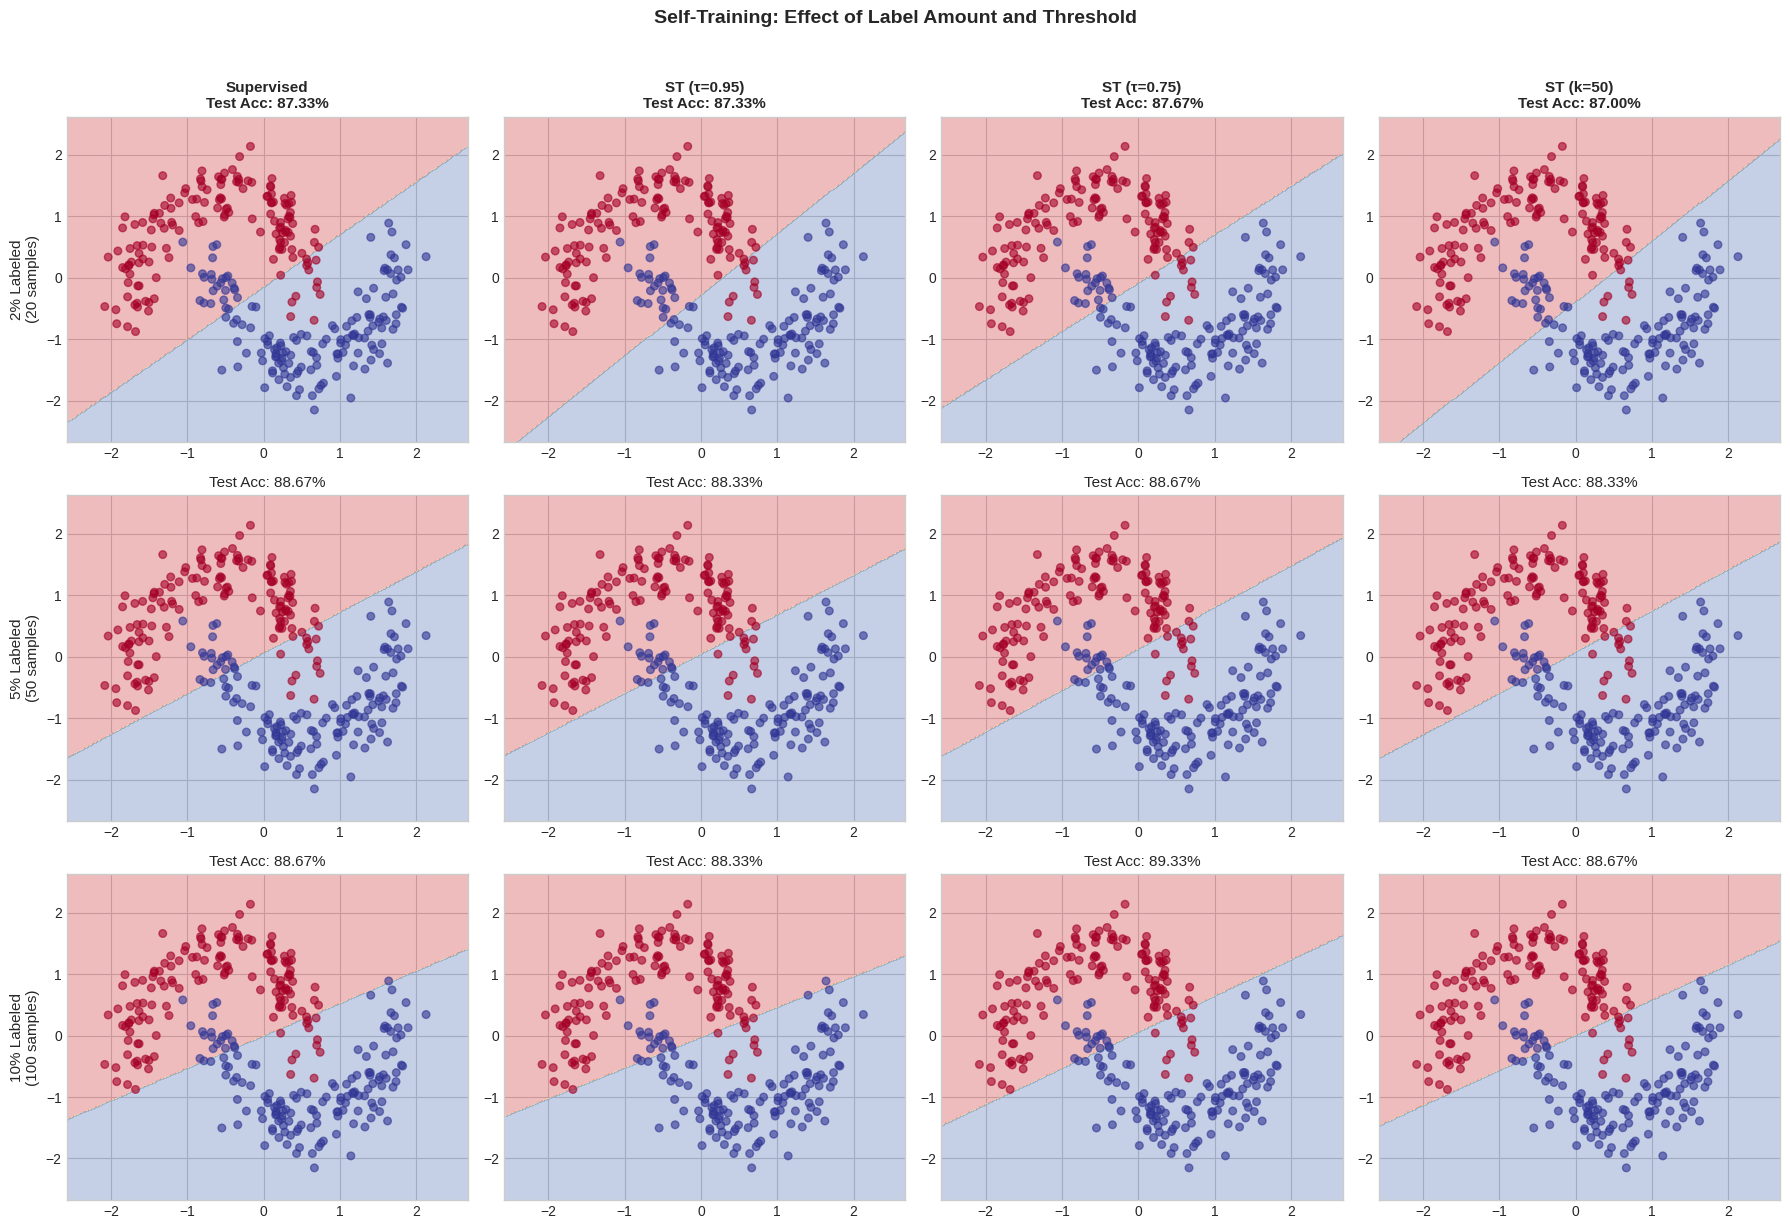


📊 Results Summary:
model      Supervised  ST (τ=0.95)  ST (τ=0.75)  ST (k=50)
label_pct                                                 
0.02           0.8733       0.8733       0.8767     0.8700
0.05           0.8867       0.8833       0.8867     0.8833
0.10           0.8867       0.8833       0.8933     0.8867

📈 Improvement over Supervised:
  ST (τ=0.95): +-0.22% avg
  ST (τ=0.75): +0.33% avg
  ST (k=50): +-0.22% avg


In [22]:
# ============================================================================
# EXAMPLE 3.3: Comprehensive Self-Training Comparison
# ============================================================================
"""
Compare different self-training configurations systematically.
"""

# Prepare a good dataset
np.random.seed(42)
X_st, y_st = make_moons(n_samples=1000, noise=0.15, random_state=42)
X_st = StandardScaler().fit_transform(X_st)

# Various labeled percentages
label_percentages = [0.02, 0.05, 0.1]  # 2%, 5%, 10%

results_comprehensive = []

fig, axes = plt.subplots(len(label_percentages), 4, figsize=(18, len(label_percentages)*4))

for row, pct in enumerate(label_percentages):
    n_labeled = max(int(len(y_st) * pct), 4)
    
    # Create labeled/unlabeled split
    np.random.seed(42)
    labeled_idx = []
    for c in [0, 1]:
        c_idx = np.where(y_st == c)[0]
        labeled_idx.extend(np.random.choice(c_idx, n_labeled // 2, replace=False))
    
    labeled_mask_st = np.zeros(len(y_st), dtype=bool)
    labeled_mask_st[labeled_idx] = True
    
    y_partial_st = np.full(len(y_st), -1)
    y_partial_st[labeled_mask_st] = y_st[labeled_mask_st]
    
    # Split for testing
    X_train, X_test, y_train, y_test, y_partial_train, _ = train_test_split(
        X_st, y_st, y_partial_st, test_size=0.3, random_state=42, stratify=y_st
    )
    
    # Models to compare
    models = [
        ('Supervised', LogisticRegression(random_state=42, max_iter=1000)),
        ('ST (τ=0.95)', SelfTrainingClassifier(
            LogisticRegression(random_state=42, max_iter=1000),
            criterion='threshold', threshold=0.95)),
        ('ST (τ=0.75)', SelfTrainingClassifier(
            LogisticRegression(random_state=42, max_iter=1000),
            criterion='threshold', threshold=0.75)),
        ('ST (k=50)', SelfTrainingClassifier(
            LogisticRegression(random_state=42, max_iter=1000),
            criterion='k_best', k_best=50))
    ]
    
    # Train and evaluate
    for col, (name, model) in enumerate(models):
        ax = axes[row, col]
        
        if 'ST' in name:
            model.fit(X_train, y_partial_train.copy())
        else:
            # Supervised: train only on labeled
            train_labeled_mask = y_partial_train != -1
            model.fit(X_train[train_labeled_mask], y_partial_train[train_labeled_mask])
        
        # Decision boundary
        h = 0.02
        x_min, x_max = X_st[:, 0].min() - 0.5, X_st[:, 0].max() + 0.5
        y_min, y_max = X_st[:, 1].min() - 0.5, X_st[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
        
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', s=30, alpha=0.6)
        
        acc = accuracy_score(y_test, model.predict(X_test))
        results_comprehensive.append({
            'label_pct': pct, 'model': name, 'accuracy': acc
        })
        
        if row == 0:
            ax.set_title(f'{name}\nTest Acc: {acc:.2%}', fontsize=11, fontweight='bold')
        else:
            ax.set_title(f'Test Acc: {acc:.2%}', fontsize=11)
        
        if col == 0:
            ax.set_ylabel(f'{pct*100:.0f}% Labeled\n({n_labeled} samples)', fontsize=11)

plt.suptitle('Self-Training: Effect of Label Amount and Threshold', 
            fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('self_training_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# Summary table
results_df = pd.DataFrame(results_comprehensive)
results_pivot = results_df.pivot(index='label_pct', columns='model', values='accuracy')
results_pivot = results_pivot[['Supervised', 'ST (τ=0.95)', 'ST (τ=0.75)', 'ST (k=50)']]

print("\n📊 Results Summary:")
print(results_pivot.round(4).to_string())

# Calculate improvements
print("\n📈 Improvement over Supervised:")
for col in results_pivot.columns[1:]:
    print(f"  {col}: +{(results_pivot[col] - results_pivot['Supervised']).mean()*100:.2f}% avg")

---

## 3.5 Chapter 3 Exercises

### 📝 Conceptual Questions

**Exercise 3.1** (Easy): Why is the confidence threshold important in self-training? What happens if it's too high? Too low?

**Exercise 3.2** (Medium): A model trained with self-training achieves 95% accuracy on the training set but only 70% on the test set. What might be happening, and how would you diagnose it?

**Exercise 3.3** (Challenging): Design a modified self-training algorithm that can detect and correct confirmation bias. What signals would you use to identify when errors are being propagated?

### 💻 Coding Exercises


In [23]:
# ============================================================================
# EXERCISE 3.4: Implement Progressive Threshold Self-Training
# ============================================================================
"""
YOUR TASK:
Implement a self-training variant that starts with a HIGH threshold and
progressively LOWERS it over iterations. This is often more robust than
a fixed threshold because:
1. First iterations add only very confident (likely correct) samples
2. Later iterations can be more lenient since model is better trained

Starter code is provided - fill in the TODO sections.
"""

class ProgressiveSelfTraining:
    """
    Self-training with progressively decreasing confidence threshold.
    
    Parameters:
    -----------
    base_estimator : classifier
    threshold_start : float, initial threshold (should be high, e.g., 0.95)
    threshold_end : float, final threshold (should be lower, e.g., 0.7)
    max_iter : int, maximum iterations
    """
    
    def __init__(self, base_estimator, threshold_start=0.95, threshold_end=0.7, max_iter=10):
        self.base_estimator = base_estimator
        self.threshold_start = threshold_start
        self.threshold_end = threshold_end
        self.max_iter = max_iter
        
    def fit(self, X, y):
        """
        Fit the progressive self-training classifier.
        """
        # Separate labeled and unlabeled
        labeled_mask = y != -1
        X_labeled = X[labeled_mask].copy()
        y_labeled = y[labeled_mask].copy()
        X_unlabeled = X[~labeled_mask].copy()
        
        print(f"Starting Progressive Self-Training")
        print(f"Initial labeled: {len(y_labeled)}, Unlabeled: {len(X_unlabeled)}")
        
        for iteration in range(self.max_iter):
            if len(X_unlabeled) == 0:
                break
                
            # TODO: Calculate current threshold (linear interpolation from start to end)
            # current_threshold = ...
            
            # TODO: Train model on current labeled data
            # ...
            
            # TODO: Get predictions and confidences for unlabeled data
            # ...
            
            # TODO: Select samples above current threshold
            # ...
            
            # TODO: Add selected samples to labeled set, remove from unlabeled
            # ...
            
            # print(f"Iter {iteration+1}: threshold={current_threshold:.2f}, added=..., remaining=...")
            pass
        
        # Final model training
        # self.estimator_ = ...
        
        return self
    
    def predict(self, X):
        return self.estimator_.predict(X)

print("💡 Complete the ProgressiveSelfTraining class by filling in the TODO sections.")

💡 Complete the ProgressiveSelfTraining class by filling in the TODO sections.


In [24]:
# ============================================================================
# EXERCISE 3.4: SOLUTION
# ============================================================================

class ProgressiveSelfTrainingSolution:
    """
    Self-training with progressively decreasing confidence threshold.
    """
    
    def __init__(self, base_estimator, threshold_start=0.95, threshold_end=0.7, max_iter=10):
        self.base_estimator = base_estimator
        self.threshold_start = threshold_start
        self.threshold_end = threshold_end
        self.max_iter = max_iter
        self.history = []
        
    def fit(self, X, y):
        labeled_mask = y != -1
        X_labeled = X[labeled_mask].copy()
        y_labeled = y[labeled_mask].copy()
        X_unlabeled = X[~labeled_mask].copy()
        
        print(f"Progressive Self-Training Started")
        print(f"Threshold: {self.threshold_start} → {self.threshold_end}")
        print(f"Initial: {len(y_labeled)} labeled, {len(X_unlabeled)} unlabeled\n")
        
        for iteration in range(self.max_iter):
            if len(X_unlabeled) == 0:
                print("All samples labeled!")
                break
            
            # Calculate current threshold (linear decay)
            progress = iteration / max(self.max_iter - 1, 1)
            current_threshold = self.threshold_start - progress * (self.threshold_start - self.threshold_end)
            
            # Train model
            from sklearn.base import clone
            self.estimator_ = clone(self.base_estimator)
            self.estimator_.fit(X_labeled, y_labeled)
            
            # Predict on unlabeled
            proba = self.estimator_.predict_proba(X_unlabeled)
            max_proba = np.max(proba, axis=1)
            predictions = self.estimator_.classes_[np.argmax(proba, axis=1)]
            
            # Select confident samples
            confident_mask = max_proba >= current_threshold
            n_added = confident_mask.sum()
            
            if n_added == 0:
                print(f"Iter {iteration+1}: τ={current_threshold:.3f}, no confident predictions, skipping")
                continue
            
            # Update sets
            X_labeled = np.vstack([X_labeled, X_unlabeled[confident_mask]])
            y_labeled = np.concatenate([y_labeled, predictions[confident_mask]])
            X_unlabeled = X_unlabeled[~confident_mask]
            
            self.history.append({
                'iter': iteration + 1,
                'threshold': current_threshold,
                'added': n_added,
                'remaining': len(X_unlabeled)
            })
            
            print(f"Iter {iteration+1}: τ={current_threshold:.3f}, added {n_added}, remaining {len(X_unlabeled)}")
        
        # Final training
        from sklearn.base import clone
        self.estimator_ = clone(self.base_estimator)
        self.estimator_.fit(X_labeled, y_labeled)
        
        print(f"\n✅ Complete! Final labeled set: {len(y_labeled)}")
        return self
    
    def predict(self, X):
        return self.estimator_.predict(X)
    
    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

# Test the solution
print("="*70)
print("Testing Progressive Self-Training")
print("="*70)

# Create dataset
np.random.seed(42)
X_prog, y_prog = make_moons(n_samples=500, noise=0.15, random_state=42)
X_prog = StandardScaler().fit_transform(X_prog)

# Create partial labels
labeled_idx_prog = np.random.choice(np.where(y_prog == 0)[0], 5, replace=False).tolist()
labeled_idx_prog += np.random.choice(np.where(y_prog == 1)[0], 5, replace=False).tolist()
y_partial_prog = np.full(len(y_prog), -1)
y_partial_prog[labeled_idx_prog] = y_prog[labeled_idx_prog]

# Train progressive self-training
prog_st = ProgressiveSelfTrainingSolution(
    LogisticRegression(random_state=42, max_iter=1000),
    threshold_start=0.95,
    threshold_end=0.70,
    max_iter=10
)
prog_st.fit(X_prog, y_partial_prog)

# Evaluate
prog_acc = prog_st.score(X_prog, y_prog)
print(f"\n🎯 Final Accuracy: {prog_acc:.2%}")

# Compare with fixed threshold
fixed_st = SelfTrainingClassifier(
    LogisticRegression(random_state=42, max_iter=1000),
    criterion='threshold',
    threshold=0.75
)
fixed_st.fit(X_prog, y_partial_prog.copy())
fixed_acc = accuracy_score(y_prog, fixed_st.predict(X_prog))
print(f"Fixed threshold (0.75) accuracy: {fixed_acc:.2%}")
print(f"Progressive improvement: {(prog_acc - fixed_acc)*100:+.2f}%")

Testing Progressive Self-Training
Progressive Self-Training Started
Threshold: 0.95 → 0.7
Initial: 10 labeled, 490 unlabeled

Iter 1: τ=0.950, added 21, remaining 469
Iter 2: τ=0.922, added 143, remaining 326
Iter 3: τ=0.894, added 125, remaining 201
Iter 4: τ=0.867, added 90, remaining 111
Iter 5: τ=0.839, added 28, remaining 83
Iter 6: τ=0.811, added 13, remaining 70
Iter 7: τ=0.783, added 11, remaining 59
Iter 8: τ=0.756, added 7, remaining 52
Iter 9: τ=0.728, added 9, remaining 43
Iter 10: τ=0.700, added 10, remaining 33

✅ Complete! Final labeled set: 467

🎯 Final Accuracy: 82.80%
Fixed threshold (0.75) accuracy: 83.60%
Progressive improvement: -0.80%


---

## 📚 Chapter 3 Summary

### Key Concepts Learned:

1. **Self-Training Algorithm**:
   - Train on labeled data → Predict unlabeled → Add confident predictions → Repeat
   - Simple but surprisingly effective

2. **Pseudo-Labeling**:
   - Predicted labels for unlabeled data
   - Confidence thresholding filters unreliable predictions

3. **Confirmation Bias**:
   - Initial errors can propagate and amplify
   - Mitigation: high thresholds, progressive thresholds, multiple models

4. **Practical Choices**:
   - Threshold-based: Add all confident predictions
   - K-best: Add fixed number per iteration
   - Progressive: Start strict, gradually relax

### What's Next:
In Chapter 4, we'll explore **Co-Training** - a powerful extension that uses multiple "views" of the data to cross-validate pseudo-labels and reduce confirmation bias.

---

---


# 📖 CHAPTER 4: Co-Training and Multi-View Learning

---

## 4.1 Introduction to Co-Training

### The Problem with Single-View Self-Training

Self-training has a fundamental weakness: it uses the **same model** to both generate and evaluate pseudo-labels. This is like grading your own test—errors can go undetected and compound.

### The Co-Training Solution

**Co-Training** (Blum & Mitchell, 1998) addresses this by using **two different classifiers** that "teach" each other:

> Two classifiers are trained on different "views" of the data. Each classifier labels unlabeled examples for the other.

### The Key Insight

If the two views are:

1. **Sufficient**: Each view contains enough information to classify
2. **Conditionally independent**: Given the label, the views are independent

Then the classifiers can catch each other's mistakes!

### Real-World Multi-View Examples

| Domain            | View 1              | View 2                 |
| ----------------- | ------------------- | ---------------------- |
| Web pages         | Page text content   | Anchor text from links |
| Videos            | Visual frames       | Audio track            |
| Scientific papers | Title & abstract    | Citation network       |
| Products          | Product description | Customer reviews       |
| Medical           | Clinical notes      | Lab test results       |

---

## 4.2 The Co-Training Algorithm

### Algorithm Steps

```
Algorithm: Co-Training
────────────────────────────────────────────────────────
Input: L (labeled data), U (unlabeled data)
       Views: X = [X^(1), X^(2)]

1. Split features into two views: V1 and V2
2. Train classifier h1 on V1 of labeled data
3. Train classifier h2 on V2 of labeled data
4. REPEAT until convergence:
   a. h1 predicts on V1 of unlabeled data
   b. h2 predicts on V2 of unlabeled data
   c. Each classifier adds its most confident predictions
      to the training set of THE OTHER classifier
   d. Retrain both classifiers
5. For final prediction: combine h1 and h2 predictions
────────────────────────────────────────────────────────
```

### Why Cross-Teaching Works

The magic happens because:

1. **h1 makes mistakes** on some examples based on V1
2. **h2 might get these correct** using different information in V2
3. When h2 teaches h1, it **corrects h1's blind spots**
4. Vice versa: h1 corrects h2's mistakes

This creates a **virtuous cycle** instead of confirmation bias!


In [25]:
# ============================================================================
# IMPLEMENTATION 4.1: Co-Training from Scratch
# ============================================================================

class CoTraining:
    """
    Co-Training algorithm implementation.
    
    Parameters:
    -----------
    estimator1 : classifier for view 1
    estimator2 : classifier for view 2
    n_features_view1 : number of features in view 1 (remaining go to view 2)
    k : number of samples to add per iteration per class
    max_iter : maximum number of iterations
    threshold : confidence threshold for adding samples
    """
    
    def __init__(self, estimator1, estimator2, n_features_view1=None, 
                 k=5, max_iter=20, threshold=0.75, verbose=True):
        self.estimator1 = estimator1
        self.estimator2 = estimator2
        self.n_features_view1 = n_features_view1
        self.k = k
        self.max_iter = max_iter
        self.threshold = threshold
        self.verbose = verbose
        self.history = []
        
    def _split_views(self, X):
        """Split features into two views."""
        if self.n_features_view1 is None:
            self.n_features_view1 = X.shape[1] // 2
        
        X1 = X[:, :self.n_features_view1]
        X2 = X[:, self.n_features_view1:]
        return X1, X2
    
    def fit(self, X, y):
        """
        Fit the co-training classifier.
        
        Parameters:
        -----------
        X : feature array
        y : labels (-1 for unlabeled)
        """
        # Split into views
        X1, X2 = self._split_views(X)
        
        # Separate labeled and unlabeled
        labeled_mask = y != -1
        unlabeled_mask = ~labeled_mask
        
        X1_labeled = X1[labeled_mask].copy()
        X2_labeled = X2[labeled_mask].copy()
        y_labeled = y[labeled_mask].copy()
        
        X1_unlabeled = X1[unlabeled_mask].copy()
        X2_unlabeled = X2[unlabeled_mask].copy()
        
        # Track unlabeled indices
        unlabeled_indices = np.arange(len(y))[unlabeled_mask]
        
        if self.verbose:
            print(f"{'='*60}")
            print(f"Co-Training Started")
            print(f"{'='*60}")
            print(f"View 1 features: {X1.shape[1]}, View 2 features: {X2.shape[1]}")
            print(f"Labeled: {len(y_labeled)}, Unlabeled: {len(X1_unlabeled)}")
            print(f"{'='*60}\n")
        
        for iteration in range(self.max_iter):
            if len(X1_unlabeled) == 0:
                break
            
            # Train both classifiers
            from sklearn.base import clone
            h1 = clone(self.estimator1)
            h2 = clone(self.estimator2)
            
            h1.fit(X1_labeled, y_labeled)
            h2.fit(X2_labeled, y_labeled)
            
            # Get predictions from both classifiers
            proba1 = h1.predict_proba(X1_unlabeled)
            proba2 = h2.predict_proba(X2_unlabeled)
            
            # Select top-k confident predictions from each classifier
            # that are above threshold
            samples_from_h1 = []
            samples_from_h2 = []
            
            for class_idx, class_label in enumerate(h1.classes_):
                # h1's confident predictions for this class
                conf1 = proba1[:, class_idx]
                top_k_1 = np.argsort(conf1)[-self.k:]
                for idx in top_k_1:
                    if conf1[idx] >= self.threshold:
                        samples_from_h1.append((idx, class_label, conf1[idx]))
                
                # h2's confident predictions for this class
                conf2 = proba2[:, class_idx]
                top_k_2 = np.argsort(conf2)[-self.k:]
                for idx in top_k_2:
                    if conf2[idx] >= self.threshold:
                        samples_from_h2.append((idx, class_label, conf2[idx]))
            
            # Get unique indices to add
            indices_to_add = set()
            labels_to_add = {}
            
            # h1 teaches h2: add h1's confident predictions to h2's training set
            for idx, label, conf in samples_from_h1:
                if idx not in labels_to_add:
                    labels_to_add[idx] = []
                labels_to_add[idx].append(('h1', label, conf))
                indices_to_add.add(idx)
            
            # h2 teaches h1: add h2's confident predictions to h1's training set
            for idx, label, conf in samples_from_h2:
                if idx not in labels_to_add:
                    labels_to_add[idx] = []
                labels_to_add[idx].append(('h2', label, conf))
                indices_to_add.add(idx)
            
            if len(indices_to_add) == 0:
                if self.verbose:
                    print(f"Iteration {iteration + 1}: No confident predictions. Stopping.")
                break
            
            # Resolve conflicts: if both classifiers give same label, use it
            # If different, use the more confident one
            final_indices = []
            final_labels = []
            
            for idx in indices_to_add:
                preds = labels_to_add[idx]
                if len(preds) == 1:
                    # Only one classifier made a prediction
                    final_indices.append(idx)
                    final_labels.append(preds[0][1])
                else:
                    # Both classifiers made predictions
                    if preds[0][1] == preds[1][1]:
                        # Agreement!
                        final_indices.append(idx)
                        final_labels.append(preds[0][1])
                    else:
                        # Disagreement - use more confident
                        if preds[0][2] > preds[1][2]:
                            final_indices.append(idx)
                            final_labels.append(preds[0][1])
                        else:
                            final_indices.append(idx)
                            final_labels.append(preds[1][1])
            
            final_indices = np.array(final_indices)
            final_labels = np.array(final_labels)
            
            # Add to labeled set
            X1_labeled = np.vstack([X1_labeled, X1_unlabeled[final_indices]])
            X2_labeled = np.vstack([X2_labeled, X2_unlabeled[final_indices]])
            y_labeled = np.concatenate([y_labeled, final_labels])
            
            # Remove from unlabeled set
            keep_mask = np.ones(len(X1_unlabeled), dtype=bool)
            keep_mask[final_indices] = False
            X1_unlabeled = X1_unlabeled[keep_mask]
            X2_unlabeled = X2_unlabeled[keep_mask]
            
            self.history.append({
                'iteration': iteration + 1,
                'added': len(final_indices),
                'remaining': len(X1_unlabeled),
                'h1_contributions': len(samples_from_h1),
                'h2_contributions': len(samples_from_h2)
            })
            
            if self.verbose:
                print(f"Iteration {iteration + 1}:")
                print(f"  → h1 contributed: {len(samples_from_h1)} samples")
                print(f"  → h2 contributed: {len(samples_from_h2)} samples")
                print(f"  → Total added (after dedup): {len(final_indices)}")
                print(f"  → Remaining unlabeled: {len(X1_unlabeled)}\n")
        
        # Train final models
        from sklearn.base import clone
        self.h1_ = clone(self.estimator1)
        self.h2_ = clone(self.estimator2)
        self.h1_.fit(X1_labeled, y_labeled)
        self.h2_.fit(X2_labeled, y_labeled)
        
        self.n_iter_ = len(self.history)
        
        if self.verbose:
            print(f"{'='*60}")
            print(f"Co-Training Complete!")
            print(f"{'='*60}")
        
        return self
    
    def predict(self, X):
        """
        Predict using ensemble of both classifiers.
        """
        X1, X2 = self._split_views(X)
        proba1 = self.h1_.predict_proba(X1)
        proba2 = self.h2_.predict_proba(X2)
        
        # Average probabilities
        avg_proba = (proba1 + proba2) / 2
        return self.h1_.classes_[np.argmax(avg_proba, axis=1)]
    
    def predict_proba(self, X):
        X1, X2 = self._split_views(X)
        proba1 = self.h1_.predict_proba(X1)
        proba2 = self.h2_.predict_proba(X2)
        return (proba1 + proba2) / 2

print("✅ CoTraining class defined!")

✅ CoTraining class defined!


In [26]:
# ============================================================================
# EXAMPLE 4.1: Co-Training on Multi-View Data
# ============================================================================
"""
Demonstrate co-training on data with two natural views.
"""

np.random.seed(42)

# Create synthetic multi-view data
# View 1: Position-based features
# View 2: Angle/direction-based features
n_samples = 500

# Generate two interleaving moons with extra features
X_base, y_base = make_moons(n_samples=n_samples, noise=0.15, random_state=42)

# Create View 1: Original coordinates + distance from origin
view1_f1 = X_base[:, 0]  # x coordinate
view1_f2 = X_base[:, 1]  # y coordinate
view1_f3 = np.sqrt(X_base[:, 0]**2 + X_base[:, 1]**2)  # distance from origin

# Create View 2: Angle-based features
view2_f1 = np.arctan2(X_base[:, 1], X_base[:, 0])  # angle
view2_f2 = X_base[:, 0] * X_base[:, 1]  # interaction
view2_f3 = X_base[:, 0]**2 - X_base[:, 1]**2  # quadratic difference

# Combine into multi-view dataset
X_mv = np.column_stack([view1_f1, view1_f2, view1_f3, view2_f1, view2_f2, view2_f3])
X_mv = StandardScaler().fit_transform(X_mv)
y_mv = y_base

# Create SSL scenario: 10 labeled samples
n_labeled = 10
labeled_idx_mv = np.random.choice(np.where(y_mv == 0)[0], 5, replace=False).tolist()
labeled_idx_mv += np.random.choice(np.where(y_mv == 1)[0], 5, replace=False).tolist()

y_partial_mv = np.full(len(y_mv), -1)
y_partial_mv[labeled_idx_mv] = y_mv[labeled_idx_mv]

print("="*70)
print("Multi-View Dataset Created")
print("="*70)
print(f"View 1 (features 0-2): Position-based")
print(f"View 2 (features 3-5): Angle-based")
print(f"Total features: {X_mv.shape[1]}")
print(f"Labeled samples: {n_labeled}")
print(f"Unlabeled samples: {len(y_mv) - n_labeled}")
print("="*70)

Multi-View Dataset Created
View 1 (features 0-2): Position-based
View 2 (features 3-5): Angle-based
Total features: 6
Labeled samples: 10
Unlabeled samples: 490



Training and Comparing Models

1. Supervised (10 labels, all features): 83.20%
2. Self-Training (all features): 80.40%
Co-Training Started
View 1 features: 3, View 2 features: 3
Labeled: 10, Unlabeled: 490

Iteration 1:
  → h1 contributed: 10 samples
  → h2 contributed: 10 samples
  → Total added (after dedup): 19
  → Remaining unlabeled: 471

Iteration 2:
  → h1 contributed: 10 samples
  → h2 contributed: 10 samples
  → Total added (after dedup): 20
  → Remaining unlabeled: 451

Iteration 3:
  → h1 contributed: 10 samples
  → h2 contributed: 10 samples
  → Total added (after dedup): 20
  → Remaining unlabeled: 431

Iteration 4:
  → h1 contributed: 10 samples
  → h2 contributed: 10 samples
  → Total added (after dedup): 20
  → Remaining unlabeled: 411

Iteration 5:
  → h1 contributed: 10 samples
  → h2 contributed: 10 samples
  → Total added (after dedup): 20
  → Remaining unlabeled: 391

Iteration 6:
  → h1 contributed: 10 samples
  → h2 contributed: 10 samples
  → Total added (after

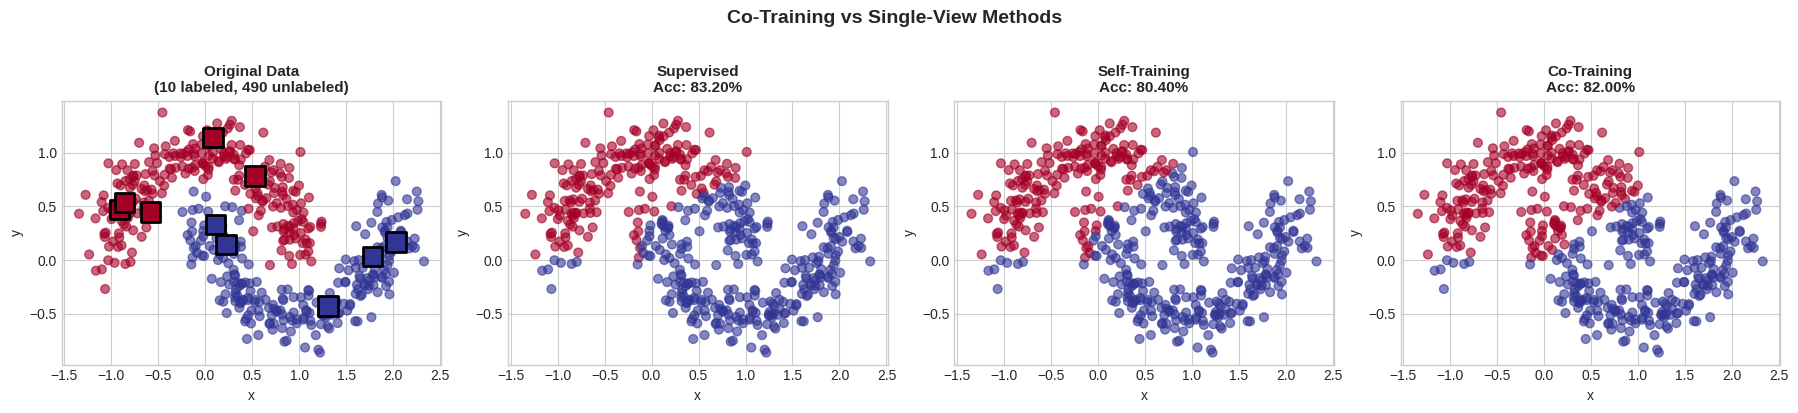


📊 Results Summary
       Method  Accuracy  Improvement
   Supervised     0.832        0.000
Self-Training     0.804       -0.028
  Co-Training     0.820       -0.012


In [27]:
# ============================================================================
# EXAMPLE 4.1 (continued): Compare Co-Training with Single-View Methods
# ============================================================================

# Train models
print("\n" + "="*70)
print("Training and Comparing Models")
print("="*70)

# 1. Supervised baseline (all features)
sup_baseline = LogisticRegression(random_state=42, max_iter=1000)
sup_baseline.fit(X_mv[y_partial_mv != -1], y_partial_mv[y_partial_mv != -1])
acc_sup = accuracy_score(y_mv, sup_baseline.predict(X_mv))
print(f"\n1. Supervised (10 labels, all features): {acc_sup:.2%}")

# 2. Self-Training (all features)
st_all = SelfTrainingClassifier(
    LogisticRegression(random_state=42, max_iter=1000),
    criterion='threshold', threshold=0.75
)
st_all.fit(X_mv, y_partial_mv.copy())
acc_st = accuracy_score(y_mv, st_all.predict(X_mv))
print(f"2. Self-Training (all features): {acc_st:.2%}")

# 3. Co-Training (two views)
ct = CoTraining(
    LogisticRegression(random_state=42, max_iter=1000),
    LogisticRegression(random_state=42, max_iter=1000),
    n_features_view1=3,  # First 3 features = View 1
    k=5,
    threshold=0.75,
    max_iter=15,
    verbose=True
)
ct.fit(X_mv, y_partial_mv.copy())
acc_ct = accuracy_score(y_mv, ct.predict(X_mv))
print(f"3. Co-Training (two views): {acc_ct:.2%}")

# Summary visualization
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# Original data (2D projection)
ax1 = axes[0]
ax1.scatter(X_base[:, 0], X_base[:, 1], c=y_mv, cmap='RdYlBu', s=40, alpha=0.6)
labeled_mask_mv = y_partial_mv != -1
ax1.scatter(X_base[labeled_mask_mv, 0], X_base[labeled_mask_mv, 1],
            c=y_mv[labeled_mask_mv], cmap='RdYlBu', s=200, marker='s',
            edgecolors='black', linewidth=2)
ax1.set_title('Original Data\n(10 labeled, 490 unlabeled)', fontsize=11, fontweight='bold')

# Supervised
ax2 = axes[1]
ax2.scatter(X_base[:, 0], X_base[:, 1], c=sup_baseline.predict(X_mv), 
            cmap='RdYlBu', s=40, alpha=0.6)
ax2.set_title(f'Supervised\nAcc: {acc_sup:.2%}', fontsize=11, fontweight='bold')

# Self-Training
ax3 = axes[2]
ax3.scatter(X_base[:, 0], X_base[:, 1], c=st_all.predict(X_mv), 
            cmap='RdYlBu', s=40, alpha=0.6)
ax3.set_title(f'Self-Training\nAcc: {acc_st:.2%}', fontsize=11, fontweight='bold')

# Co-Training
ax4 = axes[3]
ax4.scatter(X_base[:, 0], X_base[:, 1], c=ct.predict(X_mv), 
            cmap='RdYlBu', s=40, alpha=0.6)
ax4.set_title(f'Co-Training\nAcc: {acc_ct:.2%}', fontsize=11, fontweight='bold')

for ax in axes:
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.suptitle('Co-Training vs Single-View Methods', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('co_training_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# Summary bar chart
print("\n" + "="*70)
print("📊 Results Summary")
print("="*70)
results_ct = pd.DataFrame({
    'Method': ['Supervised', 'Self-Training', 'Co-Training'],
    'Accuracy': [acc_sup, acc_st, acc_ct],
    'Improvement': [0, acc_st - acc_sup, acc_ct - acc_sup]
})
print(results_ct.to_string(index=False))

---

## 📚 Chapter 4 Summary

### Key Concepts Learned:

1. **Co-Training** uses two classifiers on different "views" of the data
2. Each classifier teaches the other, reducing confirmation bias
3. Requirements: views should be sufficient and conditionally independent
4. Even with synthetic view splits, co-training can outperform single-view methods

### What's Next:
In Chapter 5, we'll explore **Graph-Based Methods** - powerful techniques that build a similarity graph over all data points and propagate labels through the graph structure.

---

---


# 📖 CHAPTER 5: Graph-Based Semi-Supervised Learning

---

## 5.1 Introduction to Graph-Based Methods

### The Core Intuition

Graph-based SSL methods view the data as a **graph**:

- **Nodes** = Data points (both labeled and unlabeled)
- **Edges** = Similarity between points
- **Edge weights** = Strength of similarity

The key insight: **Labels can flow through the graph** from labeled nodes to unlabeled nodes, like water flowing downhill!

### Why Graphs for SSL?

Graphs naturally capture the **manifold structure** of data:

- Connected nodes are "close" on the manifold
- Disconnected regions represent different clusters
- Labels propagate along paths of high similarity

### The Label Propagation Metaphor

Imagine labeled points as **heat sources**:

- Each labeled point emits "heat" of its class
- Heat flows through edges to neighbors
- Unlabeled points adopt the temperature (class) of the dominant heat they receive

---

## 5.2 Building the Similarity Graph

### Step 1: Define Similarity

The most common similarity function is the **RBF (Radial Basis Function) kernel**:

$$w_{ij} = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)$$

Or equivalently with parameter $\gamma = \frac{1}{2\sigma^2}$:

$$w_{ij} = \exp(-\gamma \|x_i - x_j\|^2)$$

### Step 2: Graph Construction Methods

1. **Fully Connected**: Connect all pairs (weighted by similarity)

   - Pros: Captures all relationships
   - Cons: Computationally expensive for large datasets

2. **k-Nearest Neighbors (k-NN)**: Connect each point to its k nearest neighbors

   - Pros: Sparse graph, efficient
   - Cons: Must choose k

3. **ε-Neighborhood**: Connect points within distance ε
   - Pros: Natural threshold
   - Cons: Sensitive to ε choice

### The Affinity Matrix

The graph is represented as an **affinity matrix** $W$:

$$W_{ij} = \begin{cases} w_{ij} & \text{if } i \neq j \\ 0 & \text{if } i = j \end{cases}$$

### The Graph Laplacian

A key object in graph-based SSL is the **Laplacian matrix**:

$$L = D - W$$

Where $D$ is the diagonal **degree matrix**: $D_{ii} = \sum_j W_{ij}$

The normalized Laplacian:
$$L_{norm} = I - D^{-1/2}WD^{-1/2}$$


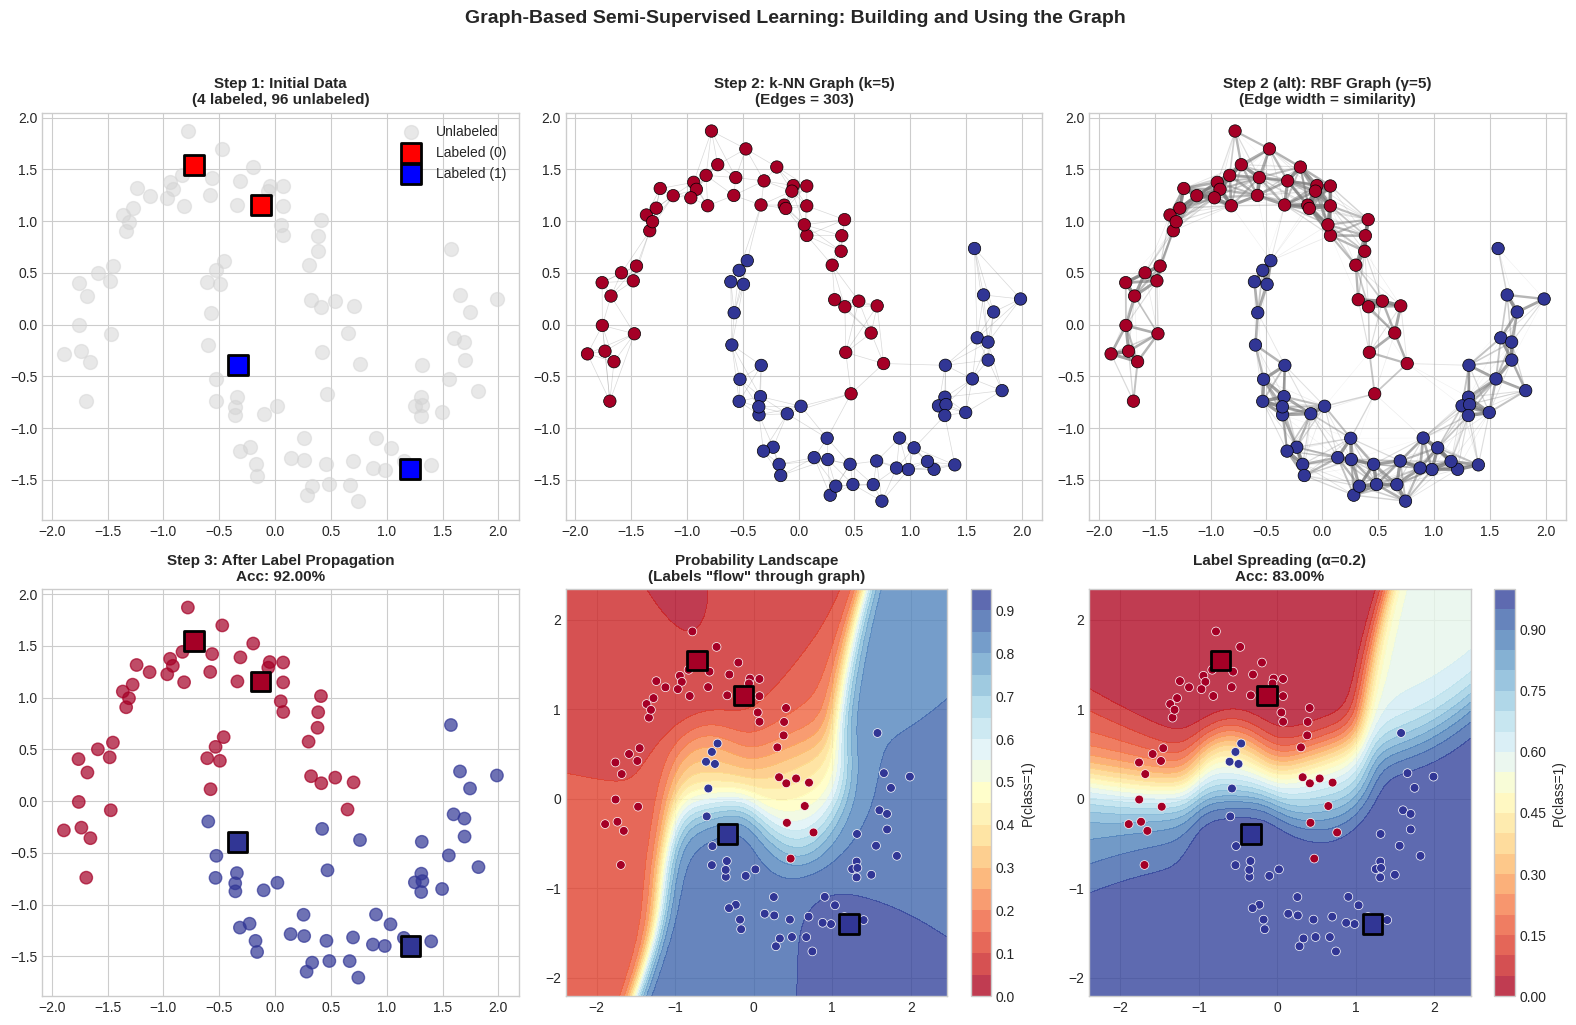


📝 Key Observations:
• The graph captures the manifold structure (two moons)
• Labels propagate along edges to nearby unlabeled points
• Probability transitions smoothly through the graph
• Even with just 4 labeled points, high accuracy is achieved!


In [28]:
# ============================================================================
# VISUALIZATION 5.1: Understanding the Similarity Graph
# ============================================================================
"""
Visualize how graph-based SSL builds and uses the similarity graph.
"""

np.random.seed(42)

# Create simple dataset
X_graph, y_graph = make_moons(n_samples=100, noise=0.1, random_state=42)
X_graph = StandardScaler().fit_transform(X_graph)

# Create partial labels
labeled_idx_graph = [0, 10, 50, 60]  # 2 from each class
y_partial_graph = np.full(len(y_graph), -1)
y_partial_graph[labeled_idx_graph] = y_graph[labeled_idx_graph]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Panel 1: Raw data with labels
ax1 = axes[0, 0]
unlabeled_mask_g = y_partial_graph == -1
ax1.scatter(X_graph[unlabeled_mask_g, 0], X_graph[unlabeled_mask_g, 1], 
            c='lightgray', s=100, alpha=0.5, label='Unlabeled')
ax1.scatter(X_graph[~unlabeled_mask_g & (y_graph == 0), 0], 
            X_graph[~unlabeled_mask_g & (y_graph == 0), 1],
            c='red', s=200, marker='s', edgecolors='black', linewidth=2, label='Labeled (0)')
ax1.scatter(X_graph[~unlabeled_mask_g & (y_graph == 1), 0], 
            X_graph[~unlabeled_mask_g & (y_graph == 1), 1],
            c='blue', s=200, marker='s', edgecolors='black', linewidth=2, label='Labeled (1)')
ax1.set_title('Step 1: Initial Data\n(4 labeled, 96 unlabeled)', fontsize=11, fontweight='bold')
ax1.legend()

# Panel 2: k-NN Graph (k=5)
ax2 = axes[0, 1]
from sklearn.neighbors import kneighbors_graph

k = 5
A_knn = kneighbors_graph(X_graph, k, mode='connectivity', include_self=False)
A_knn = A_knn.toarray()
A_knn = np.maximum(A_knn, A_knn.T)  # Make symmetric

# Draw edges
for i in range(len(X_graph)):
    for j in range(i+1, len(X_graph)):
        if A_knn[i, j] > 0:
            ax2.plot([X_graph[i, 0], X_graph[j, 0]], 
                    [X_graph[i, 1], X_graph[j, 1]], 
                    'gray', alpha=0.3, linewidth=0.5)

ax2.scatter(X_graph[:, 0], X_graph[:, 1], c=y_graph, cmap='RdYlBu', s=80, 
            edgecolors='black', linewidth=0.5, zorder=5)
ax2.set_title(f'Step 2: k-NN Graph (k={k})\n(Edges = {int(A_knn.sum()/2)})', fontsize=11, fontweight='bold')

# Panel 3: RBF Weighted Graph
ax3 = axes[0, 2]
gamma = 5
distances = cdist(X_graph, X_graph, metric='euclidean')
W_rbf = np.exp(-gamma * distances**2)
np.fill_diagonal(W_rbf, 0)

# Draw edges with width proportional to weight (only strong edges)
threshold = 0.1
for i in range(len(X_graph)):
    for j in range(i+1, len(X_graph)):
        if W_rbf[i, j] > threshold:
            ax3.plot([X_graph[i, 0], X_graph[j, 0]], 
                    [X_graph[i, 1], X_graph[j, 1]], 
                    'gray', alpha=W_rbf[i, j], linewidth=W_rbf[i, j]*3)

ax3.scatter(X_graph[:, 0], X_graph[:, 1], c=y_graph, cmap='RdYlBu', s=80, 
            edgecolors='black', linewidth=0.5, zorder=5)
ax3.set_title(f'Step 2 (alt): RBF Graph (γ={gamma})\n(Edge width = similarity)', 
             fontsize=11, fontweight='bold')

# Panel 4: Label Propagation in action
ax4 = axes[1, 0]

# Perform Label Propagation
lp = LabelPropagation(kernel='rbf', gamma=gamma)
lp.fit(X_graph, y_partial_graph)
y_pred_lp = lp.predict(X_graph)

ax4.scatter(X_graph[:, 0], X_graph[:, 1], c=y_pred_lp, cmap='RdYlBu', s=80, alpha=0.7)
ax4.scatter(X_graph[~unlabeled_mask_g, 0], X_graph[~unlabeled_mask_g, 1],
            c=y_graph[~unlabeled_mask_g], cmap='RdYlBu', s=200, marker='s',
            edgecolors='black', linewidth=2)
ax4.set_title(f'Step 3: After Label Propagation\nAcc: {accuracy_score(y_graph, y_pred_lp):.2%}', 
             fontsize=11, fontweight='bold')

# Panel 5: Probability landscape
ax5 = axes[1, 1]
h = 0.05
x_min, x_max = X_graph[:, 0].min() - 0.5, X_graph[:, 0].max() + 0.5
y_min, y_max = X_graph[:, 1].min() - 0.5, X_graph[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get probability for class 1
proba_lp = lp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

contour = ax5.contourf(xx, yy, proba_lp, levels=20, cmap='RdYlBu', alpha=0.8)
ax5.scatter(X_graph[:, 0], X_graph[:, 1], c=y_graph, cmap='RdYlBu', s=40, 
            edgecolors='white', linewidth=0.5)
ax5.scatter(X_graph[~unlabeled_mask_g, 0], X_graph[~unlabeled_mask_g, 1],
            c=y_graph[~unlabeled_mask_g], cmap='RdYlBu', s=200, marker='s',
            edgecolors='black', linewidth=2)
plt.colorbar(contour, ax=ax5, label='P(class=1)')
ax5.set_title('Probability Landscape\n(Labels "flow" through graph)', fontsize=11, fontweight='bold')

# Panel 6: Label Spreading comparison
ax6 = axes[1, 2]
ls = LabelSpreading(kernel='rbf', gamma=gamma, alpha=0.2)
ls.fit(X_graph, y_partial_graph)
y_pred_ls = ls.predict(X_graph)

proba_ls = ls.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
contour2 = ax6.contourf(xx, yy, proba_ls, levels=20, cmap='RdYlBu', alpha=0.8)
ax6.scatter(X_graph[:, 0], X_graph[:, 1], c=y_graph, cmap='RdYlBu', s=40, 
            edgecolors='white', linewidth=0.5)
ax6.scatter(X_graph[~unlabeled_mask_g, 0], X_graph[~unlabeled_mask_g, 1],
            c=y_graph[~unlabeled_mask_g], cmap='RdYlBu', s=200, marker='s',
            edgecolors='black', linewidth=2)
plt.colorbar(contour2, ax=ax6, label='P(class=1)')
ax6.set_title(f'Label Spreading (α=0.2)\nAcc: {accuracy_score(y_graph, y_pred_ls):.2%}', 
             fontsize=11, fontweight='bold')

plt.suptitle('Graph-Based Semi-Supervised Learning: Building and Using the Graph', 
            fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('graph_based_ssl.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📝 Key Observations:")
print("• The graph captures the manifold structure (two moons)")
print("• Labels propagate along edges to nearby unlabeled points")
print("• Probability transitions smoothly through the graph")
print("• Even with just 4 labeled points, high accuracy is achieved!")

---

## 5.3 Label Propagation Algorithm

### The Mathematical Framework

Let $Y \in \mathbb{R}^{n \times c}$ be the label matrix where:
- $Y_{ij} = 1$ if node $i$ has label $j$
- $Y_{ij} = 0$ otherwise
- For unlabeled nodes, all entries are 0 initially

### The Update Rule

Label Propagation iteratively updates labels:

$$Y^{(t+1)} = \alpha \cdot \tilde{W} Y^{(t)} + (1-\alpha) \cdot Y^{(0)}$$

Where:
- $\tilde{W} = D^{-1/2}WD^{-1/2}$ is the normalized affinity matrix
- $Y^{(0)}$ is the initial label matrix (known labels)
- $\alpha$ controls how much labels can spread (typically $\alpha \in [0.1, 0.9]$)

### Interpretation

At each iteration:
1. Each node receives labels from neighbors (weighted by edge strength)
2. A portion $(1-\alpha)$ comes from initial labels (for labeled nodes)
3. Labels converge to a stable distribution

### Convergence

The iteration converges to:

$$Y^* = (I - \alpha \tilde{W})^{-1}(1-\alpha)Y^{(0)}$$

This has a closed-form solution! But iterative computation is often more practical for large graphs.

---

## 5.4 Label Spreading: A Smoother Alternative

### The Difference

**Label Propagation** (hard clamping):

- Labeled nodes ALWAYS keep their original labels
- Only unlabeled nodes are updated

**Label Spreading** (soft clamping):

- ALL nodes can have their labels adjusted
- More robust to label noise!

### When to Use Which?

| Scenario                 | Recommended Method |
| ------------------------ | ------------------ |
| Clean, reliable labels   | Label Propagation  |
| Potentially noisy labels | Label Spreading    |
| Very few labeled samples | Label Spreading    |
| Labels are gold standard | Label Propagation  |


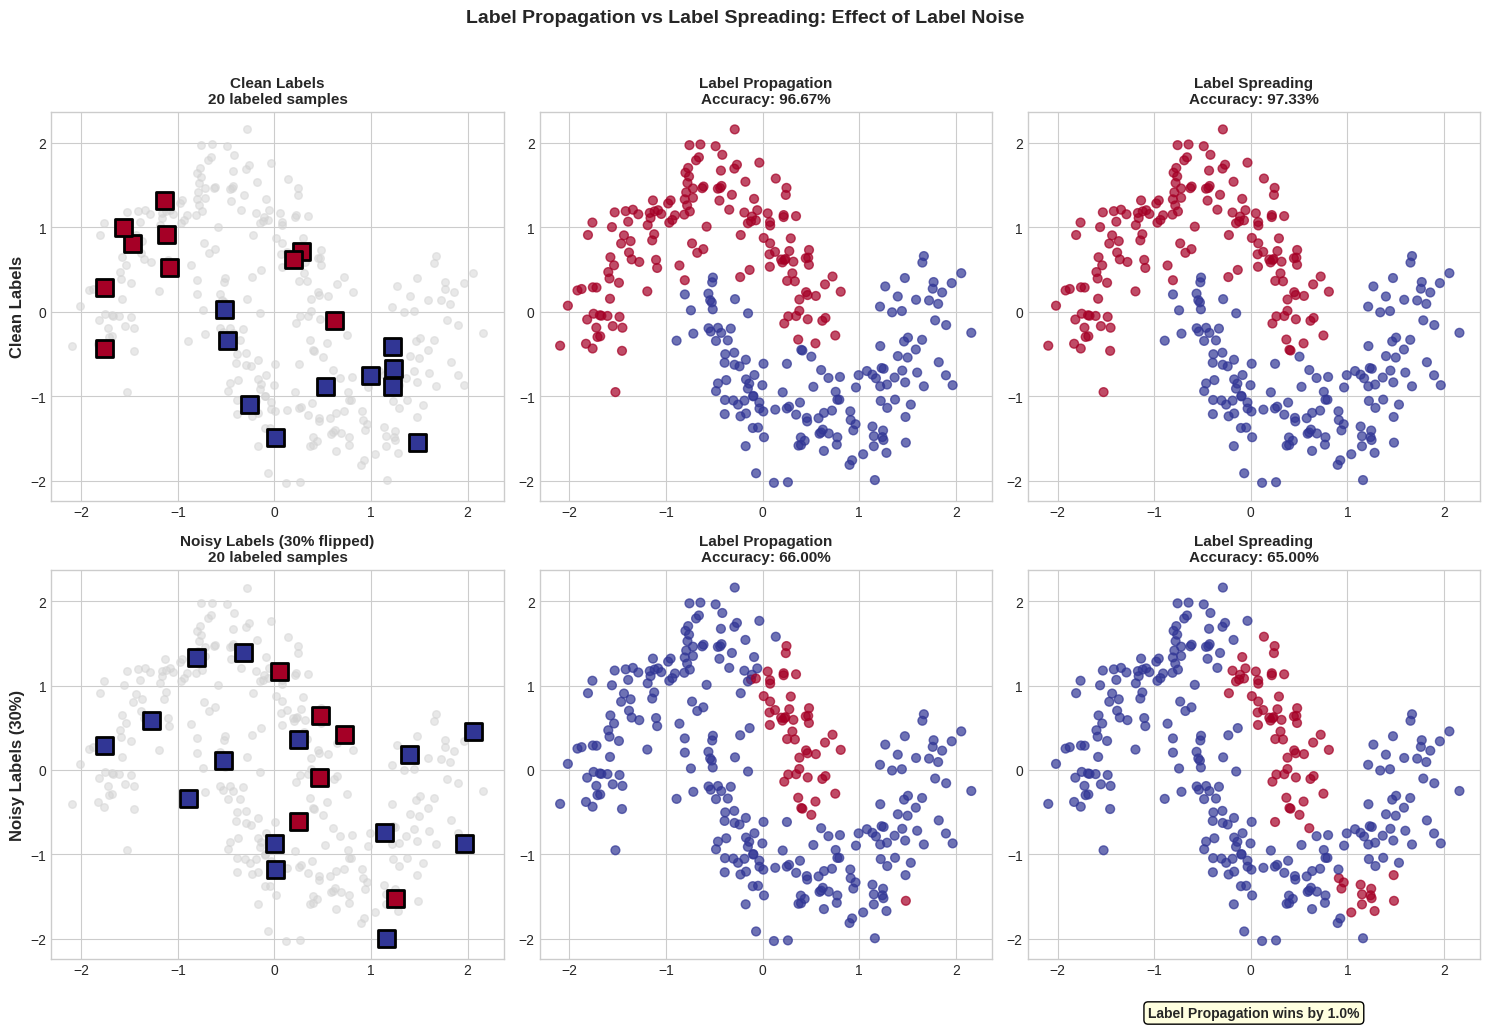


📝 Key Observation:
• With clean labels: Both methods perform similarly
• With noisy labels: Label Spreading is MORE ROBUST
• Label Spreading allows labeled nodes to be 'corrected' by neighbors


In [29]:
# ============================================================================
# EXAMPLE 5.1: Comparing Label Propagation vs Label Spreading
# ============================================================================
"""
Compare the two methods, especially with noisy labels.
"""

np.random.seed(42)

# Create dataset
X_lp, y_lp = make_moons(n_samples=300, noise=0.15, random_state=42)
X_lp = StandardScaler().fit_transform(X_lp)

# Create two scenarios: clean labels vs noisy labels
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for row, noise_level in enumerate([0, 0.3]):  # 0% and 30% label noise
    
    # Create labeled set
    n_labeled = 20
    labeled_idx = np.random.choice(np.where(y_lp == 0)[0], n_labeled//2, replace=False).tolist()
    labeled_idx += np.random.choice(np.where(y_lp == 1)[0], n_labeled//2, replace=False).tolist()
    
    # Create labels (possibly with noise)
    y_partial = np.full(len(y_lp), -1)
    y_labeled = y_lp[labeled_idx].copy()
    
    if noise_level > 0:
        # Flip some labels
        n_flip = int(noise_level * len(labeled_idx))
        flip_idx = np.random.choice(len(labeled_idx), n_flip, replace=False)
        y_labeled[flip_idx] = 1 - y_labeled[flip_idx]
    
    y_partial[labeled_idx] = y_labeled
    
    # Panel 1: Initial data
    ax1 = axes[row, 0]
    ax1.scatter(X_lp[:, 0], X_lp[:, 1], c='lightgray', s=30, alpha=0.5)
    ax1.scatter(X_lp[labeled_idx, 0], X_lp[labeled_idx, 1], 
                c=y_labeled, cmap='RdYlBu', s=150, edgecolors='black', linewidth=2, marker='s')
    
    if noise_level > 0:
        # Mark the flipped labels
        ax1.set_title(f'Noisy Labels ({int(noise_level*100)}% flipped)\n{n_labeled} labeled samples', 
                     fontsize=11, fontweight='bold')
    else:
        ax1.set_title(f'Clean Labels\n{n_labeled} labeled samples', fontsize=11, fontweight='bold')
    
    # Panel 2: Label Propagation
    ax2 = axes[row, 1]
    lp_model = LabelPropagation(kernel='rbf', gamma=10, max_iter=1000)
    lp_model.fit(X_lp, y_partial.copy())
    y_pred_lp = lp_model.predict(X_lp)
    
    ax2.scatter(X_lp[:, 0], X_lp[:, 1], c=y_pred_lp, cmap='RdYlBu', s=40, alpha=0.7)
    acc_lp = accuracy_score(y_lp, y_pred_lp)
    ax2.set_title(f'Label Propagation\nAccuracy: {acc_lp:.2%}', fontsize=11, fontweight='bold')
    
    # Panel 3: Label Spreading
    ax3 = axes[row, 2]
    ls_model = LabelSpreading(kernel='rbf', gamma=10, alpha=0.2, max_iter=1000)
    ls_model.fit(X_lp, y_partial.copy())
    y_pred_ls = ls_model.predict(X_lp)
    
    ax3.scatter(X_lp[:, 0], X_lp[:, 1], c=y_pred_ls, cmap='RdYlBu', s=40, alpha=0.7)
    acc_ls = accuracy_score(y_lp, y_pred_ls)
    ax3.set_title(f'Label Spreading\nAccuracy: {acc_ls:.2%}', fontsize=11, fontweight='bold')
    
    # Add comparison annotation
    diff = acc_ls - acc_lp
    if abs(diff) > 0.01:
        better = "Label Spreading" if diff > 0 else "Label Propagation"
        ax3.annotate(f'{better} wins by {abs(diff)*100:.1f}%', 
                    xy=(0.5, -0.15), xycoords='axes fraction', ha='center',
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle='round', 
                             facecolor='lightgreen' if diff > 0 else 'lightyellow'))

# Row labels
axes[0, 0].set_ylabel('Clean Labels', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Noisy Labels (30%)', fontsize=12, fontweight='bold')

plt.suptitle('Label Propagation vs Label Spreading: Effect of Label Noise', 
            fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('lp_vs_ls.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📝 Key Observation:")
print("• With clean labels: Both methods perform similarly")
print("• With noisy labels: Label Spreading is MORE ROBUST")
print("• Label Spreading allows labeled nodes to be 'corrected' by neighbors")

---

## 5.5 Hyperparameter Tuning for Graph-Based Methods

### Key Parameters

1. **gamma (γ)**: Controls the RBF kernel width

   - Large γ → Only very close neighbors connected
   - Small γ → Wider connections, smoother propagation

2. **alpha (α)**: Controls label spreading strength

   - α close to 0 → Labels stay near original values
   - α close to 1 → Labels spread more freely

3. **n_neighbors (for k-NN kernel)**: Number of neighbors to connect
   - More neighbors → Denser graph, smoother boundaries
   - Fewer neighbors → Sparser graph, can be disconnected

### Effect of Gamma (γ)


IndexError: index 1 is out of bounds for axis 1 with size 1

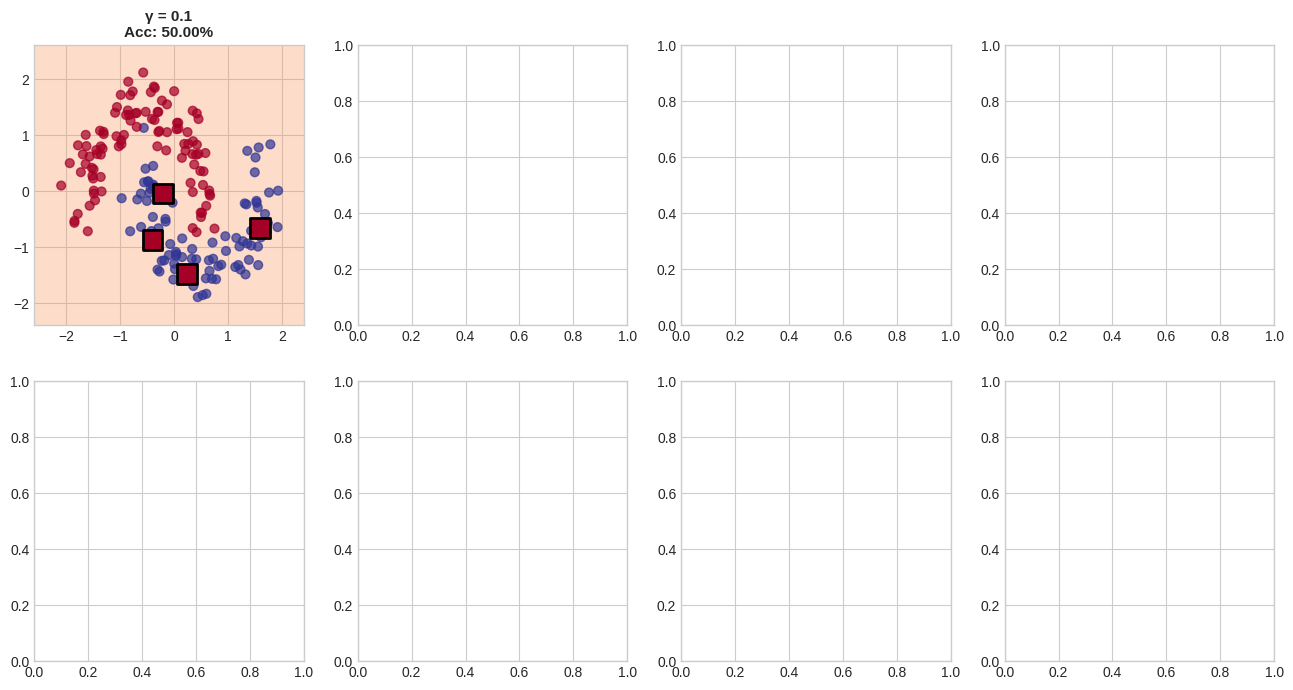

In [30]:
# ============================================================================
# EXAMPLE 5.2: Effect of Gamma Parameter
# ============================================================================
"""
Visualize how gamma affects label propagation.
"""

np.random.seed(42)
X_gamma, y_gamma = make_moons(n_samples=200, noise=0.15, random_state=42)
X_gamma = StandardScaler().fit_transform(X_gamma)

# Few labeled samples
labeled_idx_gamma = [5, 15, 105, 115]
y_partial_gamma = np.full(len(y_gamma), -1)
y_partial_gamma[labeled_idx_gamma] = y_gamma[labeled_idx_gamma]

# Different gamma values
gammas = [0.1, 1, 10, 100]

fig, axes = plt.subplots(2, len(gammas), figsize=(16, 8))

for col, gamma in enumerate(gammas):
    # Label Propagation
    lp_g = LabelPropagation(kernel='rbf', gamma=gamma, max_iter=1000)
    lp_g.fit(X_gamma, y_partial_gamma.copy())
    
    # Row 1: Decision boundary
    ax1 = axes[0, col]
    h = 0.05
    x_min, x_max = X_gamma[:, 0].min() - 0.5, X_gamma[:, 0].max() + 0.5
    y_min, y_max = X_gamma[:, 1].min() - 0.5, X_gamma[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = lp_g.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax1.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    ax1.scatter(X_gamma[:, 0], X_gamma[:, 1], c=y_gamma, cmap='RdYlBu', s=40, alpha=0.7)
    ax1.scatter(X_gamma[labeled_idx_gamma, 0], X_gamma[labeled_idx_gamma, 1],
               c=y_gamma[labeled_idx_gamma], cmap='RdYlBu', s=200, marker='s',
               edgecolors='black', linewidth=2)
    
    acc = accuracy_score(y_gamma, lp_g.predict(X_gamma))
    ax1.set_title(f'γ = {gamma}\nAcc: {acc:.2%}', fontsize=11, fontweight='bold')
    
    # Row 2: Probability landscape
    ax2 = axes[1, col]
    proba = lp_g.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    contour = ax2.contourf(xx, yy, proba, levels=20, cmap='RdYlBu', alpha=0.8)
    ax2.scatter(X_gamma[:, 0], X_gamma[:, 1], c=y_gamma, cmap='RdYlBu', s=20, 
                edgecolors='white', linewidth=0.3)
    plt.colorbar(contour, ax=ax2)
    ax2.set_title('P(class=1)', fontsize=10)

axes[0, 0].set_ylabel('Decision Boundary', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Probability', fontsize=11, fontweight='bold')

plt.suptitle('Effect of γ (Gamma) in Label Propagation', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('gamma_effect.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📝 Effect of Gamma:")
print("• Small γ (0.1): Very smooth, might underfit (ignores local structure)")
print("• Medium γ (1-10): Usually best balance")
print("• Large γ (100): Very localized, might overfit (too sensitive to noise)")

---

## 5.6 Chapter 5 Exercises

### 📝 Conceptual Questions

**Exercise 5.1** (Easy): Why is the graph Laplacian important in graph-based SSL? What property of the Laplacian makes it useful?

**Exercise 5.2** (Medium): You have a dataset where one class forms multiple disconnected clusters. Will Label Propagation work well? What could you do to help?

**Exercise 5.3** (Challenging): Prove that if the graph is disconnected, Label Propagation cannot propagate labels between disconnected components. What happens to unlabeled nodes in a component with no labeled nodes?

### 💻 Coding Exercise


In [ ]:
# ============================================================================
# EXERCISE 5.4: Implement Label Propagation from Scratch
# ============================================================================
"""
YOUR TASK:
Implement a simple Label Propagation algorithm from scratch.

The algorithm:
1. Build the affinity matrix W using RBF kernel
2. Compute the normalized matrix: T = D^(-1) * W
3. Initialize label matrix Y (one-hot encoding for labeled, zeros for unlabeled)
4. Iterate: Y = T @ Y until convergence (or max iterations)
5. Clamp labeled nodes back to their original labels after each iteration
6. Return predicted labels (argmax of Y for each row)
"""

class LabelPropagationFromScratch:
    """Simple Label Propagation implementation."""
    
    def __init__(self, gamma=10, max_iter=100, tol=1e-3):
        self.gamma = gamma
        self.max_iter = max_iter
        self.tol = tol
        
    def fit(self, X, y):
        """
        Fit the label propagation model.
        
        Parameters:
        -----------
        X : array of shape (n_samples, n_features)
        y : array of shape (n_samples,) with -1 for unlabeled
        """
        n = len(X)
        
        # TODO: Step 1 - Build affinity matrix W using RBF kernel
        # W[i,j] = exp(-gamma * ||x_i - x_j||^2)
        # Set diagonal to 0
        # YOUR CODE HERE:
        # W = ...
        
        # TODO: Step 2 - Compute degree matrix D and transition matrix T = D^(-1) * W
        # YOUR CODE HERE:
        # D = ...
        # T = ...
        
        # TODO: Step 3 - Initialize label matrix Y
        # For each labeled sample, Y[i, label] = 1
        # For unlabeled, Y[i, :] = 0
        # YOUR CODE HERE:
        # classes = ...
        # Y = ...
        
        # TODO: Step 4 - Iterate: Y_new = T @ Y, then clamp labeled nodes
        # YOUR CODE HERE:
        # for _ in range(self.max_iter):
        #     ...
        
        # TODO: Store final labels
        # self.labels_ = np.argmax(Y, axis=1)
        
        return self
    
    def predict(self, X):
        # For simplicity, only predict on training data
        return self.labels_

print("💡 Complete the LabelPropagationFromScratch class by filling in the TODO sections.")

In [ ]:
# ============================================================================
# EXERCISE 5.4: SOLUTION
# ============================================================================

class LabelPropagationFromScratchSolution:
    """Complete Label Propagation implementation."""
    
    def __init__(self, gamma=10, max_iter=100, tol=1e-3):
        self.gamma = gamma
        self.max_iter = max_iter
        self.tol = tol
        
    def fit(self, X, y):
        n = len(X)
        
        # Step 1: Build affinity matrix W using RBF kernel
        distances = cdist(X, X, metric='sqeuclidean')
        W = np.exp(-self.gamma * distances)
        np.fill_diagonal(W, 0)  # No self-loops
        
        # Step 2: Compute transition matrix T = D^(-1) * W
        D = np.diag(W.sum(axis=1))
        D_inv = np.diag(1.0 / (W.sum(axis=1) + 1e-10))
        T = D_inv @ W
        
        # Step 3: Initialize label matrix Y
        labeled_mask = y != -1
        classes = np.unique(y[labeled_mask])
        self.classes_ = classes
        n_classes = len(classes)
        
        Y = np.zeros((n, n_classes))
        for i, c in enumerate(classes):
            Y[y == c, i] = 1.0
        
        Y_original = Y.copy()
        
        # Step 4: Iterate
        for iteration in range(self.max_iter):
            Y_new = T @ Y
            
            # Clamp labeled nodes
            Y_new[labeled_mask] = Y_original[labeled_mask]
            
            # Check convergence
            if np.abs(Y_new - Y).sum() < self.tol:
                print(f"Converged at iteration {iteration + 1}")
                break
            
            Y = Y_new
        
        # Store results
        self.Y_ = Y
        self.labels_ = classes[np.argmax(Y, axis=1)]
        
        return self
    
    def predict(self, X):
        return self.labels_
    
    def predict_proba(self, X):
        return self.Y_ / (self.Y_.sum(axis=1, keepdims=True) + 1e-10)

# Test the solution
print("="*70)
print("Testing Label Propagation from Scratch")
print("="*70)

np.random.seed(42)
X_test_lp, y_test_lp = make_moons(n_samples=200, noise=0.15, random_state=42)
X_test_lp = StandardScaler().fit_transform(X_test_lp)

# Create partial labels
labeled_idx_test = [10, 20, 30, 110, 120, 130]
y_partial_test = np.full(len(y_test_lp), -1)
y_partial_test[labeled_idx_test] = y_test_lp[labeled_idx_test]

# Our implementation
lp_scratch = LabelPropagationFromScratchSolution(gamma=10, max_iter=100)
lp_scratch.fit(X_test_lp, y_partial_test)
acc_scratch = accuracy_score(y_test_lp, lp_scratch.labels_)

# Sklearn implementation
lp_sklearn = LabelPropagation(kernel='rbf', gamma=10)
lp_sklearn.fit(X_test_lp, y_partial_test.copy())
acc_sklearn = accuracy_score(y_test_lp, lp_sklearn.predict(X_test_lp))

print(f"\nOur implementation accuracy: {acc_scratch:.2%}")
print(f"Sklearn implementation accuracy: {acc_sklearn:.2%}")
print(f"Match: {'✅ Yes!' if abs(acc_scratch - acc_sklearn) < 0.02 else '❌ No'}")

---

## 📚 Chapter 5 Summary

### Key Concepts Learned:

1. **Graph-based SSL** represents data as a graph where labels propagate through edges
2. **Label Propagation**: Hard clamping - labeled nodes keep original labels
3. **Label Spreading**: Soft clamping - more robust to label noise
4. **Key parameter γ (gamma)**: Controls graph connectivity and smoothness
5. Graph methods naturally respect manifold structure

### What's Next:
In Chapter 6, we'll explore **Consistency Regularization** - the foundation of modern deep SSL methods that enforce consistent predictions under perturbations.

---

---


# 📖 CHAPTER 6: Consistency Regularization

---

## 6.1 The Core Idea

### The Intuition

**Consistency regularization** is based on a powerful insight:

> A good model should produce the **same prediction** for an input regardless of small perturbations.

If $x$ is an image of a cat, then:

- Slightly rotated $x$ → still a cat
- Slightly brightened $x$ → still a cat
- Horizontally flipped $x$ → still a cat

### The Mathematical Framework

For an input $x$ and a perturbation function $\alpha$ (e.g., data augmentation):

$$\mathcal{L}_{consistency} = \|f_\theta(x) - f_\theta(\alpha(x))\|^2$$

This loss encourages the model to produce consistent predictions for $x$ and its perturbed versions.

### Why This Helps SSL

For **labeled data**: We use standard supervised loss  
For **unlabeled data**: We use consistency loss

The consistency loss provides a **self-supervised signal** that doesn't require labels!

---

## 6.2 Key Consistency-Based Methods

### 1. Π-Model (Pi-Model)

The simplest consistency method:

1. Pass input through network **twice** (with stochastic augmentation/dropout)
2. Minimize difference between the two predictions

$$\mathcal{L}_\Pi = \sum_{x \in \mathcal{D}_U} \|f_\theta(x, \xi_1) - f_\theta(x, \xi_2)\|^2$$

Where $\xi_1, \xi_2$ are different random augmentations/dropout masks.

### 2. Temporal Ensembling

Problem with Π-Model: Predictions are noisy during training.

Solution: Use an **exponential moving average** of predictions as targets:

$$\tilde{y}_i^{(t)} = \alpha \cdot \tilde{y}_i^{(t-1)} + (1-\alpha) \cdot f_\theta(x_i)$$

This gives more stable targets!

### 3. Mean Teacher

Instead of averaging predictions, average the **model parameters**:

$$\theta'_t = \alpha \cdot \theta'_{t-1} + (1-\alpha) \cdot \theta_t$$

- **Student model** ($\theta$): Trained with gradient descent
- **Teacher model** ($\theta'$): Exponential moving average of student
- Loss: Student predictions should match teacher predictions


In [ ]:
# ============================================================================
# IMPLEMENTATION 6.1: Simple Consistency Regularization
# ============================================================================
"""
Implement a simple consistency regularization approach.
Since we're using sklearn, we'll simulate this concept with feature perturbations.
"""

class ConsistencyRegularizedClassifier:
    """
    A classifier that uses consistency regularization.
    
    For each unlabeled sample, we create perturbed versions and encourage
    the model to give consistent predictions.
    """
    
    def __init__(self, base_estimator, n_perturbations=3, noise_std=0.1, 
                 consistency_weight=1.0, max_iter=10, verbose=True):
        self.base_estimator = base_estimator
        self.n_perturbations = n_perturbations
        self.noise_std = noise_std
        self.consistency_weight = consistency_weight
        self.max_iter = max_iter
        self.verbose = verbose
        
    def _perturb(self, X):
        """Add Gaussian noise to features as perturbation."""
        return X + np.random.randn(*X.shape) * self.noise_std
    
    def fit(self, X, y):
        """
        Fit using consistency regularization.
        
        Strategy:
        1. Train initial model on labeled data
        2. For each iteration:
           a. Predict on unlabeled data
           b. Find samples with consistent predictions across perturbations
           c. Add these to training set with pseudo-labels
        """
        labeled_mask = y != -1
        X_labeled = X[labeled_mask].copy()
        y_labeled = y[labeled_mask].copy()
        X_unlabeled = X[~labeled_mask].copy()
        
        if self.verbose:
            print("="*60)
            print("Consistency Regularization Training")
            print("="*60)
            print(f"Labeled: {len(y_labeled)}, Unlabeled: {len(X_unlabeled)}")
            print(f"Perturbations per sample: {self.n_perturbations}")
            print(f"Noise std: {self.noise_std}")
        
        for iteration in range(self.max_iter):
            if len(X_unlabeled) == 0:
                break
                
            # Train model on current labeled set
            from sklearn.base import clone
            self.estimator_ = clone(self.base_estimator)
            self.estimator_.fit(X_labeled, y_labeled)
            
            # For each unlabeled sample, check consistency across perturbations
            consistent_mask = np.zeros(len(X_unlabeled), dtype=bool)
            consistent_labels = np.zeros(len(X_unlabeled), dtype=int)
            
            for i in range(len(X_unlabeled)):
                # Get predictions for original and perturbed versions
                predictions = [self.estimator_.predict(X_unlabeled[i:i+1])[0]]
                
                for _ in range(self.n_perturbations):
                    X_perturbed = self._perturb(X_unlabeled[i:i+1])
                    pred = self.estimator_.predict(X_perturbed)[0]
                    predictions.append(pred)
                
                # Check if all predictions are the same (consistent)
                if len(set(predictions)) == 1:
                    consistent_mask[i] = True
                    consistent_labels[i] = predictions[0]
            
            n_consistent = consistent_mask.sum()
            
            if n_consistent == 0:
                if self.verbose:
                    print(f"Iter {iteration+1}: No consistent predictions. Stopping.")
                break
            
            # Add consistent samples to labeled set
            X_labeled = np.vstack([X_labeled, X_unlabeled[consistent_mask]])
            y_labeled = np.concatenate([y_labeled, consistent_labels[consistent_mask]])
            X_unlabeled = X_unlabeled[~consistent_mask]
            
            if self.verbose:
                print(f"Iter {iteration+1}: {n_consistent} consistent samples added, "
                      f"{len(X_unlabeled)} remaining")
        
        # Final training
        from sklearn.base import clone
        self.estimator_ = clone(self.base_estimator)
        self.estimator_.fit(X_labeled, y_labeled)
        
        return self
    
    def predict(self, X):
        return self.estimator_.predict(X)
    
    def predict_proba(self, X):
        return self.estimator_.predict_proba(X)

# Test consistency regularization
print("\nTesting Consistency Regularization:")
np.random.seed(42)

X_cr, y_cr = make_moons(n_samples=300, noise=0.15, random_state=42)
X_cr = StandardScaler().fit_transform(X_cr)

# Create partial labels
labeled_idx_cr = np.random.choice(np.where(y_cr == 0)[0], 5, replace=False).tolist()
labeled_idx_cr += np.random.choice(np.where(y_cr == 1)[0], 5, replace=False).tolist()
y_partial_cr = np.full(len(y_cr), -1)
y_partial_cr[labeled_idx_cr] = y_cr[labeled_idx_cr]

# Train
cr_clf = ConsistencyRegularizedClassifier(
    LogisticRegression(random_state=42, max_iter=1000),
    n_perturbations=5,
    noise_std=0.1,
    max_iter=15,
    verbose=True
)
cr_clf.fit(X_cr, y_partial_cr.copy())

# Evaluate
acc_cr = accuracy_score(y_cr, cr_clf.predict(X_cr))
print(f"\n🎯 Final Accuracy: {acc_cr:.2%}")

### 6.2 Understanding Perturbation Effects

Different perturbation strategies create different views of the same data. Let's visualize how perturbations affect predictions and why consistency matters.


In [ ]:
# ============================================================================
# VISUALIZATION 6.2: Perturbation Effects on Predictions
# ============================================================================

def visualize_perturbation_effects():
    """Visualize how different perturbations affect model predictions."""
    
    np.random.seed(42)
    
    # Create a simple dataset
    X_demo, y_demo = make_moons(n_samples=100, noise=0.1, random_state=42)
    X_demo = StandardScaler().fit_transform(X_demo)
    
    # Train a simple classifier
    clf = LogisticRegression(random_state=42)
    clf.fit(X_demo, y_demo)
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # Original data and decision boundary
    ax = axes[0, 0]
    ax.scatter(X_demo[y_demo==0, 0], X_demo[y_demo==0, 1], c='royalblue', 
               label='Class 0', alpha=0.7, s=60)
    ax.scatter(X_demo[y_demo==1, 0], X_demo[y_demo==1, 1], c='crimson', 
               label='Class 1', alpha=0.7, s=60)
    
    # Decision boundary
    xx, yy = np.meshgrid(np.linspace(-2, 2.5, 100), np.linspace(-1.5, 2, 100))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    ax.contourf(xx, yy, Z, levels=np.linspace(0, 1, 20), cmap='RdBu_r', alpha=0.5)
    ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    ax.set_title('Original Data & Decision Boundary', fontsize=12, fontweight='bold')
    ax.legend(loc='upper right')
    ax.set_xlim(-2, 2.5)
    ax.set_ylim(-1.5, 2)
    
    # Select a point near the boundary for demonstration
    # Find point closest to decision boundary
    probs = clf.predict_proba(X_demo)[:, 1]
    boundary_distance = np.abs(probs - 0.5)
    test_point_idx = np.argmin(boundary_distance)
    test_point = X_demo[test_point_idx]
    
    # Different perturbation strategies
    perturbation_types = [
        ('Low Noise (σ=0.05)', 0.05),
        ('Medium Noise (σ=0.15)', 0.15),
        ('High Noise (σ=0.3)', 0.3),
        ('Very High Noise (σ=0.5)', 0.5),
        ('Anisotropic Noise', None)  # Special case
    ]
    
    for i, (name, noise) in enumerate(perturbation_types):
        ax = axes.flat[i + 1]
        
        # Generate perturbations
        n_perturb = 50
        if noise is not None:
            perturbed = test_point + np.random.randn(n_perturb, 2) * noise
        else:
            # Anisotropic: different noise in each dimension
            perturbed = test_point + np.random.randn(n_perturb, 2) * np.array([0.3, 0.05])
        
        # Predict on perturbations
        perturbed_preds = clf.predict(perturbed)
        perturbed_probs = clf.predict_proba(perturbed)[:, 1]
        
        # Plot background
        ax.contourf(xx, yy, Z, levels=np.linspace(0, 1, 20), cmap='RdBu_r', alpha=0.3)
        ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
        
        # Plot perturbed points
        ax.scatter(perturbed[:, 0], perturbed[:, 1], c=perturbed_probs, 
                   cmap='RdBu_r', vmin=0, vmax=1, s=30, alpha=0.7, edgecolor='white')
        
        # Plot original point
        ax.scatter(*test_point, c='gold', s=200, marker='*', edgecolor='black',
                   linewidths=2, zorder=5, label='Original')
        
        # Calculate consistency
        consistency = 1 - np.std(perturbed_probs) * 2  # Normalize
        consistency = max(0, min(1, consistency))
        
        # Fraction with same prediction as original
        orig_pred = clf.predict(test_point.reshape(1, -1))[0]
        same_pred_frac = np.mean(perturbed_preds == orig_pred)
        
        ax.set_title(f'{name}\nConsistency: {consistency:.2f}, Same pred: {same_pred_frac:.0%}', 
                     fontsize=11, fontweight='bold')
        ax.set_xlim(-2, 2.5)
        ax.set_ylim(-1.5, 2)
    
    plt.suptitle('How Perturbations Affect Prediction Consistency\n(Star = original point near decision boundary)', 
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/ssl_perturbation_effects.png', 
                dpi=150, bbox_inches='tight')
    plt.show()

visualize_perturbation_effects()

print("""
📝 INTERPRETATION:
1. Low noise → High consistency: Perturbations stay on same side of boundary
2. High noise → Low consistency: Perturbations cross the boundary
3. Points far from boundary are naturally more consistent
4. The key insight: We want predictions to be robust to reasonable perturbations
""")

### 6.3 Mean Teacher: Temporal Model Averaging

**Mean Teacher** is an elegant approach that maintains two models:

- **Student**: The main model being trained
- **Teacher**: An exponential moving average (EMA) of the student

**Why EMA works:**

$$
\theta_{\text{teacher}} = \alpha \cdot \theta_{\text{teacher}} + (1 - \alpha) \cdot \theta_{\text{student}}
$$

The teacher provides more stable predictions because:

1. It averages over many training steps
2. It smooths out the noise from individual batches
3. It creates an implicit ensemble effect

**The consistency loss:**

$$
\mathcal{L}_{\text{consistency}} = \|f_{\text{student}}(x + \eta) - f_{\text{teacher}}(x + \eta')\|^2
$$

Where $\eta$ and $\eta'$ are different noise perturbations.


In [ ]:
# ============================================================================
# IMPLEMENTATION 6.3: Mean Teacher (Simplified Version)
# ============================================================================
"""
We implement a simplified Mean Teacher that demonstrates the core concept
using sklearn models. In practice, this is used with neural networks.
"""

class MeanTeacher:
    """
    Simplified Mean Teacher implementation.
    
    Key concept: The teacher model is an exponential moving average
    of the student model's parameters.
    """
    
    def __init__(self, n_classes=2, ema_decay=0.99, n_neighbors=5,
                 consistency_weight=1.0, max_iter=10, verbose=True):
        self.n_classes = n_classes
        self.ema_decay = ema_decay
        self.n_neighbors = n_neighbors
        self.consistency_weight = consistency_weight
        self.max_iter = max_iter
        self.verbose = verbose
        
    def fit(self, X, y):
        """
        Train using Mean Teacher principle.
        
        Since sklearn models don't have continuous parameters we can average,
        we simulate EMA by keeping a weighted vote history of teacher predictions.
        """
        from sklearn.neighbors import KNeighborsClassifier
        
        labeled_mask = y != -1
        X_labeled = X[labeled_mask]
        y_labeled = y[labeled_mask]
        X_unlabeled = X[~labeled_mask]
        
        if self.verbose:
            print("="*60)
            print("Mean Teacher Training (Simplified)")
            print("="*60)
            print(f"Labeled: {len(y_labeled)}, Unlabeled: {len(X_unlabeled)}")
            print(f"EMA decay: {self.ema_decay}")
        
        # Initialize teacher predictions as uniform
        teacher_probs = np.ones((len(X_unlabeled), self.n_classes)) / self.n_classes
        
        history = {'added': [], 'teacher_entropy': []}
        
        for iteration in range(self.max_iter):
            # Train student on labeled data
            self.student_ = KNeighborsClassifier(n_neighbors=min(self.n_neighbors, len(y_labeled)))
            self.student_.fit(X_labeled, y_labeled)
            
            if len(X_unlabeled) == 0:
                break
                
            # Student predictions on unlabeled data
            student_probs = self.student_.predict_proba(X_unlabeled)
            
            # Update teacher using EMA (exponential moving average)
            teacher_probs = (self.ema_decay * teacher_probs + 
                          (1 - self.ema_decay) * student_probs)
            
            # Calculate teacher entropy (lower = more confident)
            teacher_entropy = -np.sum(teacher_probs * np.log(teacher_probs + 1e-10), axis=1)
            mean_entropy = teacher_entropy.mean()
            
            # Find samples where teacher is confident
            confidence_threshold = np.log(self.n_classes) * 0.3  # 30% of max entropy
            confident_mask = teacher_entropy < confidence_threshold
            
            n_confident = confident_mask.sum()
            
            if n_confident > 0:
                # Add confident samples to training set
                confident_labels = teacher_probs[confident_mask].argmax(axis=1)
                X_labeled = np.vstack([X_labeled, X_unlabeled[confident_mask]])
                y_labeled = np.concatenate([y_labeled, confident_labels])
                
                # Update unlabeled set and teacher probs
                X_unlabeled = X_unlabeled[~confident_mask]
                teacher_probs = teacher_probs[~confident_mask]
                
                history['added'].append(n_confident)
                history['teacher_entropy'].append(mean_entropy)
                
                if self.verbose:
                    print(f"Iter {iteration+1}: Added {n_confident} samples "
                          f"(entropy: {mean_entropy:.3f}), {len(X_unlabeled)} remaining")
            else:
                history['added'].append(0)
                history['teacher_entropy'].append(mean_entropy)
                if self.verbose:
                    print(f"Iter {iteration+1}: No confident samples (entropy: {mean_entropy:.3f})")
        
        # Final model
        self.estimator_ = KNeighborsClassifier(n_neighbors=min(self.n_neighbors, len(y_labeled)))
        self.estimator_.fit(X_labeled, y_labeled)
        self.history_ = history
        
        return self
    
    def predict(self, X):
        return self.estimator_.predict(X)
    
    def predict_proba(self, X):
        return self.estimator_.predict_proba(X)

# Test Mean Teacher
print("\nTesting Mean Teacher:")
np.random.seed(42)

X_mt, y_mt = make_moons(n_samples=400, noise=0.15, random_state=42)
X_mt = StandardScaler().fit_transform(X_mt)

labeled_idx_mt = np.random.choice(np.where(y_mt == 0)[0], 8, replace=False).tolist()
labeled_idx_mt += np.random.choice(np.where(y_mt == 1)[0], 8, replace=False).tolist()
y_partial_mt = np.full(len(y_mt), -1)
y_partial_mt[labeled_idx_mt] = y_mt[labeled_idx_mt]

mt_clf = MeanTeacher(n_classes=2, ema_decay=0.95, max_iter=20, verbose=True)
mt_clf.fit(X_mt, y_partial_mt.copy())

acc_mt = accuracy_score(y_mt, mt_clf.predict(X_mt))
print(f"\n🎯 Mean Teacher Accuracy: {acc_mt:.2%}")

In [ ]:
# ============================================================================
# VISUALIZATION 6.4: Comparing Consistency-Based Methods
# ============================================================================

def compare_consistency_methods():
    """Compare different consistency regularization strategies."""
    
    np.random.seed(42)
    
    # Create dataset
    X, y = make_moons(n_samples=300, noise=0.15, random_state=42)
    X = StandardScaler().fit_transform(X)
    
    # Very few labels
    n_labeled_per_class = 5
    labeled_idx = []
    for c in [0, 1]:
        labeled_idx.extend(np.random.choice(np.where(y == c)[0], 
                                            n_labeled_per_class, replace=False))
    
    y_partial = np.full(len(y), -1)
    y_partial[labeled_idx] = y[labeled_idx]
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 14))
    
    # 1. Supervised only
    ax = axes[0, 0]
    sup_clf = LogisticRegression(random_state=42, max_iter=1000)
    sup_clf.fit(X[labeled_idx], y[labeled_idx])
    plot_decision_boundary(sup_clf, X, y, labeled_mask=(y_partial != -1), ax=ax)
    sup_acc = accuracy_score(y, sup_clf.predict(X))
    ax.set_title(f'Supervised Only\nAccuracy: {sup_acc:.2%}', fontsize=12, fontweight='bold')
    
    # 2. Self-Training
    ax = axes[0, 1]
    st_clf = SelfTrainingClassifier(
        LogisticRegression(random_state=42, max_iter=1000),
        threshold=0.8
    )
    st_clf.fit(X, y_partial.copy())
    plot_decision_boundary(st_clf, X, y, labeled_mask=(y_partial != -1), ax=ax)
    st_acc = accuracy_score(y, st_clf.predict(X))
    ax.set_title(f'Self-Training\nAccuracy: {st_acc:.2%}', fontsize=12, fontweight='bold')
    
    # 3. Consistency Regularization
    ax = axes[1, 0]
    cr_clf = ConsistencyRegularizedClassifier(
        LogisticRegression(random_state=42, max_iter=1000),
        n_perturbations=5, noise_std=0.1, max_iter=15, verbose=False
    )
    cr_clf.fit(X, y_partial.copy())
    plot_decision_boundary(cr_clf, X, y, labeled_mask=(y_partial != -1), ax=ax)
    cr_acc = accuracy_score(y, cr_clf.predict(X))
    ax.set_title(f'Consistency Regularization\nAccuracy: {cr_acc:.2%}', fontsize=12, fontweight='bold')
    
    # 4. Mean Teacher
    ax = axes[1, 1]
    mt_clf = MeanTeacher(n_classes=2, ema_decay=0.9, max_iter=15, verbose=False)
    mt_clf.fit(X, y_partial.copy())
    plot_decision_boundary(mt_clf, X, y, labeled_mask=(y_partial != -1), ax=ax)
    mt_acc = accuracy_score(y, mt_clf.predict(X))
    ax.set_title(f'Mean Teacher\nAccuracy: {mt_acc:.2%}', fontsize=12, fontweight='bold')
    
    plt.suptitle(f'Consistency-Based SSL Methods Comparison\n(Only {n_labeled_per_class} labels per class)', 
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/ssl_consistency_comparison.png', 
                dpi=150, bbox_inches='tight')
    plt.show()
    
    # Summary table
    print("\n📊 ACCURACY COMPARISON:")
    print("-" * 40)
    print(f"{'Method':<30} {'Accuracy':>10}")
    print("-" * 40)
    print(f"{'Supervised Only':<30} {sup_acc:>10.2%}")
    print(f"{'Self-Training':<30} {st_acc:>10.2%}")
    print(f"{'Consistency Regularization':<30} {cr_acc:>10.2%}")
    print(f"{'Mean Teacher':<30} {mt_acc:>10.2%}")
    print("-" * 40)

compare_consistency_methods()

### 📝 Exercise 6: Implementing FixMatch-Style SSL

**FixMatch** is a state-of-the-art consistency method that combines:

1. **Weak augmentation** for generating pseudo-labels
2. **Strong augmentation** for training
3. **Confidence threshold** for filtering pseudo-labels

**Your task**: Implement a simplified FixMatch that:

- Uses small noise for "weak" augmentation
- Uses larger noise for "strong" augmentation
- Only uses pseudo-labels where weak augmentation predictions are confident

```python
class SimpleFixMatch:
    """
    Simplified FixMatch implementation.

    Key idea:
    1. Get pseudo-labels from weakly augmented data
    2. Train on strongly augmented data using confident pseudo-labels
    """

    def __init__(self, base_estimator, weak_noise=0.05, strong_noise=0.2,
                 confidence_threshold=0.9, max_iter=10, verbose=True):
        # YOUR CODE HERE
        pass

    def weak_augment(self, X):
        """Apply weak augmentation (small noise)."""
        # YOUR CODE HERE
        pass

    def strong_augment(self, X):
        """Apply strong augmentation (large noise)."""
        # YOUR CODE HERE
        pass

    def fit(self, X, y):
        """
        Train using FixMatch approach.
        """
        # YOUR CODE HERE
        pass

    def predict(self, X):
        # YOUR CODE HERE
        pass
```

**Hints**:

- Weak augmentation should barely change predictions
- Strong augmentation challenges the model to be robust
- High confidence threshold prevents noisy pseudo-labels


In [ ]:
# Exercise 6: Your implementation here
# -----------------------------------
# Implement SimpleFixMatch class below

class SimpleFixMatch:
    """
    TODO: Implement a simplified FixMatch.
    """
    
    def __init__(self, base_estimator, weak_noise=0.05, strong_noise=0.2,
                 confidence_threshold=0.9, max_iter=10, verbose=True):
        # YOUR CODE HERE
        pass
    
    def weak_augment(self, X):
        # YOUR CODE HERE
        pass
    
    def strong_augment(self, X):
        # YOUR CODE HERE
        pass
    
    def fit(self, X, y):
        # YOUR CODE HERE
        pass
    
    def predict(self, X):
        # YOUR CODE HERE
        pass

# Test your implementation:
# fm_clf = SimpleFixMatch(LogisticRegression(random_state=42, max_iter=1000))
# fm_clf.fit(X_test, y_partial_test)
# print(f"FixMatch Accuracy: {accuracy_score(y_test, fm_clf.predict(X_test)):.2%}")

<details>
<summary>💡 Click to reveal Exercise 6 Solution</summary>

```python
class SimpleFixMatchSolution:
    """
    Simplified FixMatch implementation demonstrating the core concepts.
    """

    def __init__(self, base_estimator, weak_noise=0.05, strong_noise=0.2,
                 confidence_threshold=0.9, max_iter=10, verbose=True):
        self.base_estimator = base_estimator
        self.weak_noise = weak_noise
        self.strong_noise = strong_noise
        self.confidence_threshold = confidence_threshold
        self.max_iter = max_iter
        self.verbose = verbose

    def weak_augment(self, X):
        """Apply weak augmentation (small noise)."""
        return X + np.random.randn(*X.shape) * self.weak_noise

    def strong_augment(self, X):
        """Apply strong augmentation (large noise)."""
        return X + np.random.randn(*X.shape) * self.strong_noise

    def fit(self, X, y):
        """
        Train using FixMatch approach:
        1. Train on labeled data
        2. Get pseudo-labels from weakly augmented unlabeled data
        3. Filter by confidence
        4. Train on strongly augmented versions with pseudo-labels
        """
        from sklearn.base import clone

        labeled_mask = y != -1
        X_labeled = X[labeled_mask]
        y_labeled = y[labeled_mask]
        X_unlabeled = X[~labeled_mask]

        if self.verbose:
            print("="*60)
            print("FixMatch-Style Training")
            print("="*60)
            print(f"Labeled: {len(y_labeled)}, Unlabeled: {len(X_unlabeled)}")

        for iteration in range(self.max_iter):
            # Train on current labeled set
            self.estimator_ = clone(self.base_estimator)
            self.estimator_.fit(X_labeled, y_labeled)

            if len(X_unlabeled) == 0:
                break

            # Weak augmentation for pseudo-label generation
            X_weak = self.weak_augment(X_unlabeled)
            weak_probs = self.estimator_.predict_proba(X_weak)
            weak_confidence = weak_probs.max(axis=1)
            weak_predictions = weak_probs.argmax(axis=1)

            # Filter by confidence threshold
            confident_mask = weak_confidence >= self.confidence_threshold
            n_confident = confident_mask.sum()

            if n_confident == 0:
                if self.verbose:
                    print(f"Iter {iteration+1}: No confident predictions")
                continue

            # Strong augmentation for training
            X_strong = self.strong_augment(X_unlabeled[confident_mask])
            y_pseudo = weak_predictions[confident_mask]

            # Add to training set
            X_labeled = np.vstack([X_labeled, X_strong])
            y_labeled = np.concatenate([y_labeled, y_pseudo])
            X_unlabeled = X_unlabeled[~confident_mask]

            if self.verbose:
                avg_conf = weak_confidence[confident_mask].mean()
                print(f"Iter {iteration+1}: Added {n_confident} samples "
                      f"(avg conf: {avg_conf:.2f}), {len(X_unlabeled)} remaining")

        # Final model
        self.estimator_ = clone(self.base_estimator)
        self.estimator_.fit(X_labeled, y_labeled)

        return self

    def predict(self, X):
        return self.estimator_.predict(X)

    def predict_proba(self, X):
        return self.estimator_.predict_proba(X)
```

</details>


In [ ]:
# ============================================================================
# SOLUTION: FixMatch Implementation
# ============================================================================

class SimpleFixMatchSolution:
    """Simplified FixMatch implementation demonstrating the core concepts."""
    
    def __init__(self, base_estimator, weak_noise=0.05, strong_noise=0.2,
                 confidence_threshold=0.9, max_iter=10, verbose=True):
        self.base_estimator = base_estimator
        self.weak_noise = weak_noise
        self.strong_noise = strong_noise
        self.confidence_threshold = confidence_threshold
        self.max_iter = max_iter
        self.verbose = verbose
        
    def weak_augment(self, X):
        """Apply weak augmentation (small noise)."""
        return X + np.random.randn(*X.shape) * self.weak_noise
    
    def strong_augment(self, X):
        """Apply strong augmentation (large noise)."""
        return X + np.random.randn(*X.shape) * self.strong_noise
    
    def fit(self, X, y):
        """Train using FixMatch approach."""
        from sklearn.base import clone
        
        labeled_mask = y != -1
        X_labeled = X[labeled_mask]
        y_labeled = y[labeled_mask]
        X_unlabeled = X[~labeled_mask]
        
        if self.verbose:
            print("="*60)
            print("FixMatch-Style Training")
            print("="*60)
            print(f"Labeled: {len(y_labeled)}, Unlabeled: {len(X_unlabeled)}")
        
        for iteration in range(self.max_iter):
            self.estimator_ = clone(self.base_estimator)
            self.estimator_.fit(X_labeled, y_labeled)
            
            if len(X_unlabeled) == 0:
                break
            
            X_weak = self.weak_augment(X_unlabeled)
            weak_probs = self.estimator_.predict_proba(X_weak)
            weak_confidence = weak_probs.max(axis=1)
            weak_predictions = weak_probs.argmax(axis=1)
            
            confident_mask = weak_confidence >= self.confidence_threshold
            n_confident = confident_mask.sum()
            
            if n_confident == 0:
                if self.verbose:
                    print(f"Iter {iteration+1}: No confident predictions")
                continue
            
            X_strong = self.strong_augment(X_unlabeled[confident_mask])
            y_pseudo = weak_predictions[confident_mask]
            
            X_labeled = np.vstack([X_labeled, X_strong])
            y_labeled = np.concatenate([y_labeled, y_pseudo])
            X_unlabeled = X_unlabeled[~confident_mask]
            
            if self.verbose:
                avg_conf = weak_confidence[confident_mask].mean()
                print(f"Iter {iteration+1}: Added {n_confident} samples "
                      f"(avg conf: {avg_conf:.2f}), {len(X_unlabeled)} remaining")
        
        self.estimator_ = clone(self.base_estimator)
        self.estimator_.fit(X_labeled, y_labeled)
        return self
    
    def predict(self, X):
        return self.estimator_.predict(X)
    
    def predict_proba(self, X):
        return self.estimator_.predict_proba(X)

# Test FixMatch
print("\nTesting FixMatch Implementation:")
np.random.seed(42)

X_fm, y_fm = make_moons(n_samples=300, noise=0.15, random_state=42)
X_fm = StandardScaler().fit_transform(X_fm)

labeled_idx_fm = np.random.choice(np.where(y_fm == 0)[0], 5, replace=False).tolist()
labeled_idx_fm += np.random.choice(np.where(y_fm == 1)[0], 5, replace=False).tolist()
y_partial_fm = np.full(len(y_fm), -1)
y_partial_fm[labeled_idx_fm] = y_fm[labeled_idx_fm]

fm_clf = SimpleFixMatchSolution(
    LogisticRegression(random_state=42, max_iter=1000),
    weak_noise=0.02,
    strong_noise=0.15,
    confidence_threshold=0.85,
    max_iter=15
)
fm_clf.fit(X_fm, y_partial_fm.copy())

acc_fm = accuracy_score(y_fm, fm_clf.predict(X_fm))
print(f"\n🎯 FixMatch Accuracy: {acc_fm:.2%}")

### 📋 Chapter 6 Summary: Consistency Regularization

**Core Principle**: A model should produce the same output for an input and its perturbed versions.

**Key Methods**:
| Method | Core Idea | Key Innovation |
|--------|-----------|----------------|
| Π-Model | Same input, different noise | Simple but effective |
| Temporal Ensembling | Use history of predictions | Reduces noise |
| Mean Teacher | EMA of student model | Stable teacher |
| FixMatch | Weak aug → pseudo-label, Strong aug → train | State-of-the-art |

**When to Use Consistency Regularization**:

- ✅ You have access to reasonable perturbations/augmentations
- ✅ The smoothness assumption holds
- ✅ You can define meaningful transformations for your data

**Limitations**:

- ❌ Requires domain knowledge for augmentation design
- ❌ Bad augmentations can hurt performance
- ❌ More computationally expensive than self-training

---


# 📖 CHAPTER 7: Modern Deep SSL Methods

## 7.1 The Evolution of Semi-Supervised Learning

The field of SSL has seen remarkable progress with deep learning. Let's trace the evolution:

```
Traditional Methods          Deep Learning Era         Modern SOTA
─────────────────          ─────────────────         ────────────
• Self-Training      →     • Pseudo-Label (2013)  →  • FixMatch (2020)
• Label Propagation  →     • Π-Model (2017)       →  • MixMatch (2019)
• Co-Training        →     • Mean Teacher (2017)  →  • UDA (2020)
• TSVM               →     • VAT (2018)           →  • FlexMatch (2021)
```

## 7.2 MixMatch: A Holistic Approach

**MixMatch** (Berthelot et al., 2019) combines multiple SSL techniques:

1. **Consistency Regularization**: Multiple augmentations should yield same prediction
2. **Entropy Minimization**: Encourage confident predictions (sharpen the distribution)
3. **MixUp**: Interpolate between samples and their labels

**The MixMatch Loss**:

$$
\mathcal{L} = \mathcal{L}_{\text{sup}} + \lambda_{\text{unsup}} \cdot \mathcal{L}_{\text{unsup}}
$$

Where:

- $\mathcal{L}_{\text{sup}}$ = Cross-entropy on labeled data
- $\mathcal{L}_{\text{unsup}}$ = MSE on unlabeled data predictions vs. averaged pseudo-labels

**Key Innovation - Label Sharpening**:

$$
\text{Sharpen}(p, T) = \frac{p_i^{1/T}}{\sum_j p_j^{1/T}}
$$

Lower temperature $T$ makes the distribution more peaked (more confident).


In [ ]:
# ============================================================================
# IMPLEMENTATION 7.1: MixMatch Components
# ============================================================================
"""
Implement key MixMatch components: Label Sharpening and MixUp
"""

def sharpen(probabilities, temperature=0.5):
    """
    Sharpen a probability distribution by raising to power 1/T and renormalizing.
    
    Lower temperature = sharper (more confident) distribution
    Higher temperature = softer (more uniform) distribution
    
    Parameters:
    -----------
    probabilities : ndarray of shape (n_samples, n_classes)
    temperature : float, > 0. Lower = sharper
    
    Returns:
    --------
    sharpened : ndarray of same shape
    """
    sharpened = probabilities ** (1.0 / temperature)
    sharpened = sharpened / sharpened.sum(axis=1, keepdims=True)
    return sharpened

def mixup(X1, X2, y1, y2, alpha=0.75):
    """
    Perform MixUp augmentation.
    
    MixUp creates virtual training examples by linear interpolation:
    x_mixed = λ * x1 + (1 - λ) * x2
    y_mixed = λ * y1 + (1 - λ) * y2
    
    Parameters:
    -----------
    X1, X2 : Feature arrays
    y1, y2 : Labels (can be soft labels/probabilities)
    alpha : Beta distribution parameter
    
    Returns:
    --------
    X_mixed, y_mixed
    """
    # Sample λ from Beta(alpha, alpha)
    lam = np.random.beta(alpha, alpha, size=len(X1))
    lam = np.maximum(lam, 1 - lam)  # Ensure λ >= 0.5
    
    # Mixup
    lam_x = lam.reshape(-1, 1)
    X_mixed = lam_x * X1 + (1 - lam_x) * X2
    
    if y1.ndim == 1:
        y_mixed = lam * y1 + (1 - lam) * y2
    else:
        lam_y = lam.reshape(-1, 1)
        y_mixed = lam_y * y1 + (1 - lam_y) * y2
    
    return X_mixed, y_mixed

# Demonstrate sharpening
print("Label Sharpening Demonstration:")
print("="*50)

probs = np.array([[0.4, 0.35, 0.25],
                  [0.7, 0.2, 0.1],
                  [0.33, 0.34, 0.33]])

print("\nOriginal probabilities:")
print(probs)

for T in [1.0, 0.5, 0.25, 0.1]:
    sharpened = sharpen(probs, T)
    print(f"\nTemperature T={T}:")
    print(sharpened.round(3))

# Visualize sharpening effect
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

temperatures = [2.0, 1.0, 0.5, 0.25, 0.1]
original = np.array([0.4, 0.35, 0.25])
x = np.arange(3)
width = 0.15

for i, T in enumerate(temperatures):
    sharpened = sharpen(original.reshape(1, -1), T).flatten()
    ax.bar(x + i * width, sharpened, width, label=f'T={T}', alpha=0.8)

ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.set_title('Effect of Temperature on Label Sharpening\n(Lower T = More Confident)', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(['Class 0', 'Class 1', 'Class 2'])
ax.legend(title='Temperature')
ax.set_ylim(0, 1)
plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/ssl_label_sharpening.png', 
            dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# ============================================================================
# VISUALIZATION 7.2: MixUp Effect
# ============================================================================

def visualize_mixup():
    """Visualize how MixUp creates virtual training examples."""
    
    np.random.seed(42)
    
    # Create two-class data
    X_class0 = np.random.randn(10, 2) + np.array([-1, -1])
    X_class1 = np.random.randn(10, 2) + np.array([1, 1])
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original data
    ax = axes[0]
    ax.scatter(X_class0[:, 0], X_class0[:, 1], c='royalblue', s=100, 
               label='Class 0', edgecolor='white', linewidths=2)
    ax.scatter(X_class1[:, 0], X_class1[:, 1], c='crimson', s=100, 
               label='Class 1', edgecolor='white', linewidths=2)
    ax.set_title('Original Data', fontsize=12, fontweight='bold')
    ax.legend()
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    
    # MixUp with alpha=0.75 (moderate mixing)
    ax = axes[1]
    ax.scatter(X_class0[:, 0], X_class0[:, 1], c='royalblue', s=50, 
               alpha=0.3, edgecolor='white')
    ax.scatter(X_class1[:, 0], X_class1[:, 1], c='crimson', s=50, 
               alpha=0.3, edgecolor='white')
    
    # Create mixed samples
    n_mixed = 20
    idx0 = np.random.randint(0, len(X_class0), n_mixed)
    idx1 = np.random.randint(0, len(X_class1), n_mixed)
    
    y0_onehot = np.array([1, 0])
    y1_onehot = np.array([0, 1])
    
    for i in range(n_mixed):
        lam = np.random.beta(0.75, 0.75)
        lam = max(lam, 1 - lam)
        
        x_mixed = lam * X_class0[idx0[i]] + (1 - lam) * X_class1[idx1[i]]
        y_mixed = lam * y0_onehot + (1 - lam) * y1_onehot
        
        # Color based on mixed label
        color = plt.cm.RdBu(y_mixed[0])
        ax.scatter(x_mixed[0], x_mixed[1], c=[color], s=100, marker='D',
                   edgecolor='black', linewidths=1)
        
        # Draw line connecting original points
        ax.plot([X_class0[idx0[i], 0], X_class1[idx1[i], 0]],
                [X_class0[idx0[i], 1], X_class1[idx1[i], 1]],
                'k-', alpha=0.1, linewidth=0.5)
    
    ax.set_title('MixUp (α=0.75)\nDiamonds = Mixed Samples', fontsize=12, fontweight='bold')
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    
    # MixUp with alpha=0.2 (strong mixing towards boundary)
    ax = axes[2]
    ax.scatter(X_class0[:, 0], X_class0[:, 1], c='royalblue', s=50, 
               alpha=0.3, edgecolor='white')
    ax.scatter(X_class1[:, 0], X_class1[:, 1], c='crimson', s=50, 
               alpha=0.3, edgecolor='white')
    
    for i in range(n_mixed):
        lam = np.random.beta(0.2, 0.2)
        
        x_mixed = lam * X_class0[idx0[i]] + (1 - lam) * X_class1[idx1[i]]
        y_mixed = lam * y0_onehot + (1 - lam) * y1_onehot
        
        color = plt.cm.RdBu(y_mixed[0])
        ax.scatter(x_mixed[0], x_mixed[1], c=[color], s=100, marker='D',
                   edgecolor='black', linewidths=1)
        
        ax.plot([X_class0[idx0[i], 0], X_class1[idx1[i], 0]],
                [X_class0[idx0[i], 1], X_class1[idx1[i], 1]],
                'k-', alpha=0.1, linewidth=0.5)
    
    ax.set_title('MixUp (α=0.2)\nMore samples near boundary', fontsize=12, fontweight='bold')
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    
    plt.suptitle('MixUp Data Augmentation\n(Color indicates soft label)', 
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/ssl_mixup_visualization.png', 
                dpi=150, bbox_inches='tight')
    plt.show()

visualize_mixup()

print("""
📝 MIXUP KEY POINTS:
1. Creates virtual training examples between real samples
2. Uses soft labels (e.g., 70% class A, 30% class B)
3. Lower α → more samples near the decision boundary
4. Helps regularize and improve generalization
5. Particularly effective when combined with SSL
""")

## 7.3 UDA: Unsupervised Data Augmentation

**UDA** (Xie et al., 2020) focuses on the quality of data augmentation:

**Key Insight**: The strength and type of augmentation matters more than complex loss functions.

**UDA Components**:

1. **Domain-specific augmentations**:
   - Images: RandAugment, AutoAugment
   - Text: Back-translation
   - Tabular: Gaussian noise, feature dropout
2. **Training Signal Annealing (TSA)**: Gradually increase the threshold for using pseudo-labels

3. **Confidence-based masking**: Only use unlabeled samples where the model is confident

**TSA Schedule**:

$$
\tau(t) = \tau_{\text{start}} + (\tau_{\text{end}} - \tau_{\text{start}}) \cdot \frac{t}{T}
$$

## 7.4 FlexMatch: Adaptive Thresholding

**Problem with FixMatch**: Fixed threshold doesn't adapt to different classes

**FlexMatch Solution**: Class-specific adaptive thresholds

$$
\tau_c(t) = \beta \cdot \tau_c(t-1) + (1 - \beta) \cdot \frac{\text{count of class } c \text{ above threshold}}{\text{total count above threshold}}
$$

This allows easier classes to contribute more pseudo-labels while harder classes have relaxed thresholds.


In [ ]:
# ============================================================================
# IMPLEMENTATION 7.3: Simplified MixMatch
# ============================================================================
"""
A simplified MixMatch implementation demonstrating the core concepts.
"""

class SimpleMixMatch:
    """
    Simplified MixMatch combining:
    1. Consistency regularization (multiple augmentations)
    2. Label sharpening
    3. MixUp
    """
    
    def __init__(self, base_estimator, n_augmentations=2, noise_std=0.1,
                 temperature=0.5, alpha=0.75, max_iter=10, verbose=True):
        self.base_estimator = base_estimator
        self.n_augmentations = n_augmentations
        self.noise_std = noise_std
        self.temperature = temperature
        self.alpha = alpha
        self.max_iter = max_iter
        self.verbose = verbose
        
    def augment(self, X):
        """Apply random augmentation (Gaussian noise)."""
        return X + np.random.randn(*X.shape) * self.noise_std
    
    def fit(self, X, y):
        """
        Train using MixMatch principles:
        1. For unlabeled data: average predictions across augmentations
        2. Sharpen the averaged predictions
        3. Apply MixUp between labeled and unlabeled
        4. Train on mixed data
        """
        from sklearn.base import clone
        
        labeled_mask = y != -1
        X_labeled = X[labeled_mask]
        y_labeled = y[labeled_mask]
        X_unlabeled = X[~labeled_mask]
        n_classes = len(np.unique(y_labeled))
        
        if self.verbose:
            print("="*60)
            print("MixMatch-Style Training")
            print("="*60)
            print(f"Labeled: {len(y_labeled)}, Unlabeled: {len(X_unlabeled)}")
            print(f"Augmentations: {self.n_augmentations}, Temperature: {self.temperature}")
        
        # Convert labels to one-hot
        y_onehot = np.eye(n_classes)[y_labeled]
        
        for iteration in range(self.max_iter):
            # Train initial model
            self.estimator_ = clone(self.base_estimator)
            self.estimator_.fit(X_labeled, y_labeled)
            
            if len(X_unlabeled) == 0:
                break
            
            # Generate pseudo-labels by averaging predictions across augmentations
            all_probs = []
            for _ in range(self.n_augmentations):
                X_aug = self.augment(X_unlabeled)
                probs = self.estimator_.predict_proba(X_aug)
                all_probs.append(probs)
            
            # Average and sharpen
            avg_probs = np.mean(all_probs, axis=0)
            sharp_probs = sharpen(avg_probs, self.temperature)
            
            # MixUp: combine labeled and pseudo-labeled data
            n_total = len(X_labeled) + len(X_unlabeled)
            
            # Create shuffled indices for MixUp
            shuffle_idx = np.random.permutation(n_total)
            
            X_all = np.vstack([X_labeled, X_unlabeled])
            y_all = np.vstack([y_onehot, sharp_probs])
            
            X_shuffled = X_all[shuffle_idx]
            y_shuffled = y_all[shuffle_idx]
            
            # Apply MixUp
            X_mixed, y_mixed = mixup(X_all, X_shuffled, y_all, y_shuffled, self.alpha)
            
            # Convert mixed labels back to hard labels for sklearn
            y_hard = y_mixed.argmax(axis=1)
            
            # Find high-confidence pseudo-labels to add
            max_probs = sharp_probs.max(axis=1)
            confident_mask = max_probs > 0.9
            n_confident = confident_mask.sum()
            
            if n_confident > 0:
                confident_labels = sharp_probs[confident_mask].argmax(axis=1)
                X_labeled = np.vstack([X_labeled, X_unlabeled[confident_mask]])
                y_labeled = np.concatenate([y_labeled, confident_labels])
                y_onehot = np.eye(n_classes)[y_labeled]
                X_unlabeled = X_unlabeled[~confident_mask]
            
            if self.verbose:
                print(f"Iter {iteration+1}: Added {n_confident} pseudo-labels, "
                      f"{len(X_unlabeled)} unlabeled remaining")
        
        # Final model
        self.estimator_ = clone(self.base_estimator)
        self.estimator_.fit(X_labeled, y_labeled)
        
        return self
    
    def predict(self, X):
        return self.estimator_.predict(X)
    
    def predict_proba(self, X):
        return self.estimator_.predict_proba(X)

# Test MixMatch
print("\nTesting MixMatch Implementation:")
np.random.seed(42)

X_mm, y_mm = make_moons(n_samples=300, noise=0.15, random_state=42)
X_mm = StandardScaler().fit_transform(X_mm)

labeled_idx_mm = np.random.choice(np.where(y_mm == 0)[0], 5, replace=False).tolist()
labeled_idx_mm += np.random.choice(np.where(y_mm == 1)[0], 5, replace=False).tolist()
y_partial_mm = np.full(len(y_mm), -1)
y_partial_mm[labeled_idx_mm] = y_mm[labeled_idx_mm]

mm_clf = SimpleMixMatch(
    LogisticRegression(random_state=42, max_iter=1000),
    n_augmentations=3,
    noise_std=0.1,
    temperature=0.5,
    max_iter=15
)
mm_clf.fit(X_mm, y_partial_mm.copy())

acc_mm = accuracy_score(y_mm, mm_clf.predict(X_mm))
print(f"\n🎯 MixMatch Accuracy: {acc_mm:.2%}")

In [ ]:
# ============================================================================
# VISUALIZATION 7.4: Comprehensive SSL Methods Comparison
# ============================================================================

def comprehensive_ssl_comparison():
    """Compare all SSL methods we've implemented."""
    
    np.random.seed(42)
    
    # Create challenging dataset
    X, y = make_moons(n_samples=400, noise=0.15, random_state=42)
    X = StandardScaler().fit_transform(X)
    
    # Very few labels
    n_labeled_per_class = 5
    labeled_idx = []
    for c in [0, 1]:
        labeled_idx.extend(np.random.choice(np.where(y == c)[0], 
                                            n_labeled_per_class, replace=False))
    
    y_partial = np.full(len(y), -1)
    y_partial[labeled_idx] = y[labeled_idx]
    
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    
    results = {}
    
    # 1. Supervised Only
    ax = axes[0, 0]
    clf = LogisticRegression(random_state=42, max_iter=1000)
    clf.fit(X[labeled_idx], y[labeled_idx])
    plot_decision_boundary(clf, X, y, labeled_mask=(y_partial != -1), ax=ax)
    acc = accuracy_score(y, clf.predict(X))
    results['Supervised'] = acc
    ax.set_title(f'Supervised Only\n{acc:.1%}', fontsize=11, fontweight='bold')
    
    # 2. Self-Training
    ax = axes[0, 1]
    clf = SelfTrainingClassifier(LogisticRegression(random_state=42, max_iter=1000), threshold=0.8)
    clf.fit(X, y_partial.copy())
    plot_decision_boundary(clf, X, y, labeled_mask=(y_partial != -1), ax=ax)
    acc = accuracy_score(y, clf.predict(X))
    results['Self-Training'] = acc
    ax.set_title(f'Self-Training\n{acc:.1%}', fontsize=11, fontweight='bold')
    
    # 3. Label Propagation
    ax = axes[0, 2]
    clf = LabelPropagation(kernel='rbf', gamma=5)
    clf.fit(X, y_partial.copy())
    plot_decision_boundary(clf, X, y, labeled_mask=(y_partial != -1), ax=ax)
    acc = accuracy_score(y, clf.predict(X))
    results['Label Propagation'] = acc
    ax.set_title(f'Label Propagation\n{acc:.1%}', fontsize=11, fontweight='bold')
    
    # 4. Label Spreading
    ax = axes[0, 3]
    clf = LabelSpreading(kernel='rbf', gamma=5, alpha=0.2)
    clf.fit(X, y_partial.copy())
    plot_decision_boundary(clf, X, y, labeled_mask=(y_partial != -1), ax=ax)
    acc = accuracy_score(y, clf.predict(X))
    results['Label Spreading'] = acc
    ax.set_title(f'Label Spreading\n{acc:.1%}', fontsize=11, fontweight='bold')
    
    # 5. Consistency Regularization
    ax = axes[1, 0]
    clf = ConsistencyRegularizedClassifier(
        LogisticRegression(random_state=42, max_iter=1000),
        n_perturbations=5, noise_std=0.1, max_iter=15, verbose=False
    )
    clf.fit(X, y_partial.copy())
    plot_decision_boundary(clf, X, y, labeled_mask=(y_partial != -1), ax=ax)
    acc = accuracy_score(y, clf.predict(X))
    results['Consistency'] = acc
    ax.set_title(f'Consistency Reg.\n{acc:.1%}', fontsize=11, fontweight='bold')
    
    # 6. Mean Teacher
    ax = axes[1, 1]
    clf = MeanTeacher(n_classes=2, ema_decay=0.9, max_iter=15, verbose=False)
    clf.fit(X, y_partial.copy())
    plot_decision_boundary(clf, X, y, labeled_mask=(y_partial != -1), ax=ax)
    acc = accuracy_score(y, clf.predict(X))
    results['Mean Teacher'] = acc
    ax.set_title(f'Mean Teacher\n{acc:.1%}', fontsize=11, fontweight='bold')
    
    # 7. FixMatch
    ax = axes[1, 2]
    clf = SimpleFixMatchSolution(
        LogisticRegression(random_state=42, max_iter=1000),
        weak_noise=0.02, strong_noise=0.15, confidence_threshold=0.85, 
        max_iter=15, verbose=False
    )
    clf.fit(X, y_partial.copy())
    plot_decision_boundary(clf, X, y, labeled_mask=(y_partial != -1), ax=ax)
    acc = accuracy_score(y, clf.predict(X))
    results['FixMatch'] = acc
    ax.set_title(f'FixMatch\n{acc:.1%}', fontsize=11, fontweight='bold')
    
    # 8. MixMatch
    ax = axes[1, 3]
    clf = SimpleMixMatch(
        LogisticRegression(random_state=42, max_iter=1000),
        n_augmentations=3, noise_std=0.1, temperature=0.5, max_iter=15, verbose=False
    )
    clf.fit(X, y_partial.copy())
    plot_decision_boundary(clf, X, y, labeled_mask=(y_partial != -1), ax=ax)
    acc = accuracy_score(y, clf.predict(X))
    results['MixMatch'] = acc
    ax.set_title(f'MixMatch\n{acc:.1%}', fontsize=11, fontweight='bold')
    
    plt.suptitle(f'SSL Methods Comparison - Only {n_labeled_per_class} labels per class', 
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/ssl_comprehensive_comparison.png', 
                dpi=150, bbox_inches='tight')
    plt.show()
    
    # Summary bar chart
    fig, ax = plt.subplots(figsize=(12, 6))
    methods = list(results.keys())
    accuracies = list(results.values())
    colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(methods)))
    
    bars = ax.bar(methods, accuracies, color=colors, edgecolor='black', linewidth=1)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_xlabel('Method', fontsize=12)
    ax.set_title('SSL Methods Performance Summary', fontsize=14, fontweight='bold')
    ax.axhline(y=results['Supervised'], color='red', linestyle='--', 
               label=f"Supervised baseline ({results['Supervised']:.1%})", linewidth=2)
    
    # Add value labels on bars
    for bar, acc in zip(bars, accuracies):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{acc:.1%}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax.legend(loc='lower right')
    ax.set_ylim(0, 1.1)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/ssl_methods_bar_chart.png', 
                dpi=150, bbox_inches='tight')
    plt.show()
    
    return results

results = comprehensive_ssl_comparison()

print("\n📊 FINAL COMPARISON:")
print("="*50)
for method, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    improvement = (acc - results['Supervised']) / results['Supervised'] * 100
    print(f"{method:<20} {acc:>8.1%}  ({improvement:+.1f}% vs supervised)")

### 📋 Chapter 7 Summary: Modern Deep SSL Methods

**Evolution of SSL**:

```
Self-Training → Pseudo-Label → Consistency Regularization → MixMatch/FixMatch
```

**Key Modern Methods**:

| Method        | Key Innovation                                      | Strength          |
| ------------- | --------------------------------------------------- | ----------------- |
| **MixMatch**  | Combines consistency + MixUp + entropy minimization | Holistic approach |
| **FixMatch**  | Weak→pseudo-label, Strong→train                     | Simple, SOTA      |
| **UDA**       | Focus on strong augmentations                       | Domain adaptable  |
| **FlexMatch** | Adaptive per-class thresholds                       | Handles imbalance |

**Common Themes in Modern Methods**:

1. **Augmentation is key**: Quality of data transformations matters
2. **Confidence filtering**: Only use confident pseudo-labels
3. **Consistency**: Predictions should be invariant to transformations
4. **Entropy minimization**: Push model to make confident predictions

---


# 📖 CHAPTER 8: Practical Guide & Best Practices

## 8.1 When to Use Semi-Supervised Learning

**Use SSL When:**

- ✅ You have MANY unlabeled samples and FEW labeled samples
- ✅ Labeling is expensive (medical imaging, expert annotation)
- ✅ Unlabeled data is abundant (web scraping, sensor data)
- ✅ The SSL assumptions hold for your data

**Don't Use SSL When:**

- ❌ You have plenty of labeled data
- ❌ Labeled and unlabeled data come from different distributions
- ❌ The task is too easy (supervised already works well)
- ❌ The SSL assumptions clearly don't hold

## 8.2 Method Selection Guide

```
                        ┌─────────────────────────────────────────┐
                        │     SSL Method Selection Flowchart      │
                        └─────────────────────────────────────────┘
                                           │
                                           ▼
                              ┌───────────────────────┐
                              │ Do you have multiple  │
                              │ independent views?    │
                              └───────────────────────┘
                               │Yes                │No
                               ▼                   ▼
                        ┌─────────────┐    ┌─────────────────────┐
                        │ Co-Training │    │ Can you define good │
                        └─────────────┘    │ augmentations?      │
                                           └─────────────────────┘
                                            │Yes              │No
                                            ▼                 ▼
                               ┌──────────────────┐  ┌───────────────────┐
                               │ Consistency-Based│  │ Is data naturally │
                               │ (FixMatch, etc.) │  │ clustered?        │
                               └──────────────────┘  └───────────────────┘
                                                      │Yes           │No
                                                      ▼              ▼
                                            ┌─────────────┐  ┌─────────────┐
                                            │   Graph     │  │Self-Training│
                                            │   Methods   │  │             │
                                            └─────────────┘  └─────────────┘
```

## 8.3 Hyperparameter Tuning for SSL

**Key hyperparameters and their effects:**

| Method            | Key Hyperparameter     | Too Low                | Too High               |
| ----------------- | ---------------------- | ---------------------- | ---------------------- |
| Self-Training     | `threshold`            | Many wrong labels      | Few labels added       |
| Label Propagation | `gamma` (RBF)          | Labels don't propagate | Only local propagation |
| Label Spreading   | `alpha`                | Too much clamping      | Labels wash out        |
| Consistency       | `noise_std`            | No regularization      | Predictions diverge    |
| Mean Teacher      | `ema_decay`            | Unstable teacher       | Teacher too slow       |
| FixMatch          | `confidence_threshold` | Noisy labels           | Few pseudo-labels      |


In [ ]:
# ============================================================================
# IMPLEMENTATION 8.1: SSL Diagnostic Tools
# ============================================================================
"""
Tools to diagnose SSL performance and understand what's happening.
"""

def ssl_diagnostic_analysis(X, y_true, y_partial, clf, title="SSL Analysis"):
    """
    Comprehensive diagnostic analysis for SSL methods.
    
    Parameters:
    -----------
    X : Features
    y_true : True labels (for evaluation)
    y_partial : Partial labels (-1 for unlabeled)
    clf : Fitted classifier
    title : Plot title
    """
    
    fig = plt.figure(figsize=(16, 12))
    gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)
    
    labeled_mask = y_partial != -1
    
    # 1. Decision boundary
    ax1 = fig.add_subplot(gs[0, 0])
    plot_decision_boundary(clf, X, y_true, labeled_mask=labeled_mask, ax=ax1)
    ax1.set_title('Decision Boundary', fontsize=11, fontweight='bold')
    
    # 2. Prediction confidence distribution
    ax2 = fig.add_subplot(gs[0, 1])
    if hasattr(clf, 'predict_proba'):
        probs = clf.predict_proba(X)
        max_probs = probs.max(axis=1)
        
        # Separate by labeled vs unlabeled
        ax2.hist(max_probs[labeled_mask], bins=20, alpha=0.7, 
                label='Labeled', color='green', density=True)
        ax2.hist(max_probs[~labeled_mask], bins=20, alpha=0.7, 
                label='Unlabeled', color='orange', density=True)
        ax2.axvline(x=0.5, color='red', linestyle='--', label='Random guess')
        ax2.set_xlabel('Prediction Confidence')
        ax2.set_ylabel('Density')
        ax2.set_title('Confidence Distribution', fontsize=11, fontweight='bold')
        ax2.legend()
    
    # 3. Error analysis
    ax3 = fig.add_subplot(gs[0, 2])
    predictions = clf.predict(X)
    correct = predictions == y_true
    
    # Breakdown by labeled/unlabeled
    labeled_acc = accuracy_score(y_true[labeled_mask], predictions[labeled_mask])
    unlabeled_acc = accuracy_score(y_true[~labeled_mask], predictions[~labeled_mask])
    overall_acc = accuracy_score(y_true, predictions)
    
    bars = ax3.bar(['Labeled', 'Unlabeled', 'Overall'], 
                   [labeled_acc, unlabeled_acc, overall_acc],
                   color=['green', 'orange', 'blue'], edgecolor='black')
    
    for bar, acc in zip(bars, [labeled_acc, unlabeled_acc, overall_acc]):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                f'{acc:.1%}', ha='center', fontsize=11, fontweight='bold')
    
    ax3.set_ylabel('Accuracy')
    ax3.set_title('Accuracy by Sample Type', fontsize=11, fontweight='bold')
    ax3.set_ylim(0, 1.15)
    
    # 4. Error location visualization
    ax4 = fig.add_subplot(gs[1, 0])
    ax4.scatter(X[correct & ~labeled_mask, 0], X[correct & ~labeled_mask, 1], 
               c='lightgreen', marker='o', s=30, alpha=0.5, label='Correct (unlabeled)')
    ax4.scatter(X[~correct & ~labeled_mask, 0], X[~correct & ~labeled_mask, 1], 
               c='red', marker='x', s=50, label='Errors (unlabeled)')
    ax4.scatter(X[labeled_mask, 0], X[labeled_mask, 1], 
               c='blue', marker='s', s=60, edgecolor='white', label='Labeled')
    ax4.set_title('Error Locations', fontsize=11, fontweight='bold')
    ax4.legend()
    
    # 5. Confidence vs correctness
    ax5 = fig.add_subplot(gs[1, 1])
    if hasattr(clf, 'predict_proba'):
        # Bin by confidence
        bins = np.linspace(0.5, 1.0, 11)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        accuracies = []
        counts = []
        
        for i in range(len(bins) - 1):
            mask = (max_probs >= bins[i]) & (max_probs < bins[i+1])
            if mask.sum() > 0:
                accuracies.append(accuracy_score(y_true[mask], predictions[mask]))
                counts.append(mask.sum())
            else:
                accuracies.append(np.nan)
                counts.append(0)
        
        ax5.bar(bin_centers, accuracies, width=0.04, alpha=0.7, 
               label='Accuracy', edgecolor='black')
        ax5.plot([0.5, 1.0], [0.5, 1.0], 'r--', label='Perfect calibration')
        ax5.set_xlabel('Predicted Confidence')
        ax5.set_ylabel('Actual Accuracy')
        ax5.set_title('Calibration Plot', fontsize=11, fontweight='bold')
        ax5.legend()
        ax5.set_xlim(0.45, 1.05)
        ax5.set_ylim(0, 1.1)
    
    # 6. Summary statistics
    ax6 = fig.add_subplot(gs[1, 2])
    ax6.axis('off')
    
    n_labeled = labeled_mask.sum()
    n_unlabeled = (~labeled_mask).sum()
    n_total = len(y_true)
    
    summary_text = f"""
    SSL DIAGNOSTIC SUMMARY
    ══════════════════════════════
    
    Dataset Statistics:
    • Total samples: {n_total}
    • Labeled: {n_labeled} ({n_labeled/n_total:.1%})
    • Unlabeled: {n_unlabeled} ({n_unlabeled/n_total:.1%})
    
    Performance:
    • Overall Accuracy: {overall_acc:.1%}
    • Labeled Accuracy: {labeled_acc:.1%}
    • Unlabeled Accuracy: {unlabeled_acc:.1%}
    
    Error Analysis:
    • Total errors: {(~correct).sum()}
    • Errors on unlabeled: {(~correct & ~labeled_mask).sum()}
    
    Confidence (if available):
    • Mean confidence: {max_probs.mean():.3f if hasattr(clf, 'predict_proba') else 'N/A'}
    • Min confidence: {max_probs.min():.3f if hasattr(clf, 'predict_proba') else 'N/A'}
    """
    
    ax6.text(0.1, 0.5, summary_text, transform=ax6.transAxes, fontsize=11,
            verticalalignment='center', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
    
    plt.suptitle(title, fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/ssl_diagnostic.png', 
                dpi=150, bbox_inches='tight')
    plt.show()

# Run diagnostic on our best method
print("Running SSL Diagnostic Analysis...")
np.random.seed(42)

X_diag, y_diag = make_moons(n_samples=400, noise=0.15, random_state=42)
X_diag = StandardScaler().fit_transform(X_diag)

labeled_idx_diag = np.random.choice(np.where(y_diag == 0)[0], 8, replace=False).tolist()
labeled_idx_diag += np.random.choice(np.where(y_diag == 1)[0], 8, replace=False).tolist()
y_partial_diag = np.full(len(y_diag), -1)
y_partial_diag[labeled_idx_diag] = y_diag[labeled_idx_diag]

# Fit a model
diag_clf = LabelSpreading(kernel='rbf', gamma=5, alpha=0.2)
diag_clf.fit(X_diag, y_partial_diag.copy())

ssl_diagnostic_analysis(X_diag, y_diag, y_partial_diag, diag_clf, 
                        "Label Spreading Diagnostic")

## 8.4 Common Pitfalls and How to Avoid Them

### Pitfall 1: Distribution Mismatch

**Problem**: Unlabeled data comes from a different distribution than labeled data.

**Solution**:

- Verify distributions match using domain knowledge
- Use domain adaptation techniques if mismatch exists
- Consider importance weighting

### Pitfall 2: Confirmation Bias

**Problem**: Early mistakes propagate and amplify through iterations.

**Solution**:

- Start with high confidence thresholds, gradually lower
- Use multiple models (ensemble, co-training)
- Monitor for confidence collapse

### Pitfall 3: Wrong Assumptions

**Problem**: SSL assumptions (smoothness, cluster, manifold) don't hold.

**Solution**:

- Visualize data to check assumptions
- Try multiple methods
- Compare against supervised baseline

### Pitfall 4: Overfitting to Pseudo-labels

**Problem**: Model memorizes incorrect pseudo-labels.

**Solution**:

- Use regularization
- Limit pseudo-label training epochs
- Refresh pseudo-labels periodically


In [ ]:
# ============================================================================
# IMPLEMENTATION 8.2: SSL Method Comparison Pipeline
# ============================================================================
"""
A comprehensive pipeline for comparing SSL methods on a given dataset.
"""

def compare_ssl_methods_pipeline(X, y, label_fractions=[0.01, 0.05, 0.1, 0.2], 
                                   n_trials=3, random_state=42):
    """
    Compare SSL methods across different label fractions.
    
    Parameters:
    -----------
    X : Features
    y : True labels
    label_fractions : List of fractions of data to label
    n_trials : Number of random trials per fraction
    random_state : Random seed for reproducibility
    
    Returns:
    --------
    results : DataFrame with results
    """
    
    np.random.seed(random_state)
    
    # Define methods to compare
    methods = {
        'Supervised': lambda: LogisticRegression(random_state=42, max_iter=1000),
        'Self-Training': lambda: SelfTrainingClassifier(
            LogisticRegression(random_state=42, max_iter=1000), threshold=0.8
        ),
        'Label Propagation': lambda: LabelPropagation(kernel='rbf', gamma=5),
        'Label Spreading': lambda: LabelSpreading(kernel='rbf', gamma=5, alpha=0.2),
    }
    
    results = []
    
    for frac in label_fractions:
        n_labeled = max(4, int(len(y) * frac))  # At least 2 per class
        
        for trial in range(n_trials):
            # Create partial labels
            labeled_idx = []
            for c in np.unique(y):
                class_idx = np.where(y == c)[0]
                n_per_class = max(2, n_labeled // len(np.unique(y)))
                labeled_idx.extend(np.random.choice(class_idx, 
                                                    min(n_per_class, len(class_idx)), 
                                                    replace=False))
            
            y_partial = np.full(len(y), -1)
            y_partial[labeled_idx] = y[labeled_idx]
            
            for method_name, method_fn in methods.items():
                try:
                    clf = method_fn()
                    
                    if method_name == 'Supervised':
                        clf.fit(X[labeled_idx], y[labeled_idx])
                    else:
                        clf.fit(X, y_partial.copy())
                    
                    acc = accuracy_score(y, clf.predict(X))
                    
                    results.append({
                        'Method': method_name,
                        'Label Fraction': frac,
                        'Trial': trial,
                        'Accuracy': acc,
                        'N Labeled': len(labeled_idx)
                    })
                except Exception as e:
                    print(f"Error with {method_name} at frac={frac}: {e}")
    
    return pd.DataFrame(results)

# Run comparison
print("Running SSL Methods Comparison...")
print("="*60)

np.random.seed(42)
X_comp, y_comp = make_moons(n_samples=500, noise=0.15, random_state=42)
X_comp = StandardScaler().fit_transform(X_comp)

results_df = compare_ssl_methods_pipeline(
    X_comp, y_comp, 
    label_fractions=[0.02, 0.05, 0.1, 0.2],
    n_trials=3
)

# Aggregate results
summary = results_df.groupby(['Method', 'Label Fraction'])['Accuracy'].agg(['mean', 'std']).reset_index()
summary.columns = ['Method', 'Label Fraction', 'Mean Accuracy', 'Std']

# Pivot for display
pivot = summary.pivot(index='Label Fraction', columns='Method', values='Mean Accuracy')
print("\n📊 MEAN ACCURACY BY METHOD AND LABEL FRACTION:")
print(pivot.round(3))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Line plot
ax = axes[0]
for method in ['Supervised', 'Self-Training', 'Label Propagation', 'Label Spreading']:
    method_data = summary[summary['Method'] == method]
    ax.plot(method_data['Label Fraction'], method_data['Mean Accuracy'], 
            'o-', label=method, linewidth=2, markersize=8)
    ax.fill_between(method_data['Label Fraction'], 
                   method_data['Mean Accuracy'] - method_data['Std'],
                   method_data['Mean Accuracy'] + method_data['Std'],
                   alpha=0.2)

ax.set_xlabel('Label Fraction', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('SSL Performance vs. Label Fraction', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim(0.5, 1.0)

# Plot 2: Improvement over supervised
ax = axes[1]
supervised_acc = summary[summary['Method'] == 'Supervised'].set_index('Label Fraction')['Mean Accuracy']
for method in ['Self-Training', 'Label Propagation', 'Label Spreading']:
    method_data = summary[summary['Method'] == method].copy()
    method_data['Improvement'] = method_data.apply(
        lambda row: (row['Mean Accuracy'] - supervised_acc[row['Label Fraction']]) * 100, 
        axis=1
    )
    ax.bar([f"{int(frac*100)}%" for frac in method_data['Label Fraction']] if method == 'Self-Training' 
           else [f"{int(frac*100)}%+{i*0.1}" for i, frac in enumerate(method_data['Label Fraction'])],
           method_data['Improvement'], label=method, alpha=0.8)

ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
ax.set_xlabel('Label Fraction', fontsize=12)
ax.set_ylabel('Improvement over Supervised (%)', fontsize=12)
ax.set_title('SSL Improvement Over Supervised Baseline', fontsize=12, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/ssl_method_comparison_pipeline.png', 
            dpi=150, bbox_inches='tight')
plt.show()

### 📝 Exercise 7: Real-World SSL Application

**Task**: Apply SSL to the Digits dataset with very limited labels.

1. Load the digits dataset
2. Create a scenario with only 5 labeled examples per class (50 total out of ~1800)
3. Compare supervised learning vs. your choice of SSL method
4. Visualize the confusion matrices
5. Analyze which digits are most confused

```python
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load data
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Your code here:
# 1. Create partial labels (5 per class)
# 2. Fit supervised model on labeled data only
# 3. Fit SSL model on all data with partial labels
# 4. Compare performance
# 5. Visualize confusion matrices
```


In [ ]:
# Exercise 7: Your implementation here
# -----------------------------------

from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix

# Load data
digits = load_digits()
X_digits_ex = digits.data
y_digits_ex = digits.target

# TODO: Create partial labels
# TODO: Compare supervised vs SSL
# TODO: Visualize results

<details>
<summary>💡 Click to reveal Exercise 7 Solution</summary>

```python
# SOLUTION
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load data
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Standardize
X_digits_scaled = StandardScaler().fit_transform(X_digits)

# Create partial labels - only 5 per class
np.random.seed(42)
labeled_idx = []
for digit in range(10):
    digit_idx = np.where(y_digits == digit)[0]
    labeled_idx.extend(np.random.choice(digit_idx, 5, replace=False))

y_partial_digits = np.full(len(y_digits), -1)
y_partial_digits[labeled_idx] = y_digits[labeled_idx]

# Supervised model
sup_clf = LogisticRegression(random_state=42, max_iter=1000)
sup_clf.fit(X_digits_scaled[labeled_idx], y_digits[labeled_idx])
sup_pred = sup_clf.predict(X_digits_scaled)
sup_acc = accuracy_score(y_digits, sup_pred)

# SSL model - Label Spreading
ssl_clf = LabelSpreading(kernel='rbf', gamma=0.1)
ssl_clf.fit(X_digits_scaled, y_partial_digits.copy())
ssl_pred = ssl_clf.predict(X_digits_scaled)
ssl_acc = accuracy_score(y_digits, ssl_pred)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion matrices
for ax, pred, title, acc in [
    (axes[0], sup_pred, 'Supervised', sup_acc),
    (axes[1], ssl_pred, 'Label Spreading', ssl_acc)
]:
    cm = confusion_matrix(y_digits, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'{title}\nAccuracy: {acc:.1%}')

plt.tight_layout()
plt.show()

print(f"\\nLabels used: {len(labeled_idx)} ({len(labeled_idx)/len(y_digits):.1%})")
print(f"Supervised Accuracy: {sup_acc:.1%}")
print(f"SSL Accuracy: {ssl_acc:.1%}")
print(f"Improvement: {(ssl_acc - sup_acc)*100:.1f} percentage points")
```

</details>


In [ ]:
# ============================================================================
# SOLUTION: Exercise 7 - Real-World SSL Application
# ============================================================================

from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load data
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print(f"Digits dataset: {X_digits.shape[0]} samples, {X_digits.shape[1]} features, {len(np.unique(y_digits))} classes")

# Standardize
X_digits_scaled = StandardScaler().fit_transform(X_digits)

# Create partial labels - only 5 per class (50 total out of ~1800)
np.random.seed(42)
labeled_idx = []
for digit in range(10):
    digit_idx = np.where(y_digits == digit)[0]
    labeled_idx.extend(np.random.choice(digit_idx, 5, replace=False))

y_partial_digits = np.full(len(y_digits), -1)
y_partial_digits[labeled_idx] = y_digits[labeled_idx]

print(f"\nUsing only {len(labeled_idx)} labels ({len(labeled_idx)/len(y_digits):.1%} of data)")

# Supervised model
sup_clf = LogisticRegression(random_state=42, max_iter=1000, multi_class='multinomial')
sup_clf.fit(X_digits_scaled[labeled_idx], y_digits[labeled_idx])
sup_pred = sup_clf.predict(X_digits_scaled)
sup_acc = accuracy_score(y_digits, sup_pred)

# SSL model - Label Spreading (works well for high-dimensional manifold data)
ssl_clf = LabelSpreading(kernel='rbf', gamma=0.1, alpha=0.2)
ssl_clf.fit(X_digits_scaled, y_partial_digits.copy())
ssl_pred = ssl_clf.predict(X_digits_scaled)
ssl_acc = accuracy_score(y_digits, ssl_pred)

print(f"\n📊 RESULTS:")
print(f"Supervised Accuracy: {sup_acc:.1%}")
print(f"SSL Accuracy: {ssl_acc:.1%}")
print(f"Improvement: {(ssl_acc - sup_acc)*100:.1f} percentage points ({(ssl_acc-sup_acc)/sup_acc*100:.1f}% relative)")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Confusion matrices
for ax, pred, title, acc in [
    (axes[0], sup_pred, 'Supervised (50 labels)', sup_acc),
    (axes[1], ssl_pred, 'Label Spreading (50 labels)', ssl_acc)
]:
    cm = confusion_matrix(y_digits, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, 
                xticklabels=range(10), yticklabels=range(10))
    ax.set_xlabel('Predicted Digit')
    ax.set_ylabel('True Digit')
    ax.set_title(f'{title}\nAccuracy: {acc:.1%}', fontsize=12, fontweight='bold')

# Per-class accuracy comparison
ax = axes[2]
per_class_sup = []
per_class_ssl = []
for digit in range(10):
    mask = y_digits == digit
    per_class_sup.append(accuracy_score(y_digits[mask], sup_pred[mask]))
    per_class_ssl.append(accuracy_score(y_digits[mask], ssl_pred[mask]))

x = np.arange(10)
width = 0.35
ax.bar(x - width/2, per_class_sup, width, label='Supervised', alpha=0.8)
ax.bar(x + width/2, per_class_ssl, width, label='Label Spreading', alpha=0.8)
ax.set_xlabel('Digit')
ax.set_ylabel('Accuracy')
ax.set_title('Per-Class Accuracy Comparison', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.legend()
ax.set_ylim(0, 1.1)

plt.tight_layout()
plt.savefig('/home/shk/Documents/projects/python/ML/DataCamp/ML/media/images/ssl_digits_comparison.png', 
            dpi=150, bbox_inches='tight')
plt.show()

# Most improved digits
improvement = np.array(per_class_ssl) - np.array(per_class_sup)
print("\n📈 DIGITS WITH MOST IMPROVEMENT:")
for idx in np.argsort(improvement)[::-1][:3]:
    print(f"  Digit {idx}: {per_class_sup[idx]:.1%} → {per_class_ssl[idx]:.1%} "
          f"(+{improvement[idx]*100:.1f}pp)")

### 📋 Chapter 8 Summary: Practical Guide

**When to Use SSL**:

- ✅ Many unlabeled, few labeled samples
- ✅ Labeling is expensive
- ✅ SSL assumptions hold

**Method Selection**:
| Scenario | Recommended Method |
|----------|-------------------|
| Multiple views | Co-Training |
| Good augmentations | FixMatch, Consistency |
| Clustered data | Graph methods |
| General purpose | Self-Training, Label Spreading |

**Best Practices**:

1. Always compare against supervised baseline
2. Validate SSL assumptions hold
3. Monitor for confirmation bias
4. Use diagnostic tools to understand behavior
5. Consider ensemble approaches

---


# 🎓 COURSE CONCLUSION

## What You've Learned

Throughout this comprehensive course, you've mastered:

### Chapter 1: Foundations

- What semi-supervised learning is and why it matters
- The SSL problem setup and notation
- When SSL can help vs. hurt

### Chapter 2: Core Assumptions

- **Smoothness Assumption**: Nearby points have similar labels
- **Cluster Assumption**: Points in same cluster share labels
- **Manifold Assumption**: Data lies on low-dimensional manifold

### Chapter 3: Self-Training

- How self-training iteratively adds pseudo-labels
- Implementation from scratch
- Confirmation bias and how to mitigate it

### Chapter 4: Co-Training

- Multi-view learning principles
- Creating artificial views when natural ones don't exist
- Contention-based co-training

### Chapter 5: Graph-Based Methods

- Label Propagation and Label Spreading
- Graph construction and weight matrices
- The role of γ in RBF kernels

### Chapter 6: Consistency Regularization

- The consistency principle
- Π-Model, Mean Teacher, and perturbation effects
- FixMatch implementation

### Chapter 7: Modern Methods

- MixMatch and its components
- Label sharpening and MixUp
- State-of-the-art approaches (UDA, FlexMatch)

### Chapter 8: Practical Skills

- Method selection guide
- Diagnostic tools
- Common pitfalls and solutions

---

## Key Takeaways

1. **SSL leverages structure in unlabeled data** - it's not magic, it works by exploiting assumptions about your data.

2. **Always verify assumptions** - if smoothness/cluster/manifold assumptions don't hold, SSL can hurt performance.

3. **Start simple** - Self-Training and Label Propagation are often good first attempts.

4. **Monitor for failure modes** - confirmation bias, distribution mismatch, and wrong assumptions can all cause problems.

5. **Compare against baselines** - always evaluate against supervised-only to quantify SSL benefit.

---

## Further Reading

### Foundational Papers

- Zhu & Ghahramani (2002): "Learning from Labeled and Unlabeled Data with Label Propagation"
- Blum & Mitchell (1998): "Combining Labeled and Unlabeled Data with Co-Training"
- Yarowsky (1995): "Unsupervised Word Sense Disambiguation Rivaling Supervised Methods"

### Modern Deep Learning SSL

- MixMatch (Berthelot et al., 2019): "MixMatch: A Holistic Approach to Semi-Supervised Learning"
- FixMatch (Sohn et al., 2020): "FixMatch: Simplifying Semi-Supervised Learning with Consistency and Confidence"
- UDA (Xie et al., 2020): "Unsupervised Data Augmentation for Consistency Training"

### Survey Papers

- Zhu (2008): "Semi-Supervised Learning Literature Survey"
- Van Engelen & Hoos (2020): "A Survey on Semi-Supervised Learning"

---

## Practice Suggestions

1. **Apply to your own data**: Try SSL on a dataset from your domain
2. **Experiment with hyperparameters**: Understand how each parameter affects results
3. **Combine methods**: Try ensemble approaches
4. **Implement variants**: Modify the implementations to add new features
5. **Benchmark**: Compare methods on standard benchmarks (CIFAR-10, SVHN, etc.)

---

**Congratulations on completing this course! 🎉**

You now have a solid theoretical and practical understanding of semi-supervised learning.


In [ ]:
# ============================================================================
# FINAL: Course Quick Reference Card
# ============================================================================

def print_ssl_quick_reference():
    """Print a quick reference card for SSL methods."""
    
    ref = """
╔══════════════════════════════════════════════════════════════════════════════╗
║                    SEMI-SUPERVISED LEARNING QUICK REFERENCE                  ║
╠══════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║  SKLEARN SSL CLASSES:                                                        ║
║  ────────────────────                                                        ║
║  • SelfTrainingClassifier(base_estimator, threshold=0.75)                    ║
║  • LabelPropagation(kernel='rbf', gamma=20)                                  ║
║  • LabelSpreading(kernel='rbf', gamma=20, alpha=0.2)                        ║
║                                                                              ║
║  LABEL CONVENTION:                                                           ║
║  ─────────────────                                                           ║
║  • Labeled samples: y[i] = class_label (0, 1, 2, ...)                       ║
║  • Unlabeled samples: y[i] = -1                                             ║
║                                                                              ║
║  KEY HYPERPARAMETERS:                                                        ║
║  ────────────────────                                                        ║
║  • threshold: Confidence cutoff for pseudo-labels [0.5-0.95]                ║
║  • gamma: RBF kernel width (higher = more local) [1-50]                     ║
║  • alpha: Clamping factor in Label Spreading [0.1-0.5]                      ║
║                                                                              ║
║  WHEN TO USE WHICH:                                                          ║
║  ──────────────────                                                          ║
║  • Self-Training: General purpose, any base classifier                      ║
║  • Label Propagation: Clustered data, graph structure                       ║
║  • Label Spreading: Noisy labels, want soft propagation                     ║
║  • Consistency: Good augmentations available                                 ║
║  • Co-Training: Multiple independent feature sets                           ║
║                                                                              ║
║  COMMON PITFALLS:                                                            ║
║  ────────────────                                                            ║
║  ✗ Distribution mismatch between labeled and unlabeled                      ║
║  ✗ Confirmation bias from early mistakes                                    ║
║  ✗ SSL assumptions don't hold for your data                                 ║
║  ✗ Too few labeled samples (need enough to learn structure)                 ║
║                                                                              ║
║  EVALUATION:                                                                 ║
║  ───────────                                                                 ║
║  • Always compare to supervised baseline                                     ║
║  • Check performance on both labeled and unlabeled                          ║
║  • Monitor confidence distributions                                          ║
║  • Use cross-validation with labeled-unlabeled splits                       ║
║                                                                              ║
╚══════════════════════════════════════════════════════════════════════════════╝
"""
    print(ref)

print_ssl_quick_reference()

print("\n🎓 Congratulations on completing the Semi-Supervised Learning Course!")
print("="*70)
print("You're now equipped to leverage unlabeled data in your ML projects.")
print("Remember: SSL is a powerful tool, but always verify your assumptions!")
print("="*70)